In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

import sqlite3
from sqlite3 import Error
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from datetime import timedelta
import h5py
import requests
import json
import geopy.distance
import geopy
from pathlib import Path
from sklearn.linear_model import LinearRegression


In [248]:
data = pd.read_csv(r'Zip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv') #.dropna(axis=0, how='any')

pd.options.display.max_rows = 10

data

RegionID  SizeRank  RegionName RegionType StateName State  \
0         61639         0       10025        Zip        NY    NY   
1         84654         1       60657        Zip        IL    IL   
2         61637         2       10023        Zip        NY    NY   
3         91982         3       77494        Zip        TX    TX   
4         84616         4       60614        Zip        IL    IL   
...         ...       ...         ...        ...       ...   ...   
18751     93808     34302       81523        Zip        CO    CO   
18752     99547     34322       98068        Zip        WA    WA   
18753     93733     34322       81225        Zip        CO    CO   
18754     98152     34322       95375        Zip        CA    CA   
18755     75924     34322       41101        Zip        KY    KY   

                      City                             Metro       CountyName  \
0                 New York       New York-Newark-Jersey City  New York County   
1                  Chicago          Chicago-Naperville-Elgin      Cook County   
2                 New York       New York-Newark-Jersey City  New York County   
3                     Katy  Houston-The Woodlands-Sugar Land    Harris County   
4                  Chicago          Chicago-Naperville-Elgin      Cook County   
...                    ...                               ...              ...   
18751       Grand Junction                    Grand Junction      Mesa County   
18752      Snoqualmie Pass                        Ellensburg  Kittitas County   
18753  Mount Crested Butte                               NaN  Gunnison County   
18754           Strawberry                            Sonora  Tuolumne County   
18755              Ashland                Huntington-Ashland      Boyd County   

       2000-01-31  ...  2021-06-30  2021-07-31  2021-08-31  2021-09-30  \
0        557519.0  ...   1188144.0   1192695.0   1193278.0   1192467.0   
1        263682.0  ...    420257.0    424043.0    427673.0    429734.0   
2        868323.0  ...   1742624.0   1748114.0   1749300.0   1754585.0   
3             NaN  ...    301823.0    309556.0    316505.0    322501.0   
4        305732.0  ...    475108.0    478358.0    482601.0    485024.0   
...           ...  ...         ...         ...         ...         ...   
18751         NaN  ...    383804.0    397328.0    410165.0    419574.0   
18752         NaN  ...    635930.0    650724.0    658947.0    678789.0   
18753    238227.0  ...    387882.0    394477.0    402212.0    409010.0   
18754         NaN  ...    345971.0    357512.0    366975.0    370220.0   
18755     41201.0  ...     57745.0     58327.0     58859.0     59448.0   

       2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  2022-03-31  
0       1198325.0   1206126.0   1211355.0   1218307.0   1231241.0   1251809.0  
1        431697.0    433567.0    434638.0    435083.0    434915.0    436922.0  
2       1762779.0   1773963.0   1780115.0   1783571.0   1787478.0   1802823.0  
3        327589.0    332810.0    337019.0    341267.0    346660.0    353578.0  
4        487514.0    489804.0    491223.0    491577.0    491199.0    492749.0  
...           ...         ...         ...         ...         ...         ...  
18751    425007.0    428293.0    428056.0    435676.0    443236.0    457202.0  
18752    695147.0    716306.0    730265.0    736333.0    735602.0    744904.0  
18753    415085.0    418862.0    425663.0    432662.0    439115.0    440921.0  
18754    373049.0    370471.0    373498.0    377134.0    388556.0    398014.0  
18755     59954.0     60501.0     61617.0     62609.0     63542.0     63806.0  

[18756 rows x 276 columns]

In [249]:
zipcodes = ["97603", "96122", "00960", "97501","96002","96097","93212","97477","93304","93230","85019","59701","55106","98901","97463","99705","99207","6161","96737","97603","06360","60513","46402","60804","46805"]
selected_regions  = data[data.RegionName.astype(str).isin(zipcodes)]
selected_regions = pd.concat([selected_regions.iloc[:,:9],selected_regions.iloc[:, 189:237]], axis=1)
 

In [250]:
data1 = data.replace(np.nan, 0)
data1

RegionID  SizeRank  RegionName RegionType StateName State  \
0         61639         0       10025        Zip        NY    NY   
1         84654         1       60657        Zip        IL    IL   
2         61637         2       10023        Zip        NY    NY   
3         91982         3       77494        Zip        TX    TX   
4         84616         4       60614        Zip        IL    IL   
...         ...       ...         ...        ...       ...   ...   
18751     93808     34302       81523        Zip        CO    CO   
18752     99547     34322       98068        Zip        WA    WA   
18753     93733     34322       81225        Zip        CO    CO   
18754     98152     34322       95375        Zip        CA    CA   
18755     75924     34322       41101        Zip        KY    KY   

                      City                             Metro       CountyName  \
0                 New York       New York-Newark-Jersey City  New York County   
1                  Chicago          Chicago-Naperville-Elgin      Cook County   
2                 New York       New York-Newark-Jersey City  New York County   
3                     Katy  Houston-The Woodlands-Sugar Land    Harris County   
4                  Chicago          Chicago-Naperville-Elgin      Cook County   
...                    ...                               ...              ...   
18751       Grand Junction                    Grand Junction      Mesa County   
18752      Snoqualmie Pass                        Ellensburg  Kittitas County   
18753  Mount Crested Butte                                 0  Gunnison County   
18754           Strawberry                            Sonora  Tuolumne County   
18755              Ashland                Huntington-Ashland      Boyd County   

       2000-01-31  ...  2021-06-30  2021-07-31  2021-08-31  2021-09-30  \
0        557519.0  ...   1188144.0   1192695.0   1193278.0   1192467.0   
1        263682.0  ...    420257.0    424043.0    427673.0    429734.0   
2        868323.0  ...   1742624.0   1748114.0   1749300.0   1754585.0   
3             0.0  ...    301823.0    309556.0    316505.0    322501.0   
4        305732.0  ...    475108.0    478358.0    482601.0    485024.0   
...           ...  ...         ...         ...         ...         ...   
18751         0.0  ...    383804.0    397328.0    410165.0    419574.0   
18752         0.0  ...    635930.0    650724.0    658947.0    678789.0   
18753    238227.0  ...    387882.0    394477.0    402212.0    409010.0   
18754         0.0  ...    345971.0    357512.0    366975.0    370220.0   
18755     41201.0  ...     57745.0     58327.0     58859.0     59448.0   

       2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  2022-03-31  
0       1198325.0   1206126.0   1211355.0   1218307.0   1231241.0   1251809.0  
1        431697.0    433567.0    434638.0    435083.0    434915.0    436922.0  
2       1762779.0   1773963.0   1780115.0   1783571.0   1787478.0   1802823.0  
3        327589.0    332810.0    337019.0    341267.0    346660.0    353578.0  
4        487514.0    489804.0    491223.0    491577.0    491199.0    492749.0  
...           ...         ...         ...         ...         ...         ...  
18751    425007.0    428293.0    428056.0    435676.0    443236.0    457202.0  
18752    695147.0    716306.0    730265.0    736333.0    735602.0    744904.0  
18753    415085.0    418862.0    425663.0    432662.0    439115.0    440921.0  
18754    373049.0    370471.0    373498.0    377134.0    388556.0    398014.0  
18755     59954.0     60501.0     61617.0     62609.0     63542.0     63806.0  

[18756 rows x 276 columns]

In [251]:
nyc_filtered = data1[data1.City == 'New York'] 
nyc_filtered 

RegionID  SizeRank  RegionName RegionType StateName State      City  \
0         61639         0       10025        Zip        NY    NY  New York   
2         61637         2       10023        Zip        NY    NY  New York   
6         61616         6       10002        Zip        NY    NY  New York   
10        62037        10       11226        Zip        NY    NY  New York   
11        61807        11       10467        Zip        NY    NY  New York   
...         ...       ...         ...        ...       ...   ...       ...   
11331     61773     11873       10282        Zip        NY    NY  New York   
11442     62075     12001       11363        Zip        NY    NY  New York   
11450     61620     12012       10006        Zip        NY    NY  New York   
12126     61618     12821       10004        Zip        NY    NY  New York   
12836     61804     13738       10464        Zip        NY    NY  New York   

                             Metro       CountyName  2000-01-31  ...  \
0      New York-Newark-Jersey City  New York County    557519.0  ...   
2      New York-Newark-Jersey City  New York County    868323.0  ...   
6      New York-Newark-Jersey City  New York County         0.0  ...   
10     New York-Newark-Jersey City     Kings County    167668.0  ...   
11     New York-Newark-Jersey City     Bronx County         0.0  ...   
...                            ...              ...         ...  ...   
11331  New York-Newark-Jersey City  New York County         0.0  ...   
11442  New York-Newark-Jersey City    Queens County         0.0  ...   
11450  New York-Newark-Jersey City  New York County         0.0  ...   
12126  New York-Newark-Jersey City  New York County         0.0  ...   
12836  New York-Newark-Jersey City     Bronx County    294677.0  ...   

       2021-06-30  2021-07-31  2021-08-31  2021-09-30  2021-10-31  2021-11-30  \
0       1188144.0   1192695.0   1193278.0   1192467.0   1198325.0   1206126.0   
2       1742624.0   1748114.0   1749300.0   1754585.0   1762779.0   1773963.0   
6       1063138.0   1069753.0   1071217.0   1074743.0   1086919.0   1100402.0   
10       660537.0    665139.0    672906.0    684562.0    691505.0    692911.0   
11       273828.0    275349.0    277021.0    277325.0    278177.0    279771.0   
...           ...         ...         ...         ...         ...         ...   
11331   1789650.0   1840642.0   1864221.0   1883364.0   1881179.0   1890083.0   
11442         0.0         0.0         0.0    676543.0    680095.0    682557.0   
11450         0.0         0.0         0.0         0.0         0.0         0.0   
12126   1483649.0   1508171.0   1522957.0   1524508.0   1534555.0   1545560.0   
12836    504058.0    501025.0    502994.0    503297.0    506627.0    508426.0   

       2021-12-31  2022-01-31  2022-02-28  2022-03-31  
0       1211355.0   1218307.0   1231241.0   1251809.0  
2       1780115.0   1783571.0   1787478.0   1802823.0  
6       1109992.0   1105654.0   1099981.0   1097168.0  
10       690640.0    691717.0    697045.0    704115.0  
11       281634.0    283429.0    284271.0    283414.0  
...           ...         ...         ...         ...  
11331   1883679.0   1883666.0   1884773.0   1882024.0  
11442    682948.0    686777.0    690881.0    695548.0  
11450         0.0         0.0   1993221.0   1998041.0  
12126   1544128.0   1533543.0   1531560.0   1535203.0  
12836    509462.0    508965.0    506170.0    505830.0  

[165 rows x 276 columns]

In [252]:
la_filtered = data1[data1.City == 'Los Angeles'] 
la_filtered 

RegionID  SizeRank  RegionName RegionType StateName State         City  \
43        96027        44       90046        Zip        CA    CA  Los Angeles   
98        96015        99       90034        Zip        CA    CA  Los Angeles   
113       96025       115       90044        Zip        CA    CA  Los Angeles   
133       96007       136       90026        Zip        CA    CA  Los Angeles   
170       96047       174       90066        Zip        CA    CA  Los Angeles   
...         ...       ...         ...        ...       ...   ...          ...   
9945      96058     10281       90077        Zip        CA    CA  Los Angeles   
12008     95991     12671       90010        Zip        CA    CA  Los Angeles   
12965     96048     13909       90067        Zip        CA    CA  Los Angeles   
14559     96002     16223       90021        Zip        CA    CA  Los Angeles   
15485     96039     17791       90058        Zip        CA    CA  Los Angeles   

                                Metro          CountyName  2000-01-31  ...  \
43     Los Angeles-Long Beach-Anaheim  Los Angeles County    334956.0  ...   
98     Los Angeles-Long Beach-Anaheim  Los Angeles County    272114.0  ...   
113    Los Angeles-Long Beach-Anaheim  Los Angeles County    138550.0  ...   
133    Los Angeles-Long Beach-Anaheim  Los Angeles County    207051.0  ...   
170    Los Angeles-Long Beach-Anaheim  Los Angeles County    286249.0  ...   
...                               ...                 ...         ...  ...   
9945   Los Angeles-Long Beach-Anaheim  Los Angeles County    461342.0  ...   
12008  Los Angeles-Long Beach-Anaheim  Los Angeles County         0.0  ...   
12965  Los Angeles-Long Beach-Anaheim  Los Angeles County    464100.0  ...   
14559  Los Angeles-Long Beach-Anaheim  Los Angeles County         0.0  ...   
15485  Los Angeles-Long Beach-Anaheim  Los Angeles County         0.0  ...   

       2021-06-30  2021-07-31  2021-08-31  2021-09-30  2021-10-31  2021-11-30  \
43      1164764.0   1183321.0   1195118.0   1204005.0   1199016.0   1195011.0   
98      1214063.0   1231454.0   1238771.0   1238787.0   1238012.0   1235786.0   
113      529014.0    541650.0    553269.0    562483.0    566940.0    569718.0   
133      993885.0   1013369.0   1029057.0   1037313.0   1034077.0   1027780.0   
170     1353182.0   1366730.0   1375578.0   1379075.0   1382385.0   1378996.0   
...           ...         ...         ...         ...         ...         ...   
9945    1440900.0   1479959.0   1499668.0   1521169.0   1522176.0   1527193.0   
12008    915253.0    929654.0    935333.0    938786.0    935365.0    930216.0   
12965   1327559.0   1353636.0   1369711.0   1378633.0   1369925.0   1364769.0   
14559         0.0         0.0         0.0         0.0         0.0         0.0   
15485         0.0         0.0         0.0         0.0         0.0         0.0   

       2021-12-31  2022-01-31  2022-02-28  2022-03-31  
43      1192971.0   1189297.0   1192232.0   1206023.0  
98      1242436.0   1246139.0   1256504.0   1279533.0  
113      575268.0    581991.0    589191.0    600029.0  
133     1024557.0   1028660.0   1037506.0   1058360.0  
170     1383985.0   1386494.0   1394252.0   1413010.0  
...           ...         ...         ...         ...  
9945    1532789.0   1532341.0   1535343.0   1548805.0  
12008    930425.0    928217.0    935881.0    949425.0  
12965   1367301.0   1367764.0   1376621.0   1389014.0  
14559         0.0         0.0    968302.0    992109.0  
15485    489110.0    489407.0    493220.0    501530.0  

[100 rows x 276 columns]

In [253]:
seattle_filtered = data1[data1.City == 'Seattle'] 
seattle_filtered 

RegionID  SizeRank  RegionName RegionType StateName State     City  \
192      99563       196       98103        Zip        WA    WA  Seattle   
331      99575       336       98115        Zip        WA    WA  Seattle   
362      99581       367       98122        Zip        WA    WA  Seattle   
604      99569       611       98109        Zip        WA    WA  Seattle   
866      99583       876       98125        Zip        WA    WA  Seattle   
...        ...       ...         ...        ...       ...   ...      ...   
4486     99584      4560       98126        Zip        WA    WA  Seattle   
5036     99624      5121       98199        Zip        WA    WA  Seattle   
5109     99564      5194       98104        Zip        WA    WA  Seattle   
5898     99568      6002       98108        Zip        WA    WA  Seattle   
6556     99591      6680       98136        Zip        WA    WA  Seattle   

                        Metro   CountyName  2000-01-31  ...  2021-06-30  \
192   Seattle-Tacoma-Bellevue  King County    228296.0  ...    787112.0   
331   Seattle-Tacoma-Bellevue  King County    236696.0  ...    812066.0   
362   Seattle-Tacoma-Bellevue  King County    243717.0  ...    762678.0   
604   Seattle-Tacoma-Bellevue  King County    265902.0  ...    729239.0   
866   Seattle-Tacoma-Bellevue  King County    196293.0  ...    633674.0   
...                       ...          ...         ...  ...         ...   
4486  Seattle-Tacoma-Bellevue  King County    198809.0  ...    629437.0   
5036  Seattle-Tacoma-Bellevue  King County    273419.0  ...    898953.0   
5109  Seattle-Tacoma-Bellevue  King County    328651.0  ...    718343.0   
5898  Seattle-Tacoma-Bellevue  King County    163108.0  ...    611284.0   
6556  Seattle-Tacoma-Bellevue  King County    227108.0  ...    700180.0   

      2021-07-31  2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  \
192     795313.0    802550.0    804914.0    805426.0    814265.0    823455.0   
331     821490.0    829004.0    834264.0    834926.0    843581.0    851541.0   
362     770963.0    778796.0    780359.0    780419.0    788504.0    795487.0   
604     737939.0    743876.0    746657.0    746562.0    753096.0    758805.0   
866     644690.0    653670.0    658078.0    661413.0    670949.0    681477.0   
...          ...         ...         ...         ...         ...         ...   
4486    638592.0    645849.0    648228.0    649014.0    656763.0    664508.0   
5036    910666.0    918661.0    924070.0    927469.0    939888.0    950075.0   
5109    725202.0    727866.0    728045.0    723971.0    728821.0    732832.0   
5898    616735.0    621396.0    625064.0    627607.0    635273.0    642766.0   
6556    711675.0    721002.0    721948.0    722088.0    730228.0    739280.0   

      2022-01-31  2022-02-28  2022-03-31  
192     836605.0    850016.0    870119.0  
331     865731.0    878921.0    900104.0  
362     806871.0    817759.0    835345.0  
604     767541.0    778066.0    793785.0  
866     694431.0    707061.0    723359.0  
...          ...         ...         ...  
4486    675634.0    685280.0    701584.0  
5036    964904.0    979565.0   1001049.0  
5109    741317.0    747909.0    757584.0  
5898    653561.0    663932.0    678605.0  
6556    750696.0    760893.0    777648.0  

[22 rows x 276 columns]

In [254]:
seattle_filtered_1 = pd.DataFrame(seattle_filtered, columns=['RegionName', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30','2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31'])
seattle_filtered_1

RegionName  2017-01-31  2017-02-28  2017-03-31  2017-04-30  2017-05-31  \
192        98103    599218.0    607658.0    613091.0    619974.0    628811.0   
331        98115    591815.0    599758.0    606358.0    613317.0    622580.0   
362        98122    586367.0    594047.0    599547.0    605127.0    612397.0   
604        98109    587312.0    595545.0    601088.0    607345.0    615734.0   
866        98125    424216.0    429896.0    433572.0    440998.0    449343.0   
...          ...         ...         ...         ...         ...         ...   
4486       98126    453238.0    459345.0    463431.0    468869.0    475614.0   
5036       98199    647692.0    656791.0    662981.0    671720.0    681593.0   
5109       98104    609682.0    618422.0    624840.0    625714.0    628011.0   
5898       98108    415349.0    420312.0    423556.0    427006.0    432771.0   
6556       98136    526186.0    531923.0    534933.0    540546.0    548986.0   

      2017-06-30  2017-07-31  2017-08-31  2017-09-30  ...  2021-06-30  \
192     638011.0    646518.0    653376.0    660473.0  ...    787112.0   
331     632339.0    642791.0    651386.0    658261.0  ...    812066.0   
362     620561.0    632426.0    643437.0    652861.0  ...    762678.0   
604     624352.0    633412.0    640155.0    646098.0  ...    729239.0   
866     458452.0    466598.0    475150.0    482378.0  ...    633674.0   
...          ...         ...         ...         ...  ...         ...   
4486    482797.0    490541.0    496624.0    501364.0  ...    629437.0   
5036    691210.0    698510.0    705012.0    710382.0  ...    898953.0   
5109    629687.0    639090.0    646250.0    651952.0  ...    718343.0   
5898    440171.0    448593.0    455579.0    462601.0  ...    611284.0   
6556    556967.0    563502.0    567165.0    572193.0  ...    700180.0   

      2021-07-31  2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  \
192     795313.0    802550.0    804914.0    805426.0    814265.0    823455.0   
331     821490.0    829004.0    834264.0    834926.0    843581.0    851541.0   
362     770963.0    778796.0    780359.0    780419.0    788504.0    795487.0   
604     737939.0    743876.0    746657.0    746562.0    753096.0    758805.0   
866     644690.0    653670.0    658078.0    661413.0    670949.0    681477.0   
...          ...         ...         ...         ...         ...         ...   
4486    638592.0    645849.0    648228.0    649014.0    656763.0    664508.0   
5036    910666.0    918661.0    924070.0    927469.0    939888.0    950075.0   
5109    725202.0    727866.0    728045.0    723971.0    728821.0    732832.0   
5898    616735.0    621396.0    625064.0    627607.0    635273.0    642766.0   
6556    711675.0    721002.0    721948.0    722088.0    730228.0    739280.0   

      2022-01-31  2022-02-28  2022-03-31  
192     836605.0    850016.0    870119.0  
331     865731.0    878921.0    900104.0  
362     806871.0    817759.0    835345.0  
604     767541.0    778066.0    793785.0  
866     694431.0    707061.0    723359.0  
...          ...         ...         ...  
4486    675634.0    685280.0    701584.0  
5036    964904.0    979565.0   1001049.0  
5109    741317.0    747909.0    757584.0  
5898    653561.0    663932.0    678605.0  
6556    750696.0    760893.0    777648.0  

[22 rows x 64 columns]

In [255]:
la_filtered_1 = pd.DataFrame(la_filtered, columns=['RegionName', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30','2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31'])
la_filtered_1

RegionName  2017-01-31  2017-02-28  2017-03-31  2017-04-30  2017-05-31  \
43          90046    934446.0    941477.0    948758.0    952589.0    961383.0   
98          90034    878206.0    884532.0    887978.0    890121.0    894161.0   
113         90044    353960.0    358323.0    361569.0    363314.0    364901.0   
133         90026    748757.0    752525.0    753186.0    754300.0    762267.0   
170         90066   1003555.0   1005528.0   1006678.0   1013509.0   1020030.0   
...           ...         ...         ...         ...         ...         ...   
9945        90077   1171275.0   1178706.0   1188147.0   1189246.0   1196499.0   
12008       90010         0.0         0.0         0.0         0.0         0.0   
12965       90067   1073695.0   1080737.0   1084728.0   1087793.0   1091064.0   
14559       90021         0.0         0.0         0.0         0.0         0.0   
15485       90058         0.0         0.0         0.0         0.0         0.0   

       2017-06-30  2017-07-31  2017-08-31  2017-09-30  ...  2021-06-30  \
43       966768.0    956858.0    950259.0    948015.0  ...   1164764.0   
98       902267.0    903471.0    907862.0    913112.0  ...   1214063.0   
113      367325.0    368685.0    370537.0    371585.0  ...    529014.0   
133      771168.0    763011.0    758782.0    760516.0  ...    993885.0   
170     1033452.0   1039746.0   1059983.0   1076203.0  ...   1353182.0   
...           ...         ...         ...         ...  ...         ...   
9945    1200396.0   1190833.0   1185799.0   1186228.0  ...   1440900.0   
12008         0.0         0.0         0.0         0.0  ...    915253.0   
12965   1093883.0   1084304.0   1079348.0   1076607.0  ...   1327559.0   
14559         0.0         0.0         0.0         0.0  ...         0.0   
15485         0.0         0.0         0.0         0.0  ...         0.0   

       2021-07-31  2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  \
43      1183321.0   1195118.0   1204005.0   1199016.0   1195011.0   1192971.0   
98      1231454.0   1238771.0   1238787.0   1238012.0   1235786.0   1242436.0   
113      541650.0    553269.0    562483.0    566940.0    569718.0    575268.0   
133     1013369.0   1029057.0   1037313.0   1034077.0   1027780.0   1024557.0   
170     1366730.0   1375578.0   1379075.0   1382385.0   1378996.0   1383985.0   
...           ...         ...         ...         ...         ...         ...   
9945    1479959.0   1499668.0   1521169.0   1522176.0   1527193.0   1532789.0   
12008    929654.0    935333.0    938786.0    935365.0    930216.0    930425.0   
12965   1353636.0   1369711.0   1378633.0   1369925.0   1364769.0   1367301.0   
14559         0.0         0.0         0.0         0.0         0.0         0.0   
15485         0.0         0.0         0.0         0.0         0.0    489110.0   

       2022-01-31  2022-02-28  2022-03-31  
43      1189297.0   1192232.0   1206023.0  
98      1246139.0   1256504.0   1279533.0  
113      581991.0    589191.0    600029.0  
133     1028660.0   1037506.0   1058360.0  
170     1386494.0   1394252.0   1413010.0  
...           ...         ...         ...  
9945    1532341.0   1535343.0   1548805.0  
12008    928217.0    935881.0    949425.0  
12965   1367764.0   1376621.0   1389014.0  
14559         0.0    968302.0    992109.0  
15485    489407.0    493220.0    501530.0  

[100 rows x 64 columns]

In [256]:
nyc_filtered_1 = pd.DataFrame(nyc_filtered, columns=['RegionName', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30','2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31'])
nyc_filtered_1

RegionName  2017-01-31  2017-02-28  2017-03-31  2017-04-30  2017-05-31  \
0           10025   1253902.0   1256655.0   1247376.0   1240151.0   1236053.0   
2           10023   1887941.0   1873232.0   1854710.0   1864972.0   1867123.0   
6           10002   1057416.0   1058295.0   1053156.0   1056424.0   1063081.0   
10          11226    595486.0    600347.0    603044.0    606659.0    611212.0   
11          10467    201703.0    202763.0    202239.0    200815.0    200946.0   
...           ...         ...         ...         ...         ...         ...   
11331       10282   2010761.0   1938777.0   1870151.0   1823107.0   1839589.0   
11442       11363         0.0         0.0         0.0         0.0         0.0   
11450       10006         0.0         0.0         0.0         0.0         0.0   
12126       10004   1595154.0   1581643.0   1562889.0   1535313.0   1529099.0   
12836       10464    426854.0    435141.0    442577.0    446917.0    447180.0   

       2017-06-30  2017-07-31  2017-08-31  2017-09-30  ...  2021-06-30  \
0       1234338.0   1241468.0   1241359.0   1243873.0  ...   1188144.0   
2       1873959.0   1871441.0   1872920.0   1871720.0  ...   1742624.0   
6       1070779.0   1071971.0   1062757.0   1058052.0  ...   1063138.0   
10       613693.0    618432.0    621499.0    628245.0  ...    660537.0   
11       202400.0    205182.0    208627.0    212250.0  ...    273828.0   
...           ...         ...         ...         ...  ...         ...   
11331   1840002.0   1850058.0   1866887.0   1871382.0  ...   1789650.0   
11442         0.0         0.0         0.0         0.0  ...         0.0   
11450         0.0         0.0         0.0         0.0  ...         0.0   
12126   1521568.0   1519292.0   1510797.0   1499584.0  ...   1483649.0   
12836    449897.0    451506.0    453846.0    456184.0  ...    504058.0   

       2021-07-31  2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  \
0       1192695.0   1193278.0   1192467.0   1198325.0   1206126.0   1211355.0   
2       1748114.0   1749300.0   1754585.0   1762779.0   1773963.0   1780115.0   
6       1069753.0   1071217.0   1074743.0   1086919.0   1100402.0   1109992.0   
10       665139.0    672906.0    684562.0    691505.0    692911.0    690640.0   
11       275349.0    277021.0    277325.0    278177.0    279771.0    281634.0   
...           ...         ...         ...         ...         ...         ...   
11331   1840642.0   1864221.0   1883364.0   1881179.0   1890083.0   1883679.0   
11442         0.0         0.0    676543.0    680095.0    682557.0    682948.0   
11450         0.0         0.0         0.0         0.0         0.0         0.0   
12126   1508171.0   1522957.0   1524508.0   1534555.0   1545560.0   1544128.0   
12836    501025.0    502994.0    503297.0    506627.0    508426.0    509462.0   

       2022-01-31  2022-02-28  2022-03-31  
0       1218307.0   1231241.0   1251809.0  
2       1783571.0   1787478.0   1802823.0  
6       1105654.0   1099981.0   1097168.0  
10       691717.0    697045.0    704115.0  
11       283429.0    284271.0    283414.0  
...           ...         ...         ...  
11331   1883666.0   1884773.0   1882024.0  
11442    686777.0    690881.0    695548.0  
11450         0.0   1993221.0   1998041.0  
12126   1533543.0   1531560.0   1535203.0  
12836    508965.0    506170.0    505830.0  

[165 rows x 64 columns]

In [257]:
nyc_filtered_2017 = pd.DataFrame(nyc_filtered, columns=['RegionName', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'])
nyc_filtered_2018 = pd.DataFrame(nyc_filtered, columns=['RegionName', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'])
nyc_filtered_2019 = pd.DataFrame(nyc_filtered, columns=['RegionName', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'])
nyc_filtered_2020 = pd.DataFrame(nyc_filtered, columns=['RegionName', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'])
nyc_filtered_2021 = pd.DataFrame(nyc_filtered, columns=['RegionName', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'])
nyc_filtered_2022 = pd.DataFrame(nyc_filtered, columns=['RegionName', '2022-01-31', '2022-02-28', '2022-03-31'])

In [258]:
la_filtered_2017 = pd.DataFrame(la_filtered_1, columns=['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'])
la_filtered_2018 = pd.DataFrame(la_filtered_1, columns=['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'])
la_filtered_2019 = pd.DataFrame(la_filtered_1, columns=['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'])
la_filtered_2020 = pd.DataFrame(la_filtered_1, columns=['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'])
la_filtered_2021 = pd.DataFrame(la_filtered_1, columns=['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'])
la_filtered_2022 = pd.DataFrame(la_filtered_1, columns=['2022-01-31', '2022-02-28', '2022-03-31'])

In [259]:
nyc_filtered_2017A = pd.DataFrame(nyc_filtered, columns=['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'])
nyc_filtered_2018A = pd.DataFrame(nyc_filtered, columns=['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'])
nyc_filtered_2019A = pd.DataFrame(nyc_filtered, columns=['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'])
nyc_filtered_2020A = pd.DataFrame(nyc_filtered, columns=['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'])
nyc_filtered_2021A = pd.DataFrame(nyc_filtered, columns=['2021-01-31', '2021-02-28', '2021X-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'])
nyc_filtered_2022A = pd.DataFrame(nyc_filtered, columns=['2022-01-31', '2022-02-28', '2022-03-31'])

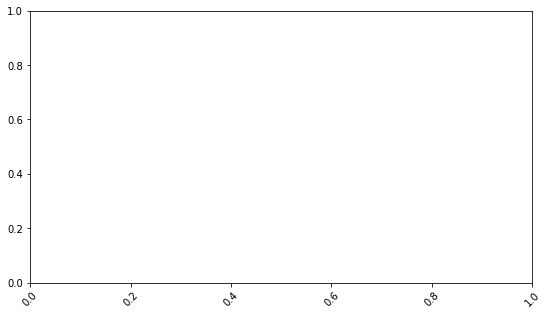

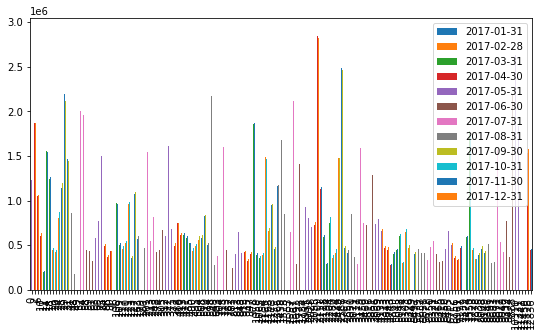

In [260]:
plt.xticks(rotation=45)
nyc_filtered_2017A.plot.bar()

Text(0.5, 1.0, 'nyc_filtered_2017')

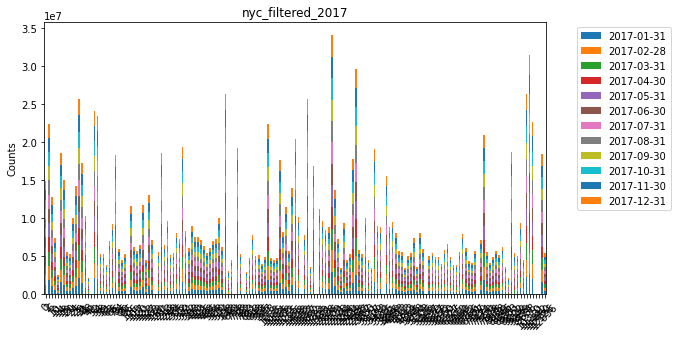

In [261]:
# Stacked bar chart
nyc_filtered_2017A.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.title('nyc_filtered_2017')

Text(0.5, 1.0, 'nyc_filtered_2017')

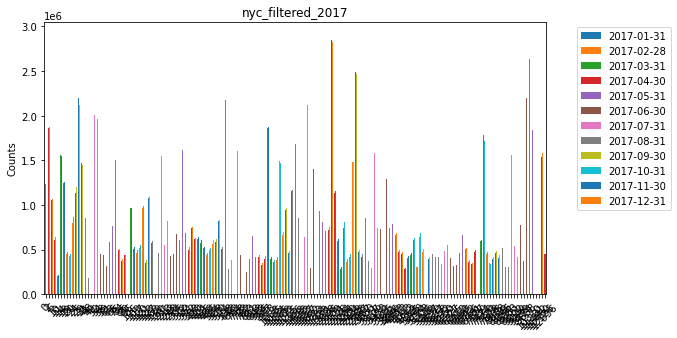

In [262]:
#Grouped bar chart
plt.rcParams["figure.figsize"] = (9, 5)
nyc_filtered_2017A.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.title('nyc_filtered_2017')

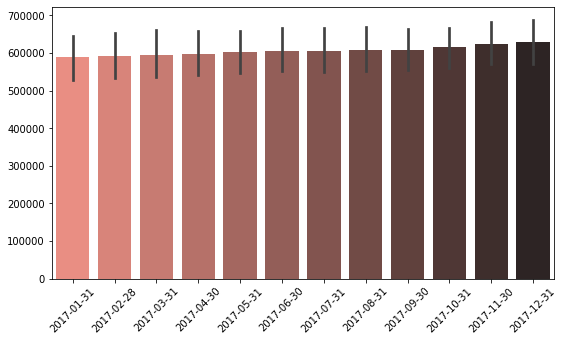

In [263]:

plt.xticks(rotation=45)
sns.barplot(data=la_filtered_2017, lw=0, orient="v", palette='dark:salmon_r')


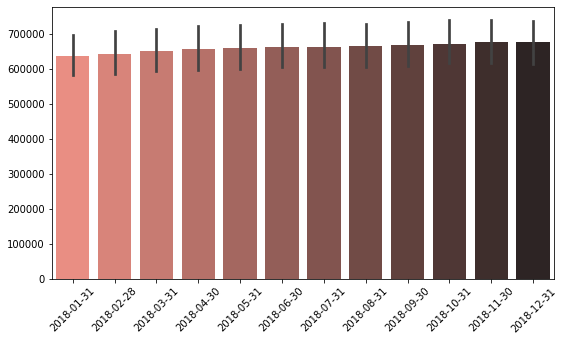

In [264]:
plt.xticks(rotation=45)
sns.barplot(data=la_filtered_2018, lw=0, orient="v", palette='dark:salmon_r')

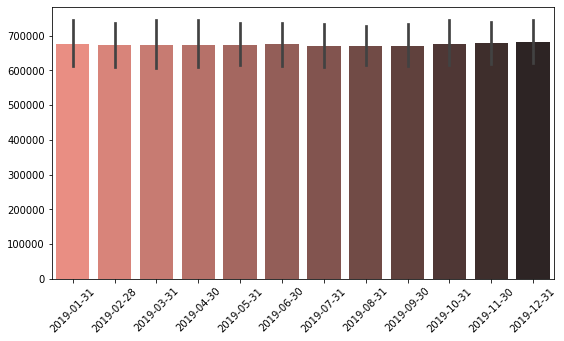

In [265]:
plt.xticks(rotation=45)
sns.barplot(data=la_filtered_2019, lw=0, orient="v", palette='dark:salmon_r')

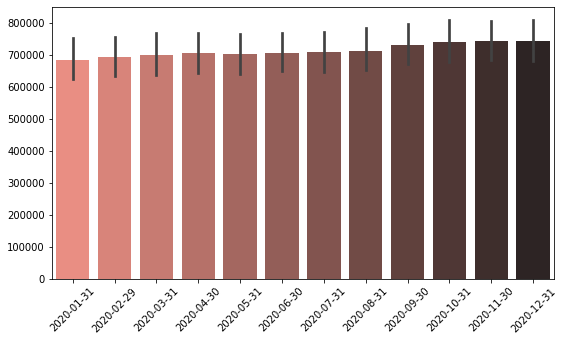

In [266]:
plt.xticks(rotation=45)
sns.barplot(data=la_filtered_2020, lw=0, orient="v", palette='dark:salmon_r')

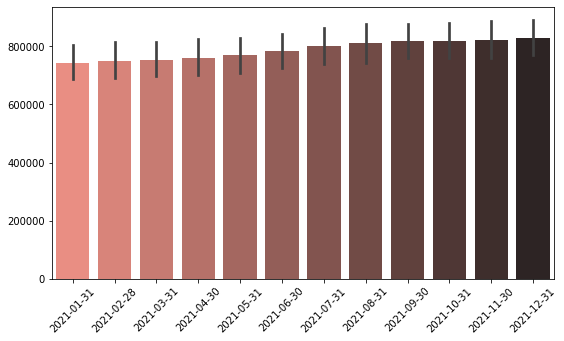

In [267]:
plt.xticks(rotation=45)
sns.barplot(data=la_filtered_2021, lw=0, orient="v", palette='dark:salmon_r')

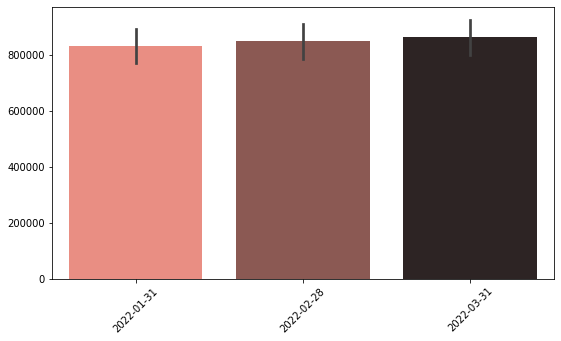

In [268]:
plt.xticks(rotation=45)
sns.barplot(data=la_filtered_2022, lw=0, orient="v", palette='dark:salmon_r')

In [269]:
pm10_avg = pd.read_csv('pm10.csv')
co_avg = pd.read_csv('co.csv')
lead_avg = pd.read_csv('lead.csv')
lead_pm10_avg = pd.read_csv('lead_pm10.csv')
no2_avg = pd.read_csv('no2.csv')
o3_avg = pd.read_csv('o3.csv')
pm2_avg = pd.read_csv('pm2.csv')
so2_avg = pd.read_csv('so2.csv')


selected = pd.concat([pm2_avg,lead_avg,co_avg,o3_avg,pm10_avg,lead_pm10_avg,so2_avg,no2_avg]).drop_duplicates(subset=['RegionID'])

In [270]:
selected

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
0             0     61616         6       10002        Zip        NY    10002   
1             1     84646        18       60647        Zip        IL    60647   
2             2     61617        55       10003        Zip        NY    10003   
3             3     70828        58       30043        Zip        GA    30043   
4             4     72578        90       33411        Zip        FL    33411   
..          ...       ...       ...         ...        ...       ...      ...   
364         364    100000      8953       98848        Zip        WA    98848   
388         388     99797     10065       98418        Zip        WA    98418   
393         393     79084     10827       48229        Zip        MI    48229   
400         400     84608     11990       60606        Zip        IL    60606   
416         416     97430     13228       93721        Zip        CA    93721   

    State              City                                  Metro  ...  \
0      NY          New York            New York-Newark-Jersey City  ...   
1      IL           Chicago               Chicago-Naperville-Elgin  ...   
2      NY          New York            New York-Newark-Jersey City  ...   
3      GA     Lawrenceville          Atlanta-Sandy Springs-Roswell  ...   
4      FL  Royal Palm Beach  Miami-Fort Lauderdale-West Palm Beach  ...   
..    ...               ...                                    ...  ...   
364    WA            Quincy                             Moses Lake  ...   
388    WA            Tacoma                Seattle-Tacoma-Bellevue  ...   
393    MI            Ecorse                Detroit-Warren-Dearborn  ...   
400    IL           Chicago               Chicago-Naperville-Elgin  ...   
416    CA            Fresno                                 Fresno  ...   

    2018-03-31  2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  \
0    1050154.0   1047288.0   1047744.0   1049931.0   1050683.0   1040508.0   
1     370529.0    370045.0    368739.0    367518.0    366269.0    365814.0   
2    1969021.0   1977374.0   1980367.0   1972937.0   1967375.0   1956667.0   
3     165917.0    167232.0    168600.0    169605.0    170392.0    171446.0   
4     137117.0    137803.0    138349.0    139376.0    140216.0    141136.0   
..         ...         ...         ...         ...         ...         ...   
364   315528.0    315920.0    316813.0    317444.0    316707.0    317353.0   
388   213108.0    216338.0    220263.0    224120.0    226919.0    228655.0   
393    27108.0     27486.0     28057.0     28242.0     28834.0     29311.0   
400   435004.0    433031.0    431934.0    430638.0    429024.0    427842.0   
416    95722.0     96109.0     97523.0     98869.0    100004.0     99579.0   

     2018-09-30  2018-10-31  2018-11-30  2018-12-31  
0     1033886.0   1032230.0   1035783.0   1037276.0  
1      366530.0    367651.0    370025.0    372133.0  
2     1952278.0   1957196.0   1963612.0   1970882.0  
3      172713.0    173932.0    174564.0    175432.0  
4      141698.0    142385.0    143114.0    144061.0  
..          ...         ...         ...         ...  
364    319018.0    322618.0    326295.0    328427.0  
388    230214.0    232707.0    235658.0    238554.0  
393     30637.0     31545.0     32511.0     33558.0  
400    426711.0    425564.0    423316.0    420893.0  
416     99034.0     98426.0     99828.0    101908.0  

[1513 rows x 64 columns]

In [271]:
selected.columns

Index(['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionName', 'RegionType',
       'StateName', 'zipcode', 'State', 'City', 'Metro', 'CountyName', 'avg',
       'arithmetic_mean', 'minimum_value', 'maximum_value', 'STCOUNTYFP',
       'population', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
       '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
       '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
       '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
       '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
       '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
       '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
       '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
       '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
       '2018-10-31', '2018-11-30', '2018-12-31'],
      dtype='object')

In [272]:
data_table = selected[['zipcode', 'State', 'avg', 'arithmetic_mean', 'minimum_value', 'maximum_value']]
data_table

zipcode State           avg  arithmetic_mean  minimum_value  \
0      10002    NY  1.043367e+06         9.485205            2.2   
1      60647    IL  3.455267e+05        10.569070            1.7   
2      10003    NY  1.937232e+06        10.001032            0.0   
3      30043    GA  1.490457e+05         8.595245            0.0   
4      33411    FL  1.249307e+05         5.379569            0.3   
..       ...   ...           ...              ...            ...   
364    98848    WA  2.930863e+05        10.080620            1.2   
388    98418    WA  1.838286e+05        27.283225            6.0   
393    48229    MI  2.613031e+04        25.762317            4.1   
400    60606    IL  4.084417e+05        32.408738            4.0   
416    93721    CA  8.682062e+04        34.170158            9.6   

     maximum_value  
0             27.7  
1             91.7  
2             40.4  
3             54.1  
4              8.5  
..             ...  
364           30.3  
388           60.0  
393           75.5  
400           83.9  
416           72.1  

[1513 rows x 6 columns]

In [273]:
CA_filtered = selected[selected.StateName == 'CA'] 
CA_filtered 

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
9             9     96239       112       90805        Zip        CA    90805   
14           14     96545       139       91910        Zip        CA    91910   
20           20     96643       221       92101        Zip        CA    92101   
25           25     96934       237       92592        Zip        CA    92592   
30           30     96816       273       92335        Zip        CA    92335   
..          ...       ...       ...         ...        ...       ...      ...   
412         412     98190     18732       95426        Zip        CA    95426   
415         415     96541     19675       91905        Zip        CA    91905   
31           31     97760       694       94553        Zip        CA    94553   
238         238     97847      4991       94801        Zip        CA    94801   
416         416     97430     13228       93721        Zip        CA    93721   

    State         City                             Metro  ... 2018-03-31  \
9      CA   Long Beach    Los Angeles-Long Beach-Anaheim  ...   421944.0   
14     CA  Chula Vista                San Diego-Carlsbad  ...   371708.0   
20     CA    San Diego                San Diego-Carlsbad  ...   747610.0   
25     CA     Temecula  Riverside-San Bernardino-Ontario  ...   320619.0   
30     CA      Fontana  Riverside-San Bernardino-Ontario  ...   289201.0   
..    ...          ...                               ...  ...        ...   
412    CA   Middletown                         Clearlake  ...   201777.0   
415    CA    Boulevard                San Diego-Carlsbad  ...        NaN   
31     CA     Martinez     San Francisco-Oakland-Hayward  ...   425017.0   
238    CA     Richmond     San Francisco-Oakland-Hayward  ...        NaN   
416    CA       Fresno                            Fresno  ...    95722.0   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
9      425854.0    428201.0    430359.0    431170.0    432122.0    432977.0   
14     371699.0    371820.0    373817.0    375855.0    377510.0    377778.0   
20     745702.0    742429.0    741666.0    740104.0    740751.0    738037.0   
25     323369.0    325803.0    327767.0    329681.0    331046.0    332443.0   
30     291170.0    293757.0    296719.0    299674.0    302431.0    304922.0   
..          ...         ...         ...         ...         ...         ...   
412    206130.0    209433.0    211469.0    212042.0    213579.0    214263.0   
415         NaN         NaN         NaN         NaN         NaN         NaN   
31     424199.0    426139.0    430535.0    440617.0    444602.0    449928.0   
238         NaN         NaN         NaN         NaN         NaN         NaN   
416     96109.0     97523.0     98869.0    100004.0     99579.0     99034.0   

     2018-10-31  2018-11-30  2018-12-31  
9      435645.0    436797.0    436344.0  
14     379599.0    380632.0    380936.0  
20     738132.0    737294.0    735837.0  
25     332846.0    333634.0    333408.0  
30     307255.0    308171.0    308620.0  
..          ...         ...         ...  
412    214510.0    213585.0    211301.0  
415         NaN         NaN         NaN  
31     454916.0    461993.0    470121.0  
238         NaN         NaN         NaN  
416     98426.0     99828.0    101908.0  

[178 rows x 64 columns]

In [274]:
TX_filtered = selected[selected.StateName == 'TX'] 
TX_filtered 

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
11           11     92576       124       78641        Zip        TX    78641   
63           63     92662       523       78753        Zip        TX    78753   
76           76     92319       670       78223        Zip        TX    78223   
80           80     92480       685       78520        Zip        TX    78520   
183         183     91252      1649       76107        Zip        TX    76107   
..          ...       ...       ...         ...        ...       ...      ...   
331         331     92760      7972       79007        Zip        TX    79007   
334         334     92091      8440       77701        Zip        TX    77701   
383         383     91101     11002       75840        Zip        TX    75840   
3             3     90795        84       75243        Zip        TX    75243   
343         343     91680      7716       77031        Zip        TX    77031   

    State         City                             Metro  ... 2018-03-31  \
11     TX      Leander                 Austin-Round Rock  ...   238010.0   
63     TX       Austin                 Austin-Round Rock  ...   208147.0   
76     TX  San Antonio         San Antonio-New Braunfels  ...   102976.0   
80     TX  Brownsville             Brownsville-Harlingen  ...    76320.0   
183    TX   Fort Worth       Dallas-Fort Worth-Arlington  ...   239178.0   
..    ...          ...                               ...  ...        ...   
331    TX       Borger                            Borger  ...    43743.0   
334    TX     Beaumont              Beaumont-Port Arthur  ...        NaN   
383    TX    Fairfield                               NaN  ...        NaN   
3      TX       Dallas       Dallas-Fort Worth-Arlington  ...   108807.0   
343    TX      Houston  Houston-The Woodlands-Sugar Land  ...    76424.0   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
11     238444.0    238463.0    238290.0    238406.0    239684.0    241831.0   
63     208385.0    209329.0    210262.0    211006.0    212723.0    214627.0   
76     104424.0    105458.0    105534.0    106221.0    107103.0    107332.0   
80      76629.0     77231.0     77383.0     77830.0     77085.0     76217.0   
183    240849.0    241745.0    242434.0    242784.0    242509.0    242831.0   
..          ...         ...         ...         ...         ...         ...   
331     43882.0     43869.0     43783.0     43720.0     43432.0     43206.0   
334         NaN         NaN         NaN         NaN         NaN         NaN   
383         NaN         NaN         NaN         NaN         NaN         NaN   
3      109896.0    111062.0    111396.0    111688.0    112669.0    112302.0   
343     74749.0     73984.0     75791.0     77920.0     80790.0     82049.0   

     2018-10-31  2018-11-30  2018-12-31  
11     243672.0    244404.0    244220.0  
63     216864.0    217582.0    218226.0  
76     107070.0    107075.0    108262.0  
80      74730.0     74104.0     74146.0  
183    243470.0    245462.0    247260.0  
..          ...         ...         ...  
331     43215.0     43399.0     43651.0  
334         NaN         NaN         NaN  
383         NaN         NaN         NaN  
3      111172.0    108775.0    107916.0  
343     84454.0     85560.0     89272.0  

[89 rows x 64 columns]

In [275]:
NY_filtered = selected[selected.StateName == 'NY'] 
NY_filtered 

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
0             0     61616         6       10002        Zip        NY    10002   
2             2     61617        55       10003        Zip        NY    10003   
7             7     61798        97       10458        Zip        NY    10458   
8             8     62022       107       11211        Zip        NY    11211   
48           48     63478       373       14221        Zip        NY    14221   
..          ...       ...       ...         ...        ...       ...      ...   
48           48     63447      1030       14150        Zip        NY    14150   
131         131     62170      2490       11590        Zip        NY    11590   
302         302     63221      6731       13662        Zip        NY    13662   
424         424     63804     14675       14882        Zip        NY    14882   
447         447     63775     17420       14847        Zip        NY    14847   

    State             City                              Metro  ... 2018-03-31  \
0      NY         New York        New York-Newark-Jersey City  ...  1050154.0   
2      NY         New York        New York-Newark-Jersey City  ...  1969021.0   
7      NY         New York        New York-Newark-Jersey City  ...        NaN   
8      NY         New York        New York-Newark-Jersey City  ...   977462.0   
48     NY  Town Of Amherst  Buffalo-Cheektowaga-Niagara Falls  ...   192087.0   
..    ...              ...                                ...  ...        ...   
48     NY        Tonawanda  Buffalo-Cheektowaga-Niagara Falls  ...   116891.0   
131    NY         Westbury        New York-Newark-Jersey City  ...   694863.0   
302    NY  Town of Massena                 Ogdensburg-Massena  ...    46335.0   
424    NY  Town of Lansing                             Ithaca  ...   186585.0   
447    NY           Covert                       Seneca Falls  ...   109966.0   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
0     1047288.0   1047744.0   1049931.0   1050683.0   1040508.0   1033886.0   
2     1977374.0   1980367.0   1972937.0   1967375.0   1956667.0   1952278.0   
7           NaN         NaN         NaN         NaN         NaN         NaN   
8      972041.0    967295.0    967544.0    973942.0    983249.0    984588.0   
48     192536.0    193051.0    193530.0    194643.0    196331.0    198729.0   
..          ...         ...         ...         ...         ...         ...   
48     117592.0    118414.0    119523.0    120861.0    122437.0    123757.0   
131    696001.0    696185.0    696443.0    694541.0    692766.0    690119.0   
302     46425.0     46984.0     47665.0     47909.0     48147.0     48264.0   
424    186322.0    185936.0    185413.0    185860.0    186496.0    187005.0   
447    110288.0    110848.0    111301.0    111803.0    112305.0    112887.0   

     2018-10-31  2018-11-30  2018-12-31  
0     1032230.0   1035783.0   1037276.0  
2     1957196.0   1963612.0   1970882.0  
7           NaN         NaN         NaN  
8      988975.0    998067.0   1004282.0  
48     199510.0    199320.0    199065.0  
..          ...         ...         ...  
48     124848.0    125576.0    125705.0  
131    690765.0    690839.0    692945.0  
302     48734.0     49034.0     49473.0  
424    186874.0    187214.0    187316.0  
447    113482.0    114137.0    114495.0  

[40 rows x 64 columns]

In [276]:
IN_filtered = selected[selected.StateName == 'IN'] 
IN_filtered 

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
70           70     78467       564       47150        Zip        IN    47150   
75           75     78449       631       47130        Zip        IN    47130   
99           99     78584       873       47401        Zip        IN    47401   
109         109     78110       921       46360        Zip        IN    46360   
156         156     78822      1349       47905        Zip        IN    47905   
..          ...       ...       ...         ...        ...       ...      ...   
207         207     78084      4382       46304        Zip        IN    46304   
307         307     78634      6864       47501        Zip        IN    47501   
359         359     78441      9335       47119        Zip        IN    47119   
397         397     78671     12298       47567        Zip        IN    47567   
428         428     78348     15626       46932        Zip        IN    46932   

    State            City                        Metro  ... 2018-03-31  \
70     IN      New Albany  Louisville/Jefferson County  ...    98458.0   
75     IN  Jeffersonville  Louisville/Jefferson County  ...   102656.0   
99     IN     Bloomington                  Bloomington  ...   152180.0   
109    IN   Michigan City       Michigan City-La Porte  ...    86676.0   
156    IN       Lafayette     Lafayette-West Lafayette  ...   101478.0   
..    ...             ...                          ...  ...        ...   
207    IN      Chesterton     Chicago-Naperville-Elgin  ...   138794.0   
307    IN      Washington                   Washington  ...    62580.0   
359    IN    Floyds Knobs  Louisville/Jefferson County  ...   166458.0   
397    IN      Petersburg                       Jasper  ...    57515.0   
428    IN       Galveston                   Logansport  ...    80756.0   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
70      98831.0     99227.0     99321.0    100237.0    101045.0    102197.0   
75     103503.0    104126.0    104954.0    105960.0    107384.0    108407.0   
99     152978.0    153549.0    154320.0    155079.0    155881.0    156863.0   
109     87424.0     88294.0     89012.0     89621.0     90589.0     91386.0   
156    102720.0    103716.0    104128.0    104829.0    105089.0    105167.0   
..          ...         ...         ...         ...         ...         ...   
207    139304.0    139240.0    140063.0    140743.0    141720.0    142410.0   
307     62940.0     63257.0     63491.0     63699.0     64085.0     64438.0   
359    167459.0    168071.0    168023.0    168592.0    168582.0    168647.0   
397     57801.0     58090.0     58318.0     58663.0     59146.0     59678.0   
428     81644.0     82108.0     82375.0     82692.0     82523.0     82502.0   

     2018-10-31  2018-11-30  2018-12-31  
70     102778.0    103284.0    103834.0  
75     109318.0    110409.0    111682.0  
99     157909.0    159050.0    159410.0  
109     92281.0     92628.0     93272.0  
156    104961.0    105521.0    105997.0  
..          ...         ...         ...  
207    143915.0    145702.0    147188.0  
307     64891.0     65280.0     65708.0  
359    168501.0    169230.0    169781.0  
397     59953.0     60208.0     60296.0  
428     82362.0     82544.0     82614.0  

[72 rows x 64 columns]

In [277]:
PA_filtered = selected[selected.StateName == 'PA'] 
PA_filtered 

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  \
41            41     65791       340       19124        Zip        PA   
57            57     64009       477       15301        Zip        PA   
86            86     65813       760       19146        Zip        PA   
102          102     65132       888       17602        Zip        PA   
154          154     64017      1324       15317        Zip        PA   
...          ...       ...       ...         ...        ...       ...   
1223        1223     65608     20479       18832        Zip        PA   
393          393     63964     14487       15233        Zip        PA   
39            39     65812       786       19145        Zip        PA   
278          278     64568      6160       16365        Zip        PA   
335          335     65053      8505       17362        Zip        PA   

      zipcode State                     City                           Metro  \
41      19124    PA             Philadelphia  Philadelphia-Camden-Wilmington   
57      15301    PA               Washington                      Pittsburgh   
86      19146    PA             Philadelphia  Philadelphia-Camden-Wilmington   
102     17602    PA       Lancaster Township                       Lancaster   
154     15317    PA  North Strabane Township                      Pittsburgh   
...       ...   ...                      ...                             ...   
1223    18832    PA        Franklin Township                           Sayre   
393     15233    PA               Pittsburgh                      Pittsburgh   
39      19145    PA             Philadelphia  Philadelphia-Camden-Wilmington   
278     16365    PA                   Warren                          Warren   
335     17362    PA   North Codorus Township                    York-Hanover   

      ... 2018-03-31  2018-04-30  2018-05-31  2018-06-30  2018-07-31  \
41    ...    85861.0     86643.0     87071.0     87105.0     87466.0   
57    ...   107253.0    108082.0    108403.0    108140.0    107692.0   
86    ...   347475.0    350702.0    351607.0    350556.0    350611.0   
102   ...   151149.0    153581.0    155204.0    155460.0    155481.0   
154   ...   142336.0    142669.0    143215.0    143821.0    144383.0   
...   ...        ...         ...         ...         ...         ...   
1223  ...        NaN         NaN         NaN         NaN         NaN   
393   ...   117619.0    118362.0    119993.0    120695.0    121507.0   
39    ...   213404.0    216465.0    217285.0    216810.0    216095.0   
278   ...    81837.0     82169.0     82253.0     82375.0     82336.0   
335   ...   160729.0    160878.0    161646.0    161401.0    162039.0   

      2018-08-31  2018-09-30  2018-10-31  2018-11-30  2018-12-31  
41       88182.0     89580.0     90955.0     92418.0     93869.0  
57      107674.0    108553.0    109876.0    110768.0    111165.0  
86      351175.0    352220.0    353270.0    354915.0    357665.0  
102     155733.0    156272.0    156776.0    157919.0    159206.0  
154     145141.0    145671.0    146336.0    146883.0    147699.0  
...          ...         ...         ...         ...         ...  
1223         NaN         NaN         NaN         NaN         NaN  
393     121333.0    120554.0    120720.0    122145.0    123964.0  
39      216637.0    217809.0    218717.0    220321.0    221810.0  
278      82534.0     82737.0     82831.0     83105.0     83359.0  
335     162567.0    164407.0    164969.0    165450.0    165368.0  

[64 rows x 64 columns]

In [278]:
WA_filtered = selected[selected.StateName == 'WA'] 
WA_filtered 

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  \
219          219     99829      1802       98503        Zip        WA   
311          311     99595      2726       98144        Zip        WA   
359          359    100156      3352       99207        Zip        WA   
431          431    100013      4370       98901        Zip        WA   
575          575     99790      6701       98408        Zip        WA   
...          ...       ...       ...         ...        ...       ...   
1092        1092     99666     13198       98257        Zip        WA   
1162        1162     99652     15568       98240        Zip        WA   
221          221     99658      4736       98248        Zip        WA   
364          364    100000      8953       98848        Zip        WA   
388          388     99797     10065       98418        Zip        WA   

      zipcode State       City                    Metro  ... 2018-03-31  \
219     98503    WA      Lacey         Olympia-Tumwater  ...   227251.0   
311     98144    WA    Seattle  Seattle-Tacoma-Bellevue  ...   644602.0   
359     99207    WA    Spokane   Spokane-Spokane Valley  ...   132640.0   
431     98901    WA     Yakima                   Yakima  ...   113039.0   
575     98408    WA     Tacoma  Seattle-Tacoma-Bellevue  ...   212183.0   
...       ...   ...        ...                      ...  ...        ...   
1092    98257    WA  La Conner   Mount Vernon-Anacortes  ...   244033.0   
1162    98240    WA     Custer               Bellingham  ...   330769.0   
221     98248    WA   Ferndale               Bellingham  ...   291061.0   
364     98848    WA     Quincy               Moses Lake  ...   315528.0   
388     98418    WA     Tacoma  Seattle-Tacoma-Bellevue  ...   213108.0   

      2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
219     229194.0    230778.0    233232.0    235841.0    237812.0    240438.0   
311     650961.0    653727.0    655184.0    654993.0    653294.0    651825.0   
359     133985.0    135328.0    136447.0    137989.0    139640.0    141174.0   
431     114379.0    116914.0    118049.0    119745.0    119541.0    120824.0   
575     214418.0    217304.0    221043.0    224122.0    227043.0    229179.0   
...          ...         ...         ...         ...         ...         ...   
1092    244682.0    245041.0    245531.0    247238.0    249922.0    251919.0   
1162    335118.0    338536.0    342814.0    346825.0    349443.0    353090.0   
221     294892.0    298096.0    302183.0    305540.0    307900.0    309943.0   
364     315920.0    316813.0    317444.0    316707.0    317353.0    319018.0   
388     216338.0    220263.0    224120.0    226919.0    228655.0    230214.0   

      2018-10-31  2018-11-30  2018-12-31  
219     242413.0    245597.0    247504.0  
311     648717.0    645829.0    641133.0  
359     142575.0    144342.0    146347.0  
431     122666.0    124775.0    127247.0  
575     231874.0    234260.0    236915.0  
...          ...         ...         ...  
1092    253994.0    254326.0    257489.0  
1162    356265.0    359440.0    360501.0  
221     312679.0    314881.0    315934.0  
364     322618.0    326295.0    328427.0  
388     232707.0    235658.0    238554.0  

[21 rows x 64 columns]

In [279]:
AZ_filtered = selected[selected.StateName == 'AZ'] 
AZ_filtered 

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
208         208     95042      1773       85704        Zip        AZ    85704   
215         215     94731      1792       85015        Zip        AZ    85015   
307         307     95077      2669       85741        Zip        AZ    85741   
422         422    417435      4271       85119        Zip        AZ    85119   
548         548     94735      6359       85019        Zip        AZ    85019   
..          ...       ...       ...         ...        ...       ...      ...   
65           65     95044      1375       85706        Zip        AZ    85706   
307         307    417438      8283       85128        Zip        AZ    85128   
330         330    417439      9317       85131        Zip        AZ    85131   
402         402     94972     15884       85539        Zip        AZ    85539   
337         337     94723      8629       85007        Zip        AZ    85007   

    State             City                    Metro  ... 2018-03-31  \
208    AZ           Tucson                   Tucson  ...   175928.0   
215    AZ          Phoenix  Phoenix-Mesa-Scottsdale  ...   130819.0   
307    AZ           Tucson                   Tucson  ...   155554.0   
422    AZ  Apache Junction  Phoenix-Mesa-Scottsdale  ...   179846.0   
548    AZ          Phoenix  Phoenix-Mesa-Scottsdale  ...    87814.0   
..    ...              ...                      ...  ...        ...   
65     AZ           Tucson                   Tucson  ...   106332.0   
307    AZ         Coolidge  Phoenix-Mesa-Scottsdale  ...    78104.0   
330    AZ             Eloy  Phoenix-Mesa-Scottsdale  ...   234921.0   
402    AZ            Miami                   Payson  ...    62678.0   
337    AZ          Phoenix  Phoenix-Mesa-Scottsdale  ...   245260.0   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
208    177148.0    177936.0    178656.0    179373.0    180220.0    181521.0   
215    132527.0    134049.0    135299.0    136455.0    137559.0    139056.0   
307    156969.0    157961.0    158921.0    160143.0    161594.0    163182.0   
422    180201.0    180198.0    181314.0    182298.0    183641.0    185315.0   
548     88536.0     90104.0     90699.0     91647.0     92288.0     93526.0   
..          ...         ...         ...         ...         ...         ...   
65     107748.0    108866.0    109493.0    109908.0    111073.0    112511.0   
307     77777.0     77763.0     78346.0     78605.0     79271.0     80566.0   
330    236045.0    237170.0    238557.0    239672.0    241549.0    243575.0   
402     64140.0     64091.0     66035.0     68886.0     72004.0     73643.0   
337    248044.0    250860.0    252670.0    254980.0    255397.0    255404.0   

     2018-10-31  2018-11-30  2018-12-31  
208    182743.0    183899.0    184040.0  
215    139902.0    141259.0    142551.0  
307    164561.0    165902.0    166102.0  
422    187917.0    191035.0    194275.0  
548     95076.0     96596.0     97966.0  
..          ...         ...         ...  
65     114029.0    114984.0    115202.0  
307     82898.0     84763.0     85116.0  
330    245376.0    247468.0    249132.0  
402     76189.0     78438.0     80140.0  
337    256177.0    257024.0    258971.0  

[43 rows x 64 columns]

In [280]:
NM_filtered = selected[selected.StateName == 'NM'] 
NM_filtered 

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  \
95            95     95304       848       87109        Zip        NM   
119          119     95300      1020       87105        Zip        NM   
240          240     95385      1991       87505        Zip        NM   
251          251     95591      2138       88240        Zip        NM   
285          285     95505      2409       88001        Zip        NM   
...          ...       ...       ...         ...        ...       ...   
812          812     95316      7162       87122        Zip        NM   
896          896     95370      8243       87413        Zip        NM   
968          968     95240      9439       87004        Zip        NM   
1233        1233     95537     21345       88043        Zip        NM   
323          323     95437      8775       87571        Zip        NM   

      zipcode State          City        Metro  ... 2018-03-31  2018-04-30  \
95      87109    NM   Albuquerque  Albuquerque  ...   174400.0    175600.0   
119     87105    NM  South Valley  Albuquerque  ...   119598.0    120859.0   
240     87505    NM      Santa Fe     Santa Fe  ...   285646.0    286725.0   
251     88240    NM         Hobbs        Hobbs  ...    96438.0     96158.0   
285     88001    NM    Las Cruces   Las Cruces  ...    97010.0     98193.0   
...       ...   ...           ...          ...  ...        ...         ...   
812     87122    NM   Albuquerque  Albuquerque  ...   270053.0    271821.0   
896     87413    NM    Bloomfield   Farmington  ...   104111.0    104803.0   
968     87004    NM    Bernalillo  Albuquerque  ...   207001.0    207034.0   
1233    88043    NM        Hurley  Silver City  ...    45918.0     46585.0   
323     87571    NM          Taos         Taos  ...   231491.0    233001.0   

      2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  2018-10-31  \
95      176942.0    177493.0    176714.0    175939.0    175214.0    176016.0   
119     122092.0    122660.0    121824.0    121229.0    121477.0    122682.0   
240     287071.0    287527.0    288213.0    288963.0    290340.0    290872.0   
251      95875.0     96006.0     96071.0     96481.0     97203.0     98400.0   
285      99532.0    102817.0    104985.0    107550.0    108625.0    110041.0   
...          ...         ...         ...         ...         ...         ...   
812     273219.0    272947.0    271478.0    271211.0    271311.0    273312.0   
896     105623.0    106007.0    105982.0    105891.0    106041.0    106216.0   
968     205491.0    205023.0    204714.0    204986.0    205183.0    205438.0   
1233     47545.0     48254.0     48290.0     48007.0     47954.0     47471.0   
323     233895.0    235791.0    238264.0    240360.0    243717.0    245420.0   

      2018-11-30  2018-12-31  
95      176476.0    177417.0  
119     123509.0    124344.0  
240     293465.0    296324.0  
251      99466.0    100250.0  
285     110750.0    111842.0  
...          ...         ...  
812     274817.0    277691.0  
896     106219.0    106140.0  
968     206058.0    207296.0  
1233     46566.0     45661.0  
323     247162.0    248474.0  

[19 rows x 64 columns]

In [281]:
CO_filtered = selected[selected.StateName == 'CO'] 
CO_filtered 

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
117         117     93305       983       80229        Zip        CO    80229   
118         118     93288       998       80211        Zip        CO    80211   
158         158     93432      1380       80501        Zip        CO    80501   
159         159     93487      1380       80631        Zip        CO    80631   
176         176     93212      1603       80022        Zip        CO    80022   
..          ...       ...       ...         ...        ...       ...      ...   
347         347     93798     10179       81435        Zip        CO    81435   
348         348     93665     10196       81052        Zip        CO    81052   
358         358     93732     11081       81224        Zip        CO    81224   
425         425     93733     34322       81225        Zip        CO    81225   
348         348     93292      7913       80216        Zip        CO    80216   

    State                 City                   Metro  ... 2018-03-31  \
117    CO             Thornton  Denver-Aurora-Lakewood  ...   242496.0   
118    CO               Denver  Denver-Aurora-Lakewood  ...   505494.0   
158    CO             Longmont                 Boulder  ...   319871.0   
159    CO              Greeley                 Greeley  ...   207138.0   
176    CO        Commerce City  Denver-Aurora-Lakewood  ...   259693.0   
..    ...                  ...                     ...  ...        ...   
347    CO     Mountain Village                     NaN  ...   693574.0   
348    CO                Lamar                     NaN  ...    72777.0   
358    CO        Crested Butte                     NaN  ...   376757.0   
425    CO  Mount Crested Butte                     NaN  ...   316191.0   
348    CO               Denver  Denver-Aurora-Lakewood  ...   280010.0   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
117    245418.0    248023.0    249820.0    250952.0    251745.0    253109.0   
118    510525.0    517476.0    523030.0    527143.0    529036.0    531951.0   
158    321293.0    323037.0    325588.0    328366.0    331093.0    333108.0   
159    210612.0    213828.0    216594.0    219403.0    222109.0    224246.0   
176    263582.0    267012.0    269210.0    270404.0    271553.0    273052.0   
..          ...         ...         ...         ...         ...         ...   
347    697193.0    700324.0    701351.0    703789.0    706005.0    709162.0   
348     73177.0     73389.0     73451.0     73829.0     74754.0     75756.0   
358    379344.0    382038.0    384729.0    387554.0    390607.0    393299.0   
425    316247.0    315422.0    317381.0    318715.0    321055.0    323327.0   
348    283786.0    289026.0    292675.0    296127.0    298232.0    301122.0   

     2018-10-31  2018-11-30  2018-12-31  
117    254599.0    257080.0    259419.0  
118    534635.0    537451.0    539688.0  
158    334850.0    335901.0    336611.0  
159    226704.0    228582.0    230378.0  
176    274649.0    277041.0    279145.0  
..          ...         ...         ...  
347    711011.0    713135.0    715909.0  
348     76300.0     76438.0     76414.0  
358    396393.0    398460.0    400327.0  
425    325440.0    326772.0    326695.0  
348    303153.0    305433.0    307242.0  

[54 rows x 64 columns]

In [282]:
FL_filtered = selected[selected.StateName == 'FL'] 
FL_filtered 

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
4             4     72578        90       33411        Zip        FL    33411   
31           31     72393       289       33064        Zip        FL    33064   
43           43     71878       345       32225        Zip        FL    32225   
72           72     72353       580       33015        Zip        FL    33015   
133         133     72186      1175       32746        Zip        FL    32746   
..          ...       ...       ...         ...        ...       ...      ...   
222         222     71840      4739       32177        Zip        FL    32177   
249         249     72688      5376       33572        Zip        FL    33572   
328         328     72663      7799       33534        Zip        FL    33534   
355         355     73094      9176       34428        Zip        FL    34428   
86           86     72429      1331       33126        Zip        FL    33126   

    State              City                                  Metro  ...  \
4      FL  Royal Palm Beach  Miami-Fort Lauderdale-West Palm Beach  ...   
31     FL     Pompano Beach  Miami-Fort Lauderdale-West Palm Beach  ...   
43     FL      Jacksonville                           Jacksonville  ...   
72     FL      Country Club  Miami-Fort Lauderdale-West Palm Beach  ...   
133    FL         Lake Mary              Orlando-Kissimmee-Sanford  ...   
..    ...               ...                                    ...  ...   
222    FL           Palatka                                Palatka  ...   
249    FL      Apollo Beach        Tampa-St. Petersburg-Clearwater  ...   
328    FL         Gibsonton        Tampa-St. Petersburg-Clearwater  ...   
355    FL     Crystal River                      Homosassa Springs  ...   
86     FL             Miami  Miami-Fort Lauderdale-West Palm Beach  ...   

    2018-03-31  2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  \
4     137117.0    137803.0    138349.0    139376.0    140216.0    141136.0   
31    160205.0    161616.0    163632.0    164779.0    166281.0    167480.0   
43    121281.0    122966.0    125540.0    127596.0    129546.0    130359.0   
72    182632.0    184121.0    184941.0    185626.0    186736.0    186837.0   
133   144679.0    144611.0    145875.0    147609.0    149378.0    150972.0   
..         ...         ...         ...         ...         ...         ...   
222    64127.0     64845.0     65394.0     66261.0     66870.0     67992.0   
249   203495.0    204785.0    204944.0    205627.0    206799.0    208567.0   
328   120297.0    121397.0    122343.0    123043.0    123348.0    124207.0   
355   125726.0    126474.0    127345.0    128692.0    130275.0    131335.0   
86    183136.0    184461.0    185316.0    186052.0    186678.0    186990.0   

     2018-09-30  2018-10-31  2018-11-30  2018-12-31  
4      141698.0    142385.0    143114.0    144061.0  
31     168812.0    169646.0    170970.0    172146.0  
43     130966.0    131723.0    132607.0    133624.0  
72     187561.0    188114.0    190618.0    191858.0  
133    152042.0    152620.0    152806.0    153093.0  
..          ...         ...         ...         ...  
222     68794.0     70350.0     71600.0     72846.0  
249    210160.0    211421.0    212540.0    213606.0  
328    125459.0    126909.0    126982.0    126893.0  
355    131577.0    131047.0    130667.0    131457.0  
86     187150.0    187375.0    189205.0    190442.0  

[89 rows x 64 columns]

In [283]:
NV_filtered = selected[selected.StateName == 'NV'] 
NV_filtered 

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  \
258          258     95800      2168       89104        Zip        NV   
460          460     95952      4799       89701        Zip        NV   
761          761     95930     12697       89501        Zip        NV   
49            49     95931       951       89502        Zip        NV   
106          106     95797      1915       89101        Zip        NV   
...          ...       ...       ...         ...        ...       ...   
739          739     95840      6255       89144        Zip        NV   
757          757     95766      6471       89027        Zip        NV   
822          822     95744      7362       89005        Zip        NV   
938          938    399672      9041       89441        Zip        NV   
1084        1084     95926     12989       89451        Zip        NV   

      zipcode State             City                         Metro  ...  \
258     89104    NV        Las Vegas  Las Vegas-Henderson-Paradise  ...   
460     89701    NV      Carson City                   Carson City  ...   
761     89501    NV             Reno                          Reno  ...   
49      89502    NV             Reno                          Reno  ...   
106     89101    NV        Las Vegas  Las Vegas-Henderson-Paradise  ...   
...       ...   ...              ...                           ...  ...   
739     89144    NV        Las Vegas  Las Vegas-Henderson-Paradise  ...   
757     89027    NV         Mesquite  Las Vegas-Henderson-Paradise  ...   
822     89005    NV     Boulder City  Las Vegas-Henderson-Paradise  ...   
938     89441    NV           Sparks                          Reno  ...   
1084    89451    NV  Incline Village                          Reno  ...   

     2018-03-31  2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  \
258    143068.0    146126.0    148568.0    152403.0    156611.0    160808.0   
460    193435.0    195991.0    198854.0    202124.0    202442.0    202370.0   
761    367680.0    372224.0    376955.0    385598.0    392777.0    400263.0   
49     177140.0    180455.0    183276.0    186361.0    188238.0    190692.0   
106    145591.0    148443.0    151873.0    155994.0    159900.0    163746.0   
...         ...         ...         ...         ...         ...         ...   
739    234315.0    237100.0    239599.0    243121.0    246298.0    249646.0   
757    175897.0    178050.0    179786.0    182432.0    184977.0    187878.0   
822    206261.0    207957.0    209159.0    212873.0    216531.0    220743.0   
938         NaN         NaN         NaN         NaN         NaN         NaN   
1084   536045.0    542469.0    547249.0    553445.0    559081.0    564581.0   

      2018-09-30  2018-10-31  2018-11-30  2018-12-31  
258     163837.0    165476.0    166968.0    169033.0  
460     201487.0    202518.0    203346.0    204333.0  
761     403646.0    405492.0    408273.0    409705.0  
49      191691.0    193097.0    194414.0    196462.0  
106     166015.0    167588.0    168497.0    170534.0  
...          ...         ...         ...         ...  
739     252024.0    253566.0    254198.0    255765.0  
757     190161.0    191738.0    192428.0    193873.0  
822     223398.0    224713.0    224837.0    226657.0  
938          NaN         NaN         NaN         NaN  
1084    566502.0    568871.0    572060.0    575041.0  

[21 rows x 64 columns]

In [284]:
DC_filtered = selected[selected.StateName == 'DC'] 
DC_filtered 

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
27           27     66125       241       20001        Zip        DC    20001   
39           39     66142       325       20019        Zip        DC    20019   
233         233     66129      5752       20005        Zip        DC    20005   
864         864     66136      7787       20012        Zip        DC    20012   

    State        City                            Metro  ... 2018-03-31  \
27     DC  Washington  Washington-Arlington-Alexandria  ...   666139.0   
39     DC  Washington  Washington-Arlington-Alexandria  ...   277428.0   
233    DC  Washington  Washington-Arlington-Alexandria  ...   711160.0   
864    DC  Washington  Washington-Arlington-Alexandria  ...   465232.0   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
27     666462.0    665174.0    668015.0    668919.0    669166.0    671252.0   
39     282853.0    288664.0    295375.0    300530.0    305599.0    309046.0   
233    707964.0    704162.0    705688.0    705939.0    704545.0    705388.0   
864    467035.0    465814.0    468876.0    473975.0    479209.0    485776.0   

     2018-10-31  2018-11-30  2018-12-31  
27     675036.0    680032.0    682731.0  
39     312109.0    316255.0    321211.0  
233    707537.0    710858.0    711740.0  
864    492285.0    497296.0    499661.0  

[4 rows x 64 columns]

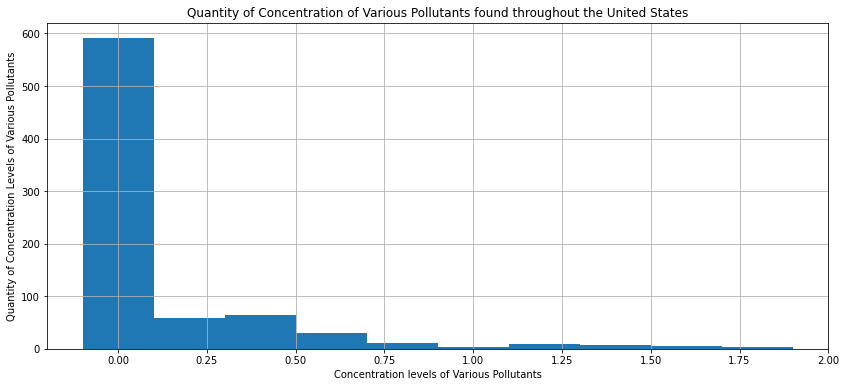

In [285]:
bin_values = np.arange(start=-0.1, stop=2.0, step=0.2)
plt.title('Quantity of Concentration of Various Pollutants found throughout the United States')
plt.xlabel('Concentration levels of Various Pollutants')
plt.ylabel('Quantity of Concentration Levels of Various Pollutants')
selected['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

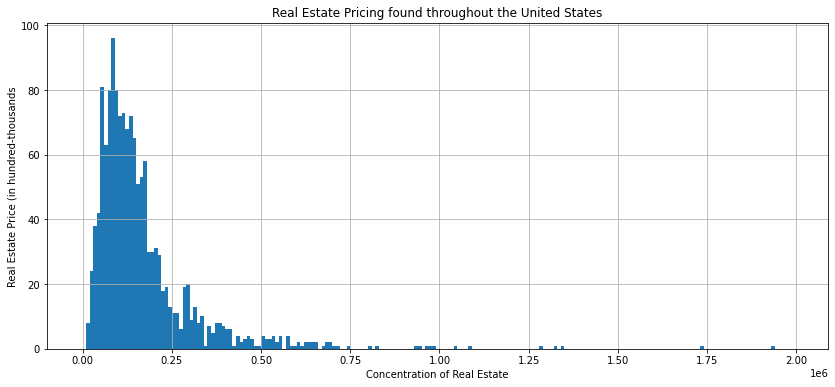

In [413]:
bin_values = np.arange(start=0, stop=2000000, step=10000)
plt.title('Real Estate Pricing found throughout the United States')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands')
selected['avg'].hist(bins=bin_values, figsize=[14,6])

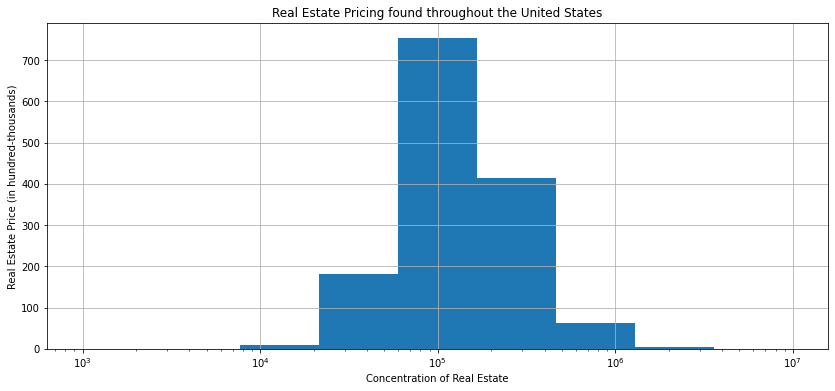

In [422]:
bin_values = np.logspace(np.log10(1000), stop=np.log10(10000000), num=(10))
plt.title('Real Estate Pricing found throughout the United States')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands)')
plt.gca().set_xscale("log")
selected['avg'].hist(bins=bin_values, figsize=[14,6])

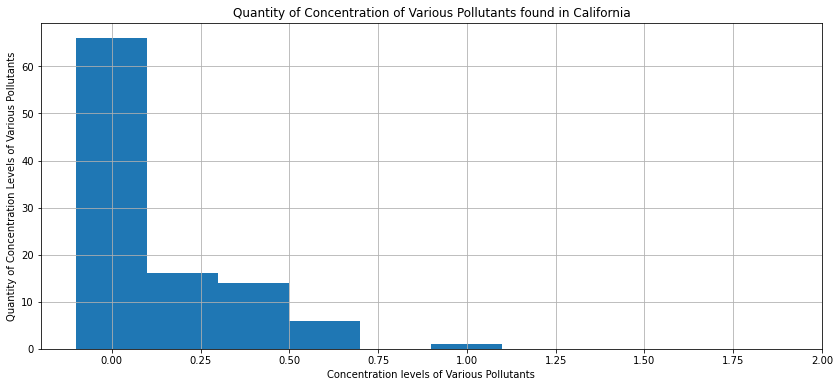

In [287]:
bin_values = np.arange(start=-0.1, stop=2.0, step=0.2)
plt.title('Quantity of Concentration of Various Pollutants found in California')
plt.xlabel('Concentration levels of Various Pollutants')
plt.ylabel('Quantity of Concentration Levels of Various Pollutants')
CA_filtered['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

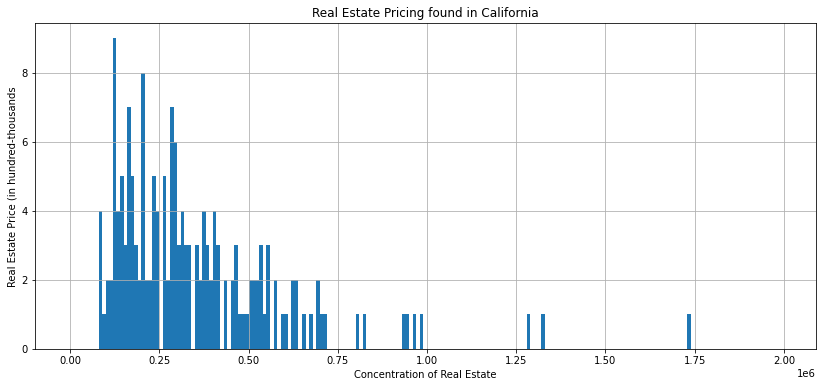

In [288]:
bin_values = np.arange(start=0, stop=2000000, step=10000)
plt.title('Real Estate Pricing found in California')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands')
CA_filtered['avg'].hist(bins=bin_values, figsize=[14,6])

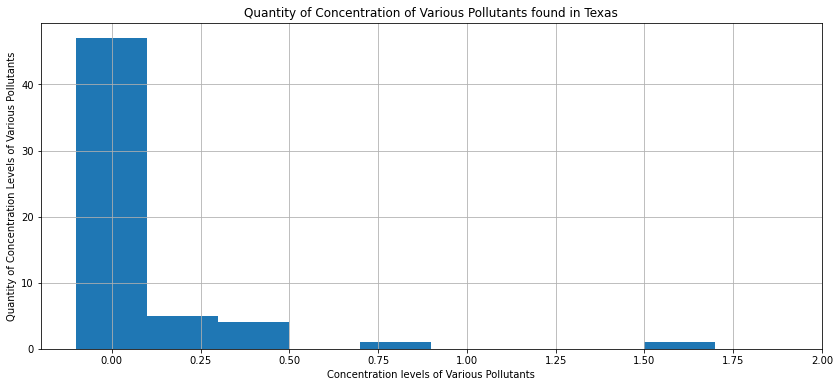

In [289]:
bin_values = np.arange(start=-0.1, stop=2.0, step=0.2)
plt.title('Quantity of Concentration of Various Pollutants found in Texas')
plt.xlabel('Concentration levels of Various Pollutants')
plt.ylabel('Quantity of Concentration Levels of Various Pollutants')
TX_filtered['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

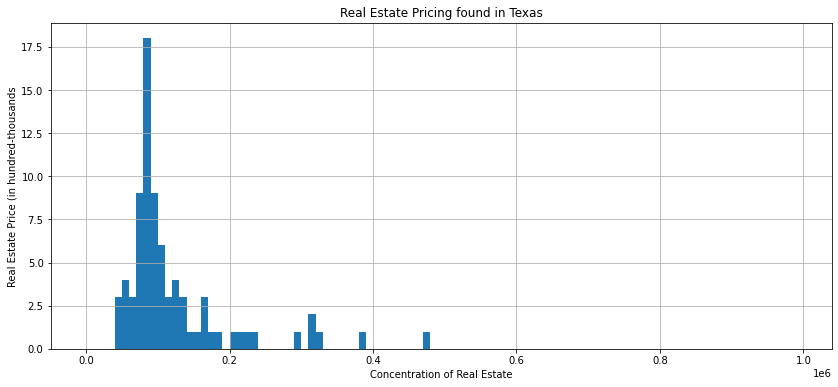

In [290]:
bin_values = np.arange(start=0, stop=1000000, step=10000)
plt.title('Real Estate Pricing found in Texas')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands')
TX_filtered['avg'].hist(bins=bin_values, figsize=[14,6])

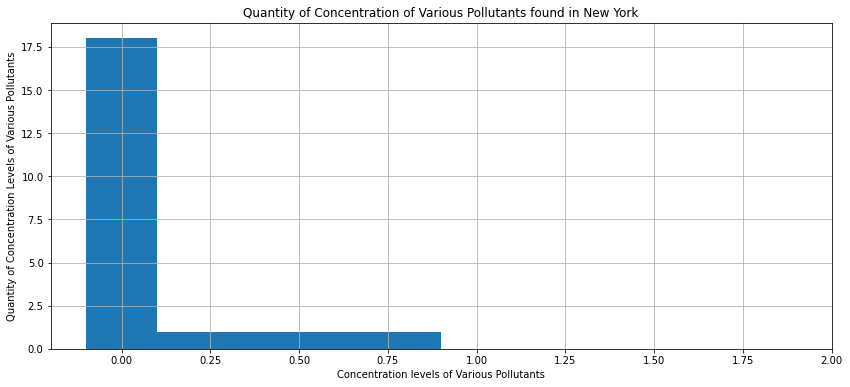

In [291]:
bin_values = np.arange(start=-0.1, stop=2.0, step=0.2)
plt.title('Quantity of Concentration of Various Pollutants found in New York')
plt.xlabel('Concentration levels of Various Pollutants')
plt.ylabel('Quantity of Concentration Levels of Various Pollutants')
NY_filtered['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

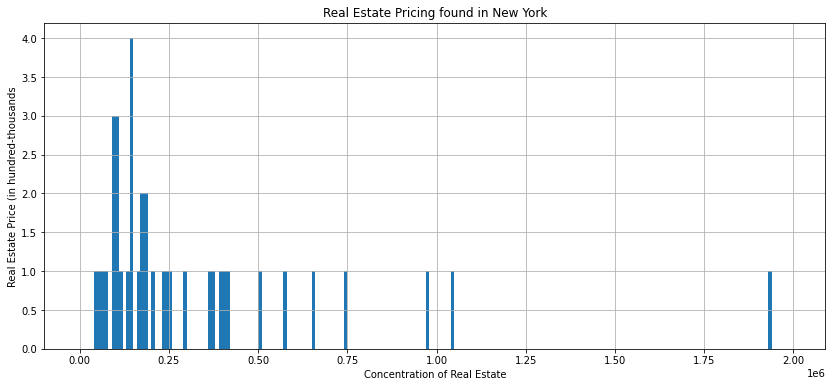

In [292]:
bin_values = np.arange(start=0, stop=2000000, step=10000)
plt.title('Real Estate Pricing found in New York')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands')
NY_filtered['avg'].hist(bins=bin_values, figsize=[14,6])

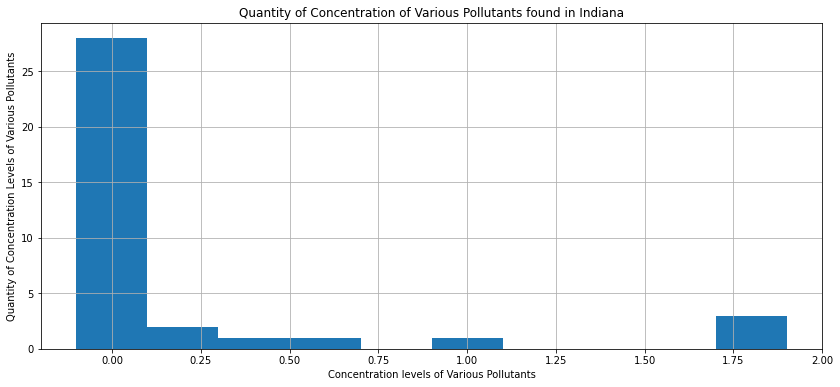

In [293]:
bin_values = np.arange(start=-0.1, stop=2.0, step=0.2)
plt.title('Quantity of Concentration of Various Pollutants found in Indiana')
plt.xlabel('Concentration levels of Various Pollutants')
plt.ylabel('Quantity of Concentration Levels of Various Pollutants')
IN_filtered['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

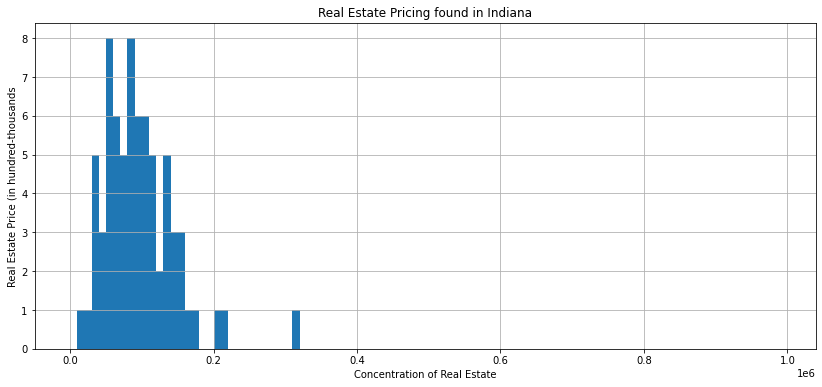

In [294]:
bin_values = np.arange(start=0, stop=1000000, step=10000)
plt.title('Real Estate Pricing found in Indiana')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands')
IN_filtered['avg'].hist(bins=bin_values, figsize=[14,6])

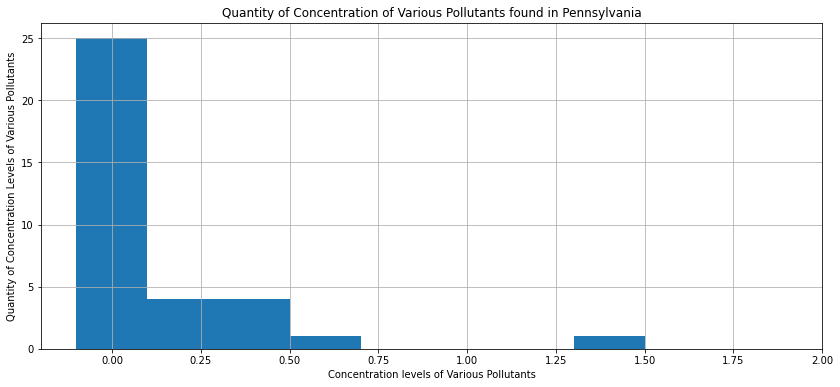

In [295]:
bin_values = np.arange(start=-0.1, stop=2.0, step=0.2)
plt.title('Quantity of Concentration of Various Pollutants found in Pennsylvania')
plt.xlabel('Concentration levels of Various Pollutants')
plt.ylabel('Quantity of Concentration Levels of Various Pollutants')
PA_filtered['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

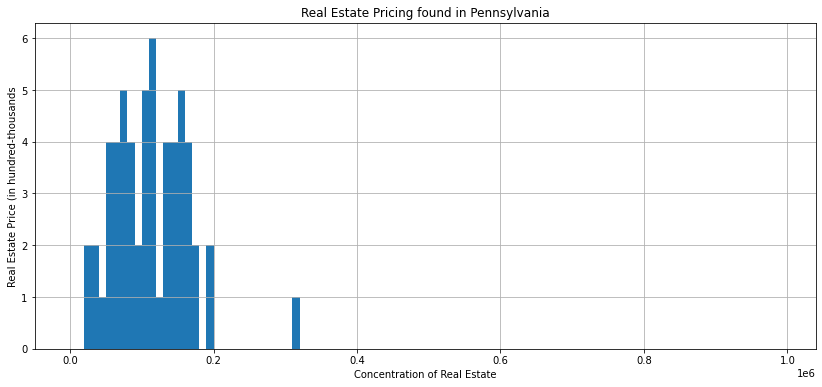

In [296]:
bin_values = np.arange(start=0, stop=1000000, step=10000)
plt.title('Real Estate Pricing found in Pennsylvania')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands')
PA_filtered['avg'].hist(bins=bin_values, figsize=[14,6])

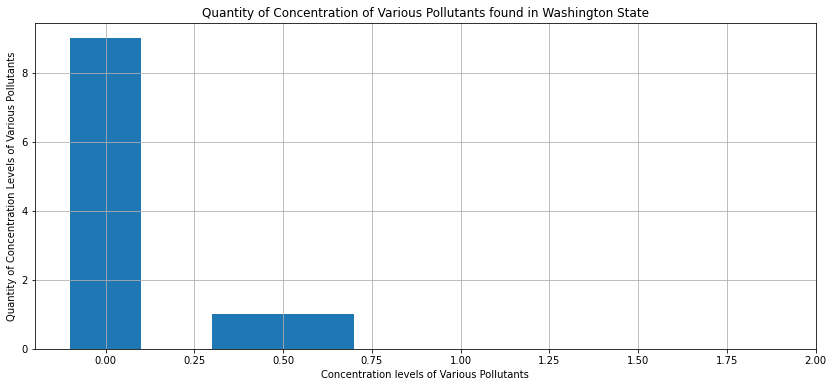

In [297]:
bin_values = np.arange(start=-0.1, stop=2.0, step=0.2)
plt.title('Quantity of Concentration of Various Pollutants found in Washington State')
plt.xlabel('Concentration levels of Various Pollutants')
plt.ylabel('Quantity of Concentration Levels of Various Pollutants')
WA_filtered['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

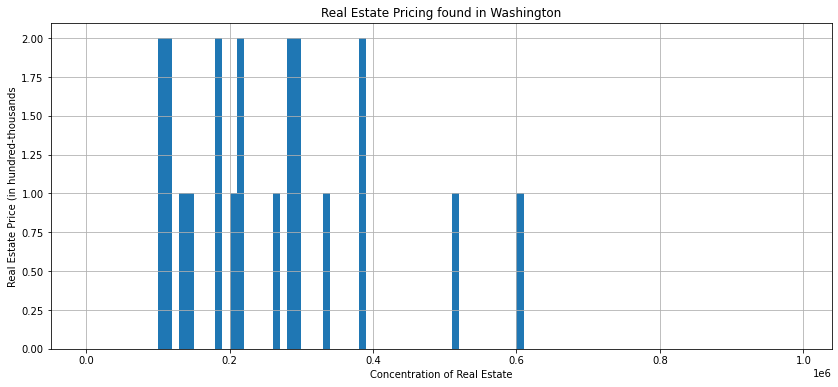

In [298]:
bin_values = np.arange(start=0, stop=1000000, step=10000)
plt.title('Real Estate Pricing found in Washington')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands')
WA_filtered['avg'].hist(bins=bin_values, figsize=[14,6])

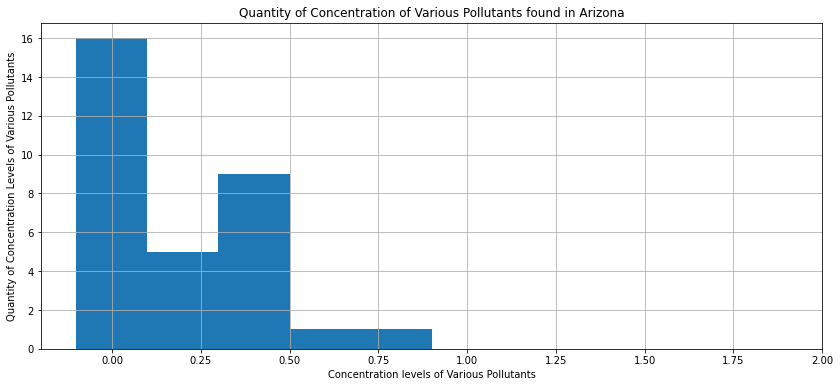

In [299]:
bin_values = np.arange(start=-0.1, stop=2.0, step=0.2)
plt.title('Quantity of Concentration of Various Pollutants found in Arizona')
plt.xlabel('Concentration levels of Various Pollutants')
plt.ylabel('Quantity of Concentration Levels of Various Pollutants')
AZ_filtered['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

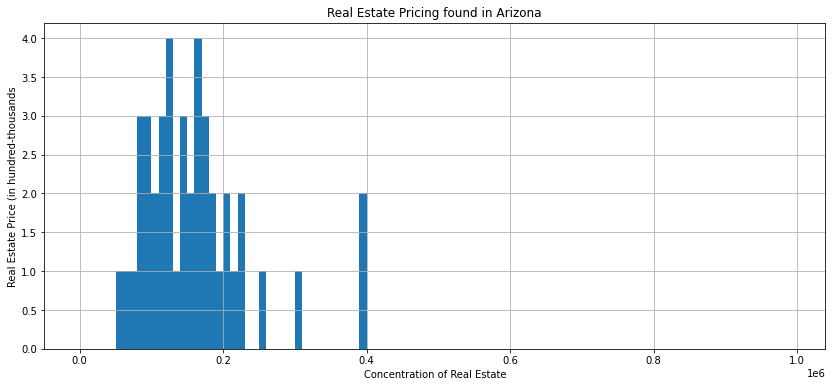

In [300]:
bin_values = np.arange(start=0, stop=1000000, step=10000)
plt.title('Real Estate Pricing found in Arizona')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands')
AZ_filtered['avg'].hist(bins=bin_values, figsize=[14,6])

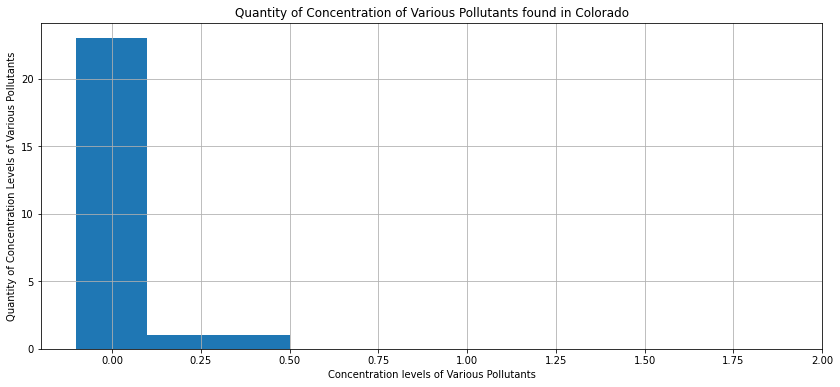

In [301]:
bin_values = np.arange(start=-0.1, stop=2.0, step=0.2)
plt.title('Quantity of Concentration of Various Pollutants found in Colorado')
plt.xlabel('Concentration levels of Various Pollutants')
plt.ylabel('Quantity of Concentration Levels of Various Pollutants')
CO_filtered['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

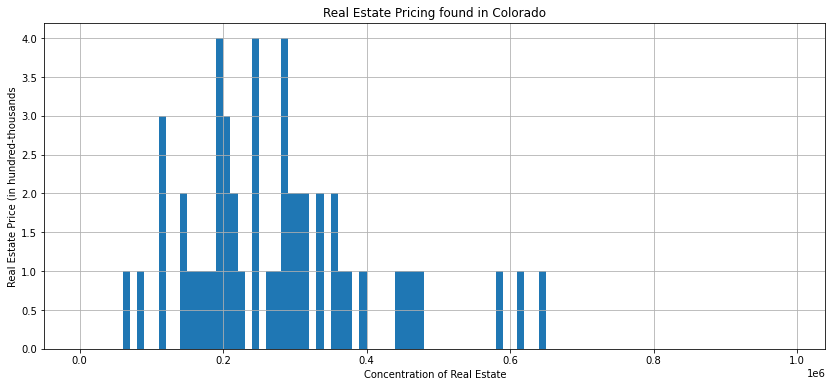

In [302]:
bin_values = np.arange(start=0, stop=1000000, step=10000)
plt.title('Real Estate Pricing found in Colorado')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands')
CO_filtered['avg'].hist(bins=bin_values, figsize=[14,6])

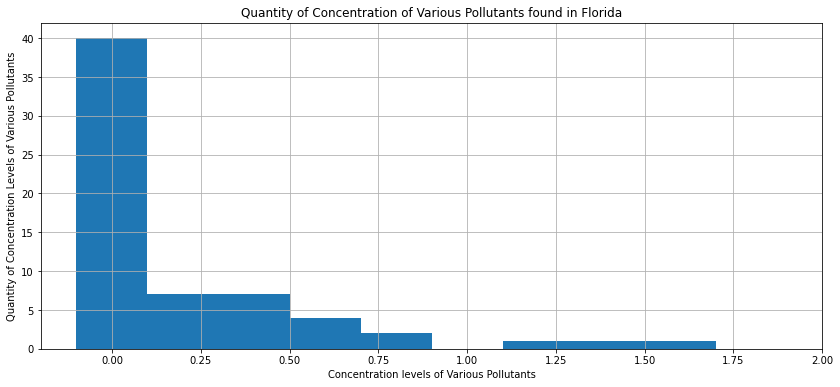

In [303]:
bin_values = np.arange(start=-0.1, stop=2.0, step=0.2)
plt.title('Quantity of Concentration of Various Pollutants found in Florida')
plt.xlabel('Concentration levels of Various Pollutants')
plt.ylabel('Quantity of Concentration Levels of Various Pollutants')
FL_filtered['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

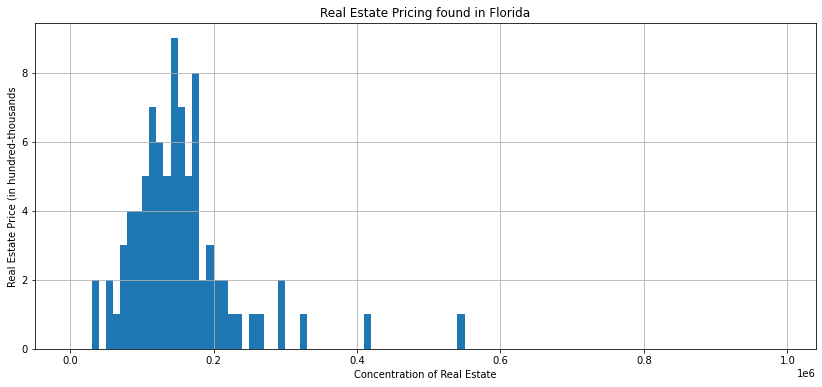

In [304]:
bin_values = np.arange(start=0, stop=1000000, step=10000)
plt.title('Real Estate Pricing found in Florida')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands')
FL_filtered['avg'].hist(bins=bin_values, figsize=[14,6])

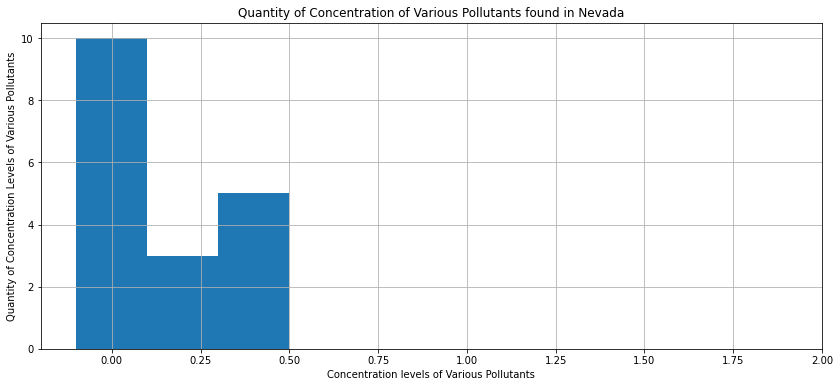

In [305]:
bin_values = np.arange(start=-0.1, stop=2.0, step=0.2)
plt.title('Quantity of Concentration of Various Pollutants found in Nevada')
plt.xlabel('Concentration levels of Various Pollutants')
plt.ylabel('Quantity of Concentration Levels of Various Pollutants')
NV_filtered['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

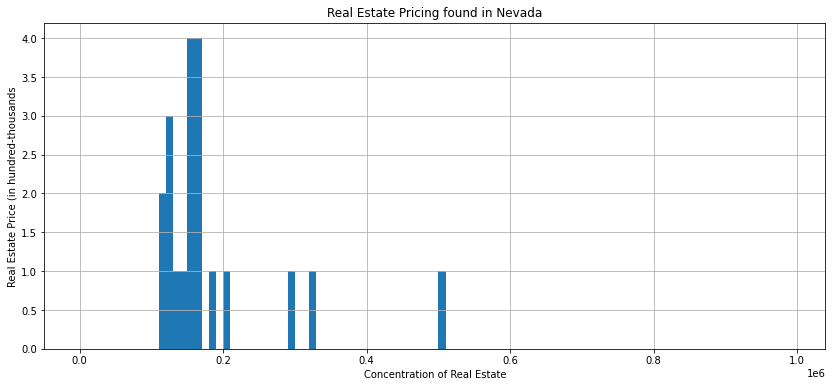

In [306]:
bin_values = np.arange(start=0, stop=1000000, step=10000)
plt.title('Real Estate Pricing found in Nevada')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands')
NV_filtered['avg'].hist(bins=bin_values, figsize=[14,6])

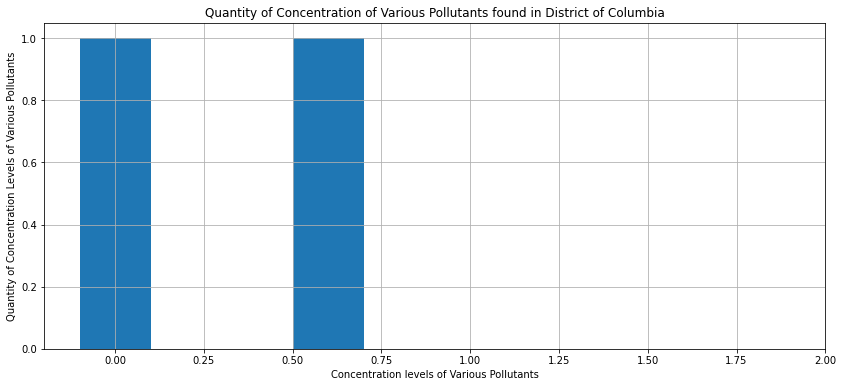

In [307]:
bin_values = np.arange(start=-0.1, stop=2.0, step=0.2)
plt.title('Quantity of Concentration of Various Pollutants found in District of Columbia')
plt.xlabel('Concentration levels of Various Pollutants')
plt.ylabel('Quantity of Concentration Levels of Various Pollutants')
DC_filtered['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

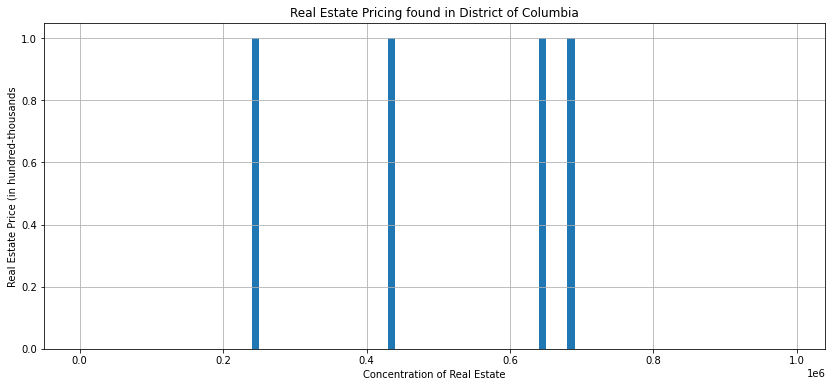

In [308]:
bin_values = np.arange(start=0, stop=1000000, step=10000)
plt.title('Real Estate Pricing found in District of Columbia')
plt.xlabel('Concentration of Real Estate')
plt.ylabel('Real Estate Price (in hundred-thousands')
DC_filtered['avg'].hist(bins=bin_values, figsize=[14,6])

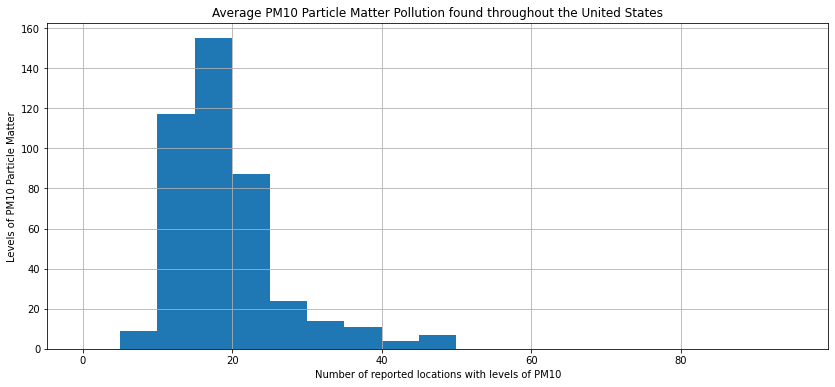

In [309]:
bin_values = np.arange(start=0, stop=100, step=5)
plt.title('Average PM10 Particle Matter Pollution found throughout the United States')
plt.xlabel('Number of reported locations with levels of PM10')
plt.ylabel('Levels of PM10 Particle Matter')
pm10_avg['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])


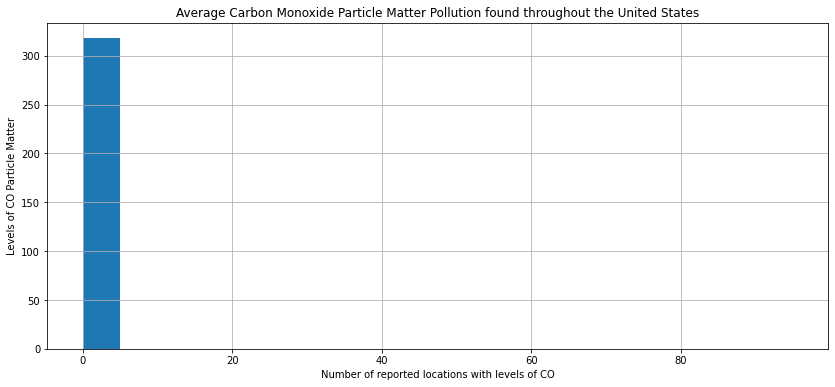

In [310]:
bin_values = np.arange(start=0, stop=100, step=5)
plt.title('Average Carbon Monoxide Particle Matter Pollution found throughout the United States')
plt.xlabel('Number of reported locations with levels of CO')
plt.ylabel('Levels of CO Particle Matter')
co_avg['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

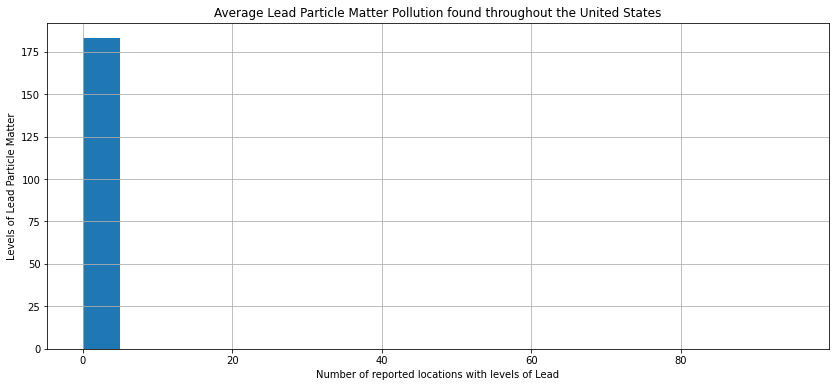

In [311]:
bin_values = np.arange(start=0, stop=100, step=5)
plt.title('Average Lead Particle Matter Pollution found throughout the United States')
plt.xlabel('Number of reported locations with levels of Lead')
plt.ylabel('Levels of Lead Particle Matter')
lead_avg['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

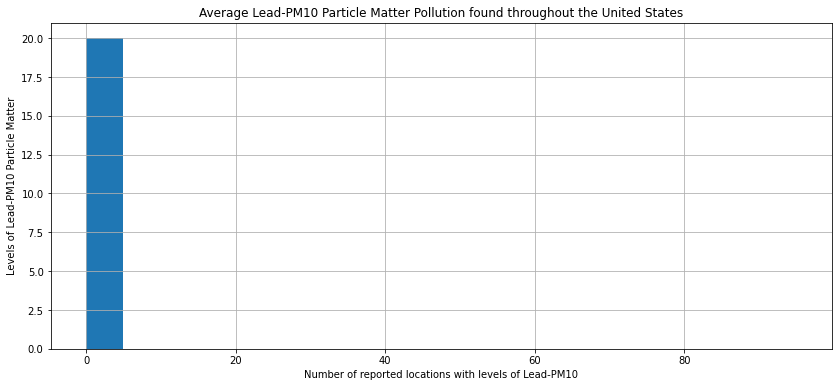

In [312]:
bin_values = np.arange(start=0, stop=100, step=5)
plt.title('Average Lead-PM10 Particle Matter Pollution found throughout the United States')
plt.xlabel('Number of reported locations with levels of Lead-PM10')
plt.ylabel('Levels of Lead-PM10 Particle Matter')
lead_pm10_avg['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

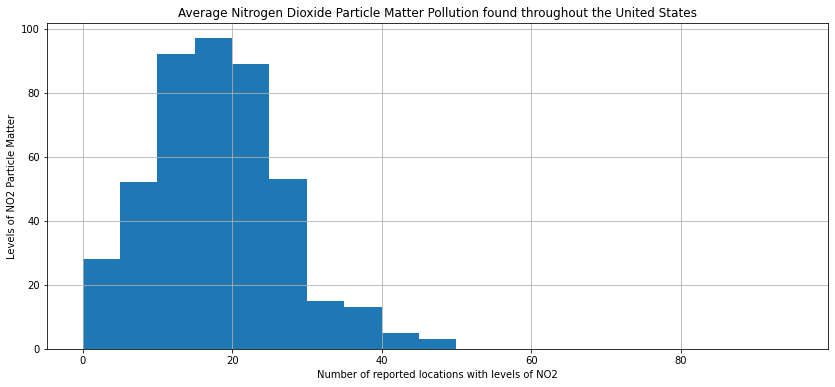

In [313]:
bin_values = np.arange(start=0, stop=100, step=5)
plt.title('Average Nitrogen Dioxide Particle Matter Pollution found throughout the United States')
plt.xlabel('Number of reported locations with levels of NO2')
plt.ylabel('Levels of NO2 Particle Matter')
no2_avg['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

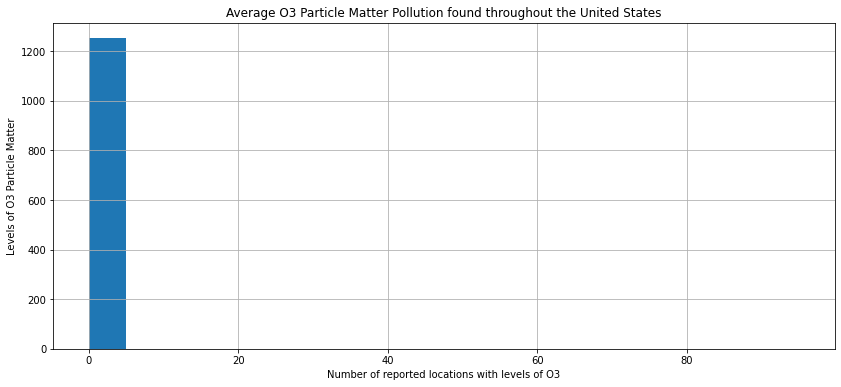

In [314]:
bin_values = np.arange(start=0, stop=100, step=5)
plt.title('Average O3 Particle Matter Pollution found throughout the United States')
plt.xlabel('Number of reported locations with levels of O3')
plt.ylabel('Levels of O3 Particle Matter')
o3_avg['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

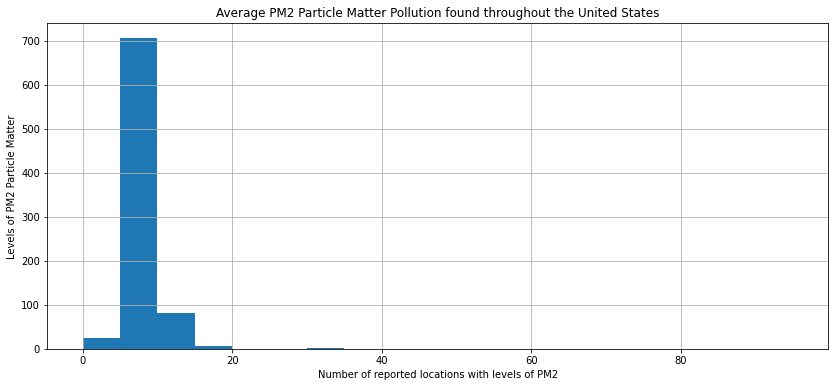

In [315]:
bin_values = np.arange(start=0, stop=100, step=5)
plt.title('Average PM2 Particle Matter Pollution found throughout the United States')
plt.xlabel('Number of reported locations with levels of PM2')
plt.ylabel('Levels of PM2 Particle Matter')
pm2_avg['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

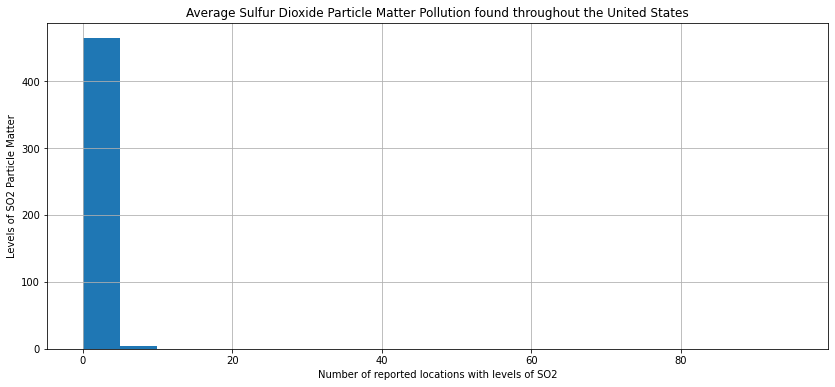

In [316]:
bin_values = np.arange(start=0, stop=100, step=5)
plt.title('Average Sulfur Dioxide Particle Matter Pollution found throughout the United States')
plt.xlabel('Number of reported locations with levels of SO2')
plt.ylabel('Levels of SO2 Particle Matter')
so2_avg['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

In [317]:
CA_pm10_filter = pm10_avg[pm10_avg.StateName == 'CA']
CA_pm10_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
5             5     97764       135       94558        Zip        CA    94558   
6             6     97764       135       94558        Zip        CA    94558   
7             7     97764       135       94558        Zip        CA    94558   
8             8     96545       139       91910        Zip        CA    91910   
10           10     96643       221       92101        Zip        CA    92101   
..          ...       ...       ...         ...        ...       ...      ...   
407         407     97719     16696       94511        Zip        CA    94511   
410         410     97325     18362       93545        Zip        CA    93545   
412         412     98190     18732       95426        Zip        CA    95426   
415         415     96541     19675       91905        Zip        CA    91905   
419         419     96862     20439       92401        Zip        CA    92401   

    State            City                             Metro  ... 2018-03-31  \
5      CA            Napa                              Napa  ...   550723.0   
6      CA            Napa                              Napa  ...   550723.0   
7      CA            Napa                              Napa  ...   550723.0   
8      CA     Chula Vista                San Diego-Carlsbad  ...   371708.0   
10     CA       San Diego                San Diego-Carlsbad  ...   747610.0   
..    ...             ...                               ...  ...        ...   
407    CA   Bethel Island     San Francisco-Oakland-Hayward  ...   405579.0   
410    CA       Lone Pine                               NaN  ...        NaN   
412    CA      Middletown                         Clearlake  ...   201777.0   
415    CA       Boulevard                San Diego-Carlsbad  ...        NaN   
419    CA  San Bernardino  Riverside-San Bernardino-Ontario  ...        NaN   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
5      555568.0    561222.0    564817.0    563842.0    563773.0    562407.0   
6      555568.0    561222.0    564817.0    563842.0    563773.0    562407.0   
7      555568.0    561222.0    564817.0    563842.0    563773.0    562407.0   
8      371699.0    371820.0    373817.0    375855.0    377510.0    377778.0   
10     745702.0    742429.0    741666.0    740104.0    740751.0    738037.0   
..          ...         ...         ...         ...         ...         ...   
407    406739.0    406986.0    410901.0    415696.0    417297.0    419178.0   
410         NaN         NaN         NaN         NaN         NaN         NaN   
412    206130.0    209433.0    211469.0    212042.0    213579.0    214263.0   
415         NaN         NaN         NaN         NaN         NaN         NaN   
419         NaN         NaN         NaN         NaN         NaN         NaN   

     2018-10-31  2018-11-30  2018-12-31  
5      567003.0    569757.0    575085.0  
6      567003.0    569757.0    575085.0  
7      567003.0    569757.0    575085.0  
8      379599.0    380632.0    380936.0  
10     738132.0    737294.0    735837.0  
..          ...         ...         ...  
407    419286.0    418222.0    416447.0  
410         NaN         NaN         NaN  
412    214510.0    213585.0    211301.0  
415         NaN         NaN         NaN  
419         NaN         NaN         NaN  

[84 rows x 64 columns]

In [318]:
TX_pm10_filter = pm10_avg[pm10_avg.StateName == 'TX']
TX_pm10_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
1             1     93144         8       79936        Zip        TX    79936   
2             2     93123        38       79912        Zip        TX    79912   
3             3     92576       124       78641        Zip        TX    78641   
4             4     92576       124       78641        Zip        TX    78641   
20           20     91731       312       77082        Zip        TX    77082   
..          ...       ...       ...         ...        ...       ...      ...   
297         297     91678      7920       77029        Zip        TX    77029   
387         387     90755     13673       75202        Zip        TX    75202   
401         401     91020     15472       75661        Zip        TX    75661   
404         404     92301     16056       78205        Zip        TX    78205   
420         420     92441     20490       78407        Zip        TX    78407   

    State            City                             Metro  ... 2018-03-31  \
1      TX         El Paso                           El Paso  ...    94193.0   
2      TX         El Paso                           El Paso  ...   127964.0   
3      TX         Leander                 Austin-Round Rock  ...   238010.0   
4      TX         Leander                 Austin-Round Rock  ...   238010.0   
20     TX         Houston  Houston-The Woodlands-Sugar Land  ...   125616.0   
..    ...             ...                               ...  ...        ...   
297    TX         Houston  Houston-The Woodlands-Sugar Land  ...    81591.0   
387    TX          Dallas       Dallas-Fort Worth-Arlington  ...   341208.0   
401    TX        Marshall                          Marshall  ...        NaN   
404    TX     San Antonio         San Antonio-New Braunfels  ...   495914.0   
420    TX  Corpus Christi                    Corpus Christi  ...        NaN   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
1       94263.0     94325.0     95150.0     95927.0     96654.0     97181.0   
2      128306.0    128273.0    128503.0    129225.0    129792.0    130305.0   
3      238444.0    238463.0    238290.0    238406.0    239684.0    241831.0   
4      238444.0    238463.0    238290.0    238406.0    239684.0    241831.0   
20     126585.0    127330.0    127421.0    127692.0    128440.0    129055.0   
..          ...         ...         ...         ...         ...         ...   
297     82844.0     84480.0     85046.0     86497.0     87743.0     89222.0   
387    341977.0    342073.0    341968.0    345615.0    352060.0    355389.0   
401         NaN         NaN         NaN         NaN         NaN         NaN   
404    498328.0    504986.0    509009.0    511274.0    507097.0    501189.0   
420         NaN         NaN         NaN         NaN         NaN         NaN   

     2018-10-31  2018-11-30  2018-12-31  
1       97809.0     98459.0     99001.0  
2      130934.0    131726.0    132508.0  
3      243672.0    244404.0    244220.0  
4      243672.0    244404.0    244220.0  
20     129400.0    129284.0    130048.0  
..          ...         ...         ...  
297     90370.0     91871.0     93435.0  
387    356687.0    356242.0    358547.0  
401         NaN         NaN         NaN  
404    498295.0    497436.0    499243.0  
420         NaN         NaN         NaN  

[28 rows x 64 columns]

In [319]:
CA_co_filter = co_avg[co_avg.StateName == 'CA']
CA_co_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
3             3     97764       135       94558        Zip        CA    94558   
4             4     97764       135       94558        Zip        CA    94558   
5             5     97764       135       94558        Zip        CA    94558   
6             6     97431       142       93722        Zip        CA    93722   
9             9     96643       221       92101        Zip        CA    92101   
..          ...       ...       ...         ...        ...       ...      ...   
293         293     97844     11019       94710        Zip        CA    94710   
294         294     98036     11123       95202        Zip        CA    95202   
311         311     96542     15387       91906        Zip        CA    91906   
314         314     97719     16696       94511        Zip        CA    94511   
317         317     96862     20439       92401        Zip        CA    92401   

    State            City                             Metro  ... 2018-03-31  \
3      CA            Napa                              Napa  ...   550723.0   
4      CA            Napa                              Napa  ...   550723.0   
5      CA            Napa                              Napa  ...   550723.0   
6      CA          Fresno                            Fresno  ...   158246.0   
9      CA       San Diego                San Diego-Carlsbad  ...   747610.0   
..    ...             ...                               ...  ...        ...   
293    CA        Berkeley     San Francisco-Oakland-Hayward  ...   929870.0   
294    CA        Stockton                     Stockton-Lodi  ...        NaN   
311    CA           Campo                San Diego-Carlsbad  ...   302113.0   
314    CA   Bethel Island     San Francisco-Oakland-Hayward  ...   405579.0   
317    CA  San Bernardino  Riverside-San Bernardino-Ontario  ...        NaN   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
3      555568.0    561222.0    564817.0    563842.0    563773.0    562407.0   
4      555568.0    561222.0    564817.0    563842.0    563773.0    562407.0   
5      555568.0    561222.0    564817.0    563842.0    563773.0    562407.0   
6      158310.0    160498.0    163465.0    165213.0    164934.0    164910.0   
9      745702.0    742429.0    741666.0    740104.0    740751.0    738037.0   
..          ...         ...         ...         ...         ...         ...   
293    942969.0    958391.0    958445.0    945926.0    933078.0    925585.0   
294         NaN         NaN         NaN         NaN         NaN         NaN   
311    299953.0    296502.0    295637.0    295784.0    295740.0    293131.0   
314    406739.0    406986.0    410901.0    415696.0    417297.0    419178.0   
317         NaN         NaN         NaN         NaN         NaN         NaN   

     2018-10-31  2018-11-30  2018-12-31  
3      567003.0    569757.0    575085.0  
4      567003.0    569757.0    575085.0  
5      567003.0    569757.0    575085.0  
6      166169.0    168329.0    169801.0  
9      738132.0    737294.0    735837.0  
..          ...         ...         ...  
293    926051.0    923386.0    916224.0  
294         NaN         NaN         NaN  
311    291061.0    289501.0    291816.0  
314    419286.0    418222.0    416447.0  
317         NaN         NaN         NaN  

[72 rows x 64 columns]

In [320]:
TX_co_filter = co_avg[co_avg.StateName == 'TX']
TX_co_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
0             0     93123        38       79912        Zip        TX    79912   
27           27     93133       519       79924        Zip        TX    79924   
28           28     92662       523       78753        Zip        TX    78753   
35           35     92480       685       78520        Zip        TX    78520   
137         137     91741      2453       77092        Zip        TX    77092   
..          ...       ...       ...         ...        ...       ...      ...   
262         262     93115      7326       79903        Zip        TX    79903   
264         264     91660      7409       77011        Zip        TX    77011   
265         265     91260      7412       76115        Zip        TX    76115   
266         266     91678      7920       77029        Zip        TX    77029   
312         312     91512     15636       76640        Zip        TX    76640   

    State         City                             Metro  ... 2018-03-31  \
0      TX      El Paso                           El Paso  ...   127964.0   
27     TX      El Paso                           El Paso  ...    85975.0   
28     TX       Austin                 Austin-Round Rock  ...   208147.0   
35     TX  Brownsville             Brownsville-Harlingen  ...    76320.0   
137    TX      Houston  Houston-The Woodlands-Sugar Land  ...   104680.0   
..    ...          ...                               ...  ...        ...   
262    TX      El Paso                           El Paso  ...    89087.0   
264    TX      Houston  Houston-The Woodlands-Sugar Land  ...   111923.0   
265    TX   Fort Worth       Dallas-Fort Worth-Arlington  ...    95285.0   
266    TX      Houston  Houston-The Woodlands-Sugar Land  ...    81591.0   
312    TX         Ross                              Waco  ...    90706.0   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
0      128306.0    128273.0    128503.0    129225.0    129792.0    130305.0   
27      85831.0     85449.0     85897.0     86158.0     86609.0     86797.0   
28     208385.0    209329.0    210262.0    211006.0    212723.0    214627.0   
35      76629.0     77231.0     77383.0     77830.0     77085.0     76217.0   
137    106193.0    106999.0    107484.0    107682.0    108460.0    109202.0   
..          ...         ...         ...         ...         ...         ...   
262     88870.0     88995.0     90333.0     91639.0     92545.0     92536.0   
264    116191.0    120858.0    124770.0    128220.0    129420.0    128663.0   
265     95450.0     96396.0     98086.0     99378.0     99677.0     99050.0   
266     82844.0     84480.0     85046.0     86497.0     87743.0     89222.0   
312     90349.0     90721.0     91838.0     91878.0     91714.0     91334.0   

     2018-10-31  2018-11-30  2018-12-31  
0      130934.0    131726.0    132508.0  
27      87209.0     87641.0     87835.0  
28     216864.0    217582.0    218226.0  
35      74730.0     74104.0     74146.0  
137    110111.0    110637.0    111072.0  
..          ...         ...         ...  
262     93008.0     93168.0     93351.0  
264    127866.0    129780.0    131764.0  
265     99799.0    101107.0    103036.0  
266     90370.0     91871.0     93435.0  
312     91209.0     91999.0     93308.0  

[20 rows x 64 columns]

In [321]:
CA_lead_filter = lead_avg[lead_avg.StateName == 'CA']
CA_lead_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
21           21     96589       693       92020        Zip        CA    92020   
22           22     96888       789       92509        Zip        CA    92509   
23           23     96888       789       92509        Zip        CA    92509   
33           33     96197      1665       90660        Zip        CA    90660   
40           40     96885      1906       92506        Zip        CA    92506   
..          ...       ...       ...         ...        ...       ...      ...   
125         125     96129      7239       90293        Zip        CA    90293   
126         126     96490      7266       91746        Zip        CA    91746   
139         139     96201      8537       90670        Zip        CA    90670   
178         178     96039     17791       90058        Zip        CA    90058   
182         182     96862     20439       92401        Zip        CA    92401   

    State                City                             Metro  ...  \
21     CA            El Cajon                San Diego-Carlsbad  ...   
22     CA           Riverside  Riverside-San Bernardino-Ontario  ...   
23     CA           Riverside  Riverside-San Bernardino-Ontario  ...   
33     CA         Pico Rivera    Los Angeles-Long Beach-Anaheim  ...   
40     CA           Riverside  Riverside-San Bernardino-Ontario  ...   
..    ...                 ...                               ...  ...   
125    CA         Los Angeles    Los Angeles-Long Beach-Anaheim  ...   
126    CA  West Puente Valley    Los Angeles-Long Beach-Anaheim  ...   
139    CA    Santa Fe Springs    Los Angeles-Long Beach-Anaheim  ...   
178    CA         Los Angeles    Los Angeles-Long Beach-Anaheim  ...   
182    CA      San Bernardino  Riverside-San Bernardino-Ontario  ...   

    2018-03-31  2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  \
21    302681.0    303816.0    304107.0    305437.0    306526.0    307898.0   
22    284317.0    288014.0    291449.0    295147.0    299775.0    302662.0   
23    284317.0    288014.0    291449.0    295147.0    299775.0    302662.0   
33    447063.0    450264.0    452050.0    454085.0    456845.0    458735.0   
40    335293.0    340072.0    342940.0    345631.0    346225.0    347790.0   
..         ...         ...         ...         ...         ...         ...   
125   730941.0    738051.0    740290.0    743257.0    744566.0    746501.0   
126   427080.0    430942.0    433657.0    437546.0    439347.0    439524.0   
139   459487.0    462918.0    463827.0    465488.0    467358.0    468917.0   
178        NaN         NaN         NaN         NaN         NaN         NaN   
182        NaN         NaN         NaN         NaN         NaN         NaN   

     2018-09-30  2018-10-31  2018-11-30  2018-12-31  
21     307380.0    307924.0    308576.0    308907.0  
22     303765.0    302033.0    301515.0    301842.0  
23     303765.0    302033.0    301515.0    301842.0  
33     460255.0    461203.0    462242.0    462021.0  
40     348289.0    348959.0    348807.0    348448.0  
..          ...         ...         ...         ...  
125    748265.0    752377.0    755180.0    755024.0  
126    439312.0    442044.0    444971.0    445610.0  
139    469719.0    470510.0    471511.0    470973.0  
178         NaN         NaN         NaN         NaN  
182         NaN         NaN         NaN         NaN  

[21 rows x 64 columns]

In [322]:
TX_lead_filter = lead_avg[lead_avg.StateName == 'TX']
TX_lead_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
0             0     93123        38       79912        Zip        TX    79912   
10           10     93133       519       79924        Zip        TX    79924   
18           18     92480       685       78520        Zip        TX    78520   
19           19     90637       692       75034        Zip        TX    75034   
20           20     90637       692       75034        Zip        TX    75034   
..          ...       ...       ...         ...        ...       ...      ...   
89           89     90737      4943       75160        Zip        TX    75160   
90           90     90737      4943       75160        Zip        TX    75160   
91           91     90737      4943       75160        Zip        TX    75160   
102         102     90787      5828       75235        Zip        TX    75235   
148         148     92837      9136       79108        Zip        TX    79108   

    State         City                        Metro  ... 2018-03-31  \
0      TX      El Paso                      El Paso  ...   127964.0   
10     TX      El Paso                      El Paso  ...    85975.0   
18     TX  Brownsville        Brownsville-Harlingen  ...    76320.0   
19     TX       Frisco  Dallas-Fort Worth-Arlington  ...   316039.0   
20     TX       Frisco  Dallas-Fort Worth-Arlington  ...   316039.0   
..    ...          ...                          ...  ...        ...   
89     TX      Terrell  Dallas-Fort Worth-Arlington  ...   101435.0   
90     TX      Terrell  Dallas-Fort Worth-Arlington  ...   101435.0   
91     TX      Terrell  Dallas-Fort Worth-Arlington  ...   101435.0   
102    TX       Dallas  Dallas-Fort Worth-Arlington  ...   196173.0   
148    TX     Amarillo                     Amarillo  ...    86224.0   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
0      128306.0    128273.0    128503.0    129225.0    129792.0    130305.0   
10      85831.0     85449.0     85897.0     86158.0     86609.0     86797.0   
18      76629.0     77231.0     77383.0     77830.0     77085.0     76217.0   
19     316381.0    316497.0    316334.0    315752.0    314494.0    313343.0   
20     316381.0    316497.0    316334.0    315752.0    314494.0    313343.0   
..          ...         ...         ...         ...         ...         ...   
89     103902.0    106443.0    109487.0    107641.0    106415.0    105321.0   
90     103902.0    106443.0    109487.0    107641.0    106415.0    105321.0   
91     103902.0    106443.0    109487.0    107641.0    106415.0    105321.0   
102    195567.0    195054.0    194789.0    195872.0    198540.0    197696.0   
148     86622.0     87642.0     89566.0     91612.0     93354.0     94670.0   

     2018-10-31  2018-11-30  2018-12-31  
0      130934.0    131726.0    132508.0  
10      87209.0     87641.0     87835.0  
18      74730.0     74104.0     74146.0  
19     313022.0    313183.0    313480.0  
20     313022.0    313183.0    313480.0  
..          ...         ...         ...  
89     108962.0    111786.0    115441.0  
90     108962.0    111786.0    115441.0  
91     108962.0    111786.0    115441.0  
102    195457.0    191937.0    191742.0  
148     96077.0     97059.0     98102.0  

[14 rows x 64 columns]

In [323]:
CA_lead_pm10_filter = lead_pm10_avg[lead_pm10_avg.StateName == 'CA']
CA_lead_pm10_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
2           2     97980       544       95112        Zip        CA    95112   
8           8     98430      1844       95821        Zip        CA    95821   

  State          City                                Metro  ... 2018-03-31  \
2    CA      San Jose       San Jose-Sunnyvale-Santa Clara  ...   839686.0   
8    CA  Arden-Arcade  Sacramento--Roseville--Arden-Arcade  ...   274333.0   

   2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
2    852417.0    863349.0    874671.0    889188.0    891678.0    890857.0   
8    275016.0    275957.0    277230.0    278173.0    278423.0    278954.0   

   2018-10-31  2018-11-30  2018-12-31  
2    884893.0    880765.0    867688.0  
8    279660.0    280082.0    281340.0  

[2 rows x 64 columns]

In [324]:
TX_lead_pm10_filter = lead_pm10_avg[lead_pm10_avg.StateName == 'TX']
TX_lead_pm10_filter

Empty DataFrame
Columns: [Unnamed: 0, RegionID, SizeRank, RegionName, RegionType, StateName, zipcode, State, City, Metro, CountyName, avg, arithmetic_mean, minimum_value, maximum_value, STCOUNTYFP, population, 2015-02-28, 2015-03-31, 2015-04-30, 2015-05-31, 2015-06-30, 2015-07-31, 2015-08-31, 2015-09-30, 2015-10-31, 2015-11-30, 2015-12-31, 2016-01-31, 2016-02-29, 2016-03-31, 2016-04-30, 2016-05-31, 2016-06-30, 2016-07-31, 2016-08-31, 2016-09-30, 2016-10-31, 2016-11-30, 2016-12-31, 2017-01-31, 2017-02-28, 2017-03-31, 2017-04-30, 2017-05-31, 2017-06-30, 2017-07-31, 2017-08-31, 2017-09-30, 2017-10-31, 2017-11-30, 2017-12-31, 2018-01-31, 2018-02-28, 2018-03-31, 2018-04-30, 2018-05-31, 2018-06-30, 2018-07-31, 2018-08-31, 2018-09-30, 2018-10-31, 2018-11-30, 2018-12-31]
Index: []

[0 rows x 64 columns]

In [325]:
CA_no2_filter = no2_avg[no2_avg.StateName == 'CA']
CA_no2_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
5             5     96239       112       90805        Zip        CA    90805   
6             6     97764       135       94558        Zip        CA    94558   
7             7     97764       135       94558        Zip        CA    94558   
8             8     97764       135       94558        Zip        CA    94558   
9             9     96545       139       91910        Zip        CA    91910   
..          ...       ...       ...         ...        ...       ...      ...   
395         395     98036     11123       95202        Zip        CA    95202   
401         401     97257     11995       93427        Zip        CA    93427   
416         416     97430     13228       93721        Zip        CA    93721   
433         433     97719     16696       94511        Zip        CA    94511   
440         440     96862     20439       92401        Zip        CA    92401   

    State            City                             Metro  ... 2018-03-31  \
5      CA      Long Beach    Los Angeles-Long Beach-Anaheim  ...   421944.0   
6      CA            Napa                              Napa  ...   550723.0   
7      CA            Napa                              Napa  ...   550723.0   
8      CA            Napa                              Napa  ...   550723.0   
9      CA     Chula Vista                San Diego-Carlsbad  ...   371708.0   
..    ...             ...                               ...  ...        ...   
395    CA        Stockton                     Stockton-Lodi  ...        NaN   
401    CA        Buellton         Santa Maria-Santa Barbara  ...   440229.0   
416    CA          Fresno                            Fresno  ...    95722.0   
433    CA   Bethel Island     San Francisco-Oakland-Hayward  ...   405579.0   
440    CA  San Bernardino  Riverside-San Bernardino-Ontario  ...        NaN   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
5      425854.0    428201.0    430359.0    431170.0    432122.0    432977.0   
6      555568.0    561222.0    564817.0    563842.0    563773.0    562407.0   
7      555568.0    561222.0    564817.0    563842.0    563773.0    562407.0   
8      555568.0    561222.0    564817.0    563842.0    563773.0    562407.0   
9      371699.0    371820.0    373817.0    375855.0    377510.0    377778.0   
..          ...         ...         ...         ...         ...         ...   
395         NaN         NaN         NaN         NaN         NaN         NaN   
401    444854.0    448721.0    449180.0    453651.0    458151.0    464262.0   
416     96109.0     97523.0     98869.0    100004.0     99579.0     99034.0   
433    406739.0    406986.0    410901.0    415696.0    417297.0    419178.0   
440         NaN         NaN         NaN         NaN         NaN         NaN   

     2018-10-31  2018-11-30  2018-12-31  
5      435645.0    436797.0    436344.0  
6      567003.0    569757.0    575085.0  
7      567003.0    569757.0    575085.0  
8      567003.0    569757.0    575085.0  
9      379599.0    380632.0    380936.0  
..          ...         ...         ...  
395         NaN         NaN         NaN  
401    466212.0    465434.0    465391.0  
416     98426.0     99828.0    101908.0  
433    419286.0    418222.0    416447.0  
440         NaN         NaN         NaN  

[99 rows x 64 columns]

In [326]:
TX_no2_filter = no2_avg[no2_avg.StateName == 'TX']
TX_no2_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
2             2     91922        46       77429        Zip        TX    77429   
3             3     90795        84       75243        Zip        TX    75243   
33           33     92662       523       78753        Zip        TX    78753   
36           36     91212       619       76051        Zip        TX    76051   
37           37     91212       619       76051        Zip        TX    76051   
..          ...       ...       ...         ...        ...       ...      ...   
391         391     91047     10313       75704        Zip        TX    75704   
403         403     90989     12539       75603        Zip        TX    75603   
404         404     90989     12539       75603        Zip        TX    75603   
430         430     91020     15472       75661        Zip        TX    75661   
431         431     91512     15636       76640        Zip        TX    76640   

    State       City                             Metro  ... 2018-03-31  \
2      TX    Cypress  Houston-The Woodlands-Sugar Land  ...   169504.0   
3      TX     Dallas       Dallas-Fort Worth-Arlington  ...   108807.0   
33     TX     Austin                 Austin-Round Rock  ...   208147.0   
36     TX  Grapevine       Dallas-Fort Worth-Arlington  ...   237523.0   
37     TX  Grapevine       Dallas-Fort Worth-Arlington  ...   237523.0   
..    ...        ...                               ...  ...        ...   
391    TX      Tyler                             Tyler  ...   125652.0   
403    TX   Longview                          Longview  ...        NaN   
404    TX   Longview                          Longview  ...        NaN   
430    TX   Marshall                          Marshall  ...        NaN   
431    TX       Ross                              Waco  ...    90706.0   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
2      170275.0    170865.0    171751.0    172482.0    173554.0    174370.0   
3      109896.0    111062.0    111396.0    111688.0    112669.0    112302.0   
33     208385.0    209329.0    210262.0    211006.0    212723.0    214627.0   
36     238987.0    239602.0    241312.0    243893.0    244392.0    244307.0   
37     238987.0    239602.0    241312.0    243893.0    244392.0    244307.0   
..          ...         ...         ...         ...         ...         ...   
391    127215.0    128666.0    129158.0    129036.0    129058.0    129097.0   
403         NaN         NaN         NaN         NaN         NaN         NaN   
404         NaN         NaN         NaN         NaN         NaN         NaN   
430         NaN         NaN         NaN         NaN         NaN         NaN   
431     90349.0     90721.0     91838.0     91878.0     91714.0     91334.0   

     2018-10-31  2018-11-30  2018-12-31  
2      175144.0    176020.0    176923.0  
3      111172.0    108775.0    107916.0  
33     216864.0    217582.0    218226.0  
36     242492.0    242731.0    243321.0  
37     242492.0    242731.0    243321.0  
..          ...         ...         ...  
391    129119.0    128211.0    127975.0  
403         NaN         NaN         NaN  
404         NaN         NaN         NaN  
430         NaN         NaN         NaN  
431     91209.0     91999.0     93308.0  

[46 rows x 64 columns]

In [327]:
CA_o3_filter = o3_avg[o3_avg.StateName == 'CA']
CA_o3_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  \
13            13     97764       135       94558        Zip        CA   
14            14     97764       135       94558        Zip        CA   
15            15     97764       135       94558        Zip        CA   
16            16     96545       139       91910        Zip        CA   
17            17     97431       142       93722        Zip        CA   
...          ...       ...       ...         ...        ...       ...   
1128        1128     98310     14327       95614        Zip        CA   
1148        1148     98519     15133       95969        Zip        CA   
1160        1160     97281     15487       93453        Zip        CA   
1179        1179     97719     16696       94511        Zip        CA   
1222        1222     96862     20439       92401        Zip        CA   

      zipcode State            City  \
13      94558    CA            Napa   
14      94558    CA            Napa   
15      94558    CA            Napa   
16      91910    CA     Chula Vista   
17      93722    CA          Fresno   
...       ...   ...             ...   
1128    95614    CA            Cool   
1148    95969    CA        Paradise   
1160    93453    CA         Simmler   
1179    94511    CA   Bethel Island   
1222    92401    CA  San Bernardino   

                                          Metro  ... 2018-03-31  2018-04-30  \
13                                         Napa  ...   550723.0    555568.0   
14                                         Napa  ...   550723.0    555568.0   
15                                         Napa  ...   550723.0    555568.0   
16                           San Diego-Carlsbad  ...   371708.0    371699.0   
17                                       Fresno  ...   158246.0    158310.0   
...                                         ...  ...        ...         ...   
1128        Sacramento--Roseville--Arden-Arcade  ...   350894.0    352771.0   
1148                                      Chico  ...   225800.0    228473.0   
1160  San Luis Obispo-Paso Robles-Arroyo Grande  ...   438103.0    438202.0   
1179              San Francisco-Oakland-Hayward  ...   405579.0    406739.0   
1222           Riverside-San Bernardino-Ontario  ...        NaN         NaN   

      2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  2018-10-31  \
13      561222.0    564817.0    563842.0    563773.0    562407.0    567003.0   
14      561222.0    564817.0    563842.0    563773.0    562407.0    567003.0   
15      561222.0    564817.0    563842.0    563773.0    562407.0    567003.0   
16      371820.0    373817.0    375855.0    377510.0    377778.0    379599.0   
17      160498.0    163465.0    165213.0    164934.0    164910.0    166169.0   
...          ...         ...         ...         ...         ...         ...   
1128    353659.0    352581.0    349986.0    349259.0    351559.0    353856.0   
1148    231724.0    232944.0    232358.0    231602.0    231613.0    232296.0   
1160    435842.0    440526.0    446818.0    451119.0    442984.0    429744.0   
1179    406986.0    410901.0    415696.0    417297.0    419178.0    419286.0   
1222         NaN         NaN         NaN         NaN         NaN         NaN   

      2018-11-30  2018-12-31  
13      569757.0    575085.0  
14      569757.0    575085.0  
15      569757.0    575085.0  
16      380632.0    380936.0  
17      168329.0    169801.0  
...          ...         ...  
1128    355338.0    357886.0  
1148    232126.0    234457.0  
1160    421637.0    416222.0  
1179    418222.0    416447.0  
1222         NaN         NaN  

[151 rows x 64 columns]

In [328]:
TX_o3_filter = o3_avg[o3_avg.StateName == 'TX']
TX_o3_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  \
0              0     93144         8       79936        Zip        TX   
3              3     91922        46       77429        Zip        TX   
9              9     92576       124       78641        Zip        TX   
10            10     92576       124       78641        Zip        TX   
25            25     90638       195       75035        Zip        TX   
...          ...       ...       ...         ...        ...       ...   
1051        1051     91336     11633       76258        Zip        TX   
1072        1072     90989     12539       75603        Zip        TX   
1073        1073     90989     12539       75603        Zip        TX   
1159        1159     91020     15472       75661        Zip        TX   
1164        1164     91512     15636       76640        Zip        TX   

      zipcode State         City                             Metro  ...  \
0       79936    TX      El Paso                           El Paso  ...   
3       77429    TX      Cypress  Houston-The Woodlands-Sugar Land  ...   
9       78641    TX      Leander                 Austin-Round Rock  ...   
10      78641    TX      Leander                 Austin-Round Rock  ...   
25      75035    TX       Frisco       Dallas-Fort Worth-Arlington  ...   
...       ...   ...          ...                               ...  ...   
1051    76258    TX  Pilot Point       Dallas-Fort Worth-Arlington  ...   
1072    75603    TX     Longview                          Longview  ...   
1073    75603    TX     Longview                          Longview  ...   
1159    75661    TX     Marshall                          Marshall  ...   
1164    76640    TX         Ross                              Waco  ...   

     2018-03-31  2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  \
0       94193.0     94263.0     94325.0     95150.0     95927.0     96654.0   
3      169504.0    170275.0    170865.0    171751.0    172482.0    173554.0   
9      238010.0    238444.0    238463.0    238290.0    238406.0    239684.0   
10     238010.0    238444.0    238463.0    238290.0    238406.0    239684.0   
25     260168.0    261965.0    262567.0    262640.0    261905.0    261323.0   
...         ...         ...         ...         ...         ...         ...   
1051   154128.0    155959.0    157232.0    157996.0    155754.0    155620.0   
1072        NaN         NaN         NaN         NaN         NaN         NaN   
1073        NaN         NaN         NaN         NaN         NaN         NaN   
1159        NaN         NaN         NaN         NaN         NaN         NaN   
1164    90706.0     90349.0     90721.0     91838.0     91878.0     91714.0   

      2018-09-30  2018-10-31  2018-11-30  2018-12-31  
0        97181.0     97809.0     98459.0     99001.0  
3       174370.0    175144.0    176020.0    176923.0  
9       241831.0    243672.0    244404.0    244220.0  
10      241831.0    243672.0    244404.0    244220.0  
25      260516.0    260436.0    261237.0    262308.0  
...          ...         ...         ...         ...  
1051    157337.0    160900.0    162925.0    162221.0  
1072         NaN         NaN         NaN         NaN  
1073         NaN         NaN         NaN         NaN  
1159         NaN         NaN         NaN         NaN  
1164     91334.0     91209.0     91999.0     93308.0  

[78 rows x 64 columns]

In [329]:
CA_pm2_filter = pm2_avg[pm2_avg.StateName == 'CA']
CA_pm2_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
9             9     96239       112       90805        Zip        CA    90805   
14           14     96545       139       91910        Zip        CA    91910   
20           20     96643       221       92101        Zip        CA    92101   
25           25     96934       237       92592        Zip        CA    92592   
26           26     96934       237       92592        Zip        CA    92592   
..          ...       ...       ...         ...        ...       ...      ...   
702         702     98555      9788       96019        Zip        CA    96019   
728         728     98485     10938       95932        Zip        CA    95932   
729         729     98521     11058       95971        Zip        CA    95971   
774         774     98641     13475       96122        Zip        CA    96122   
807         807     96862     20439       92401        Zip        CA    92401   

    State            City                             Metro  ... 2018-03-31  \
9      CA      Long Beach    Los Angeles-Long Beach-Anaheim  ...   421944.0   
14     CA     Chula Vista                San Diego-Carlsbad  ...   371708.0   
20     CA       San Diego                San Diego-Carlsbad  ...   747610.0   
25     CA        Temecula  Riverside-San Bernardino-Ontario  ...   320619.0   
26     CA        Temecula  Riverside-San Bernardino-Ontario  ...   320619.0   
..    ...             ...                               ...  ...        ...   
702    CA     Shasta Lake                           Redding  ...   166973.0   
728    CA          Colusa                               NaN  ...   178932.0   
729    CA          Quincy                               NaN  ...   209008.0   
774    CA         Portola                               NaN  ...   131848.0   
807    CA  San Bernardino  Riverside-San Bernardino-Ontario  ...        NaN   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
9      425854.0    428201.0    430359.0    431170.0    432122.0    432977.0   
14     371699.0    371820.0    373817.0    375855.0    377510.0    377778.0   
20     745702.0    742429.0    741666.0    740104.0    740751.0    738037.0   
25     323369.0    325803.0    327767.0    329681.0    331046.0    332443.0   
26     323369.0    325803.0    327767.0    329681.0    331046.0    332443.0   
..          ...         ...         ...         ...         ...         ...   
702    166721.0    166925.0    166629.0    165483.0    165732.0    165918.0   
728    180875.0    183126.0    184748.0    183709.0    182249.0    181468.0   
729    210216.0    211648.0    212616.0    211052.0    209132.0    207179.0   
774    132843.0    134318.0    135684.0    135646.0    134582.0    133715.0   
807         NaN         NaN         NaN         NaN         NaN         NaN   

     2018-10-31  2018-11-30  2018-12-31  
9      435645.0    436797.0    436344.0  
14     379599.0    380632.0    380936.0  
20     738132.0    737294.0    735837.0  
25     332846.0    333634.0    333408.0  
26     332846.0    333634.0    333408.0  
..          ...         ...         ...  
702    169155.0    172223.0    174841.0  
728    182256.0    182714.0    183251.0  
729    207322.0    207809.0    207979.0  
774    134024.0    134665.0    135035.0  
807         NaN         NaN         NaN  

[70 rows x 64 columns]

In [330]:
TX_pm2_filter = pm2_avg[pm2_avg.StateName == 'TX']
TX_pm2_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
11           11     92576       124       78641        Zip        TX    78641   
12           12     92576       124       78641        Zip        TX    78641   
63           63     92662       523       78753        Zip        TX    78753   
76           76     92319       670       78223        Zip        TX    78223   
77           77     92319       670       78223        Zip        TX    78223   
..          ...       ...       ...         ...        ...       ...      ...   
619         619     91260      7412       76115        Zip        TX    76115   
634         634     91678      7920       77029        Zip        TX    77029   
778         778     90755     13673       75202        Zip        TX    75202   
790         790     91020     15472       75661        Zip        TX    75661   
808         808     92441     20490       78407        Zip        TX    78407   

    State            City                             Metro  ... 2018-03-31  \
11     TX         Leander                 Austin-Round Rock  ...   238010.0   
12     TX         Leander                 Austin-Round Rock  ...   238010.0   
63     TX          Austin                 Austin-Round Rock  ...   208147.0   
76     TX     San Antonio         San Antonio-New Braunfels  ...   102976.0   
77     TX     San Antonio         San Antonio-New Braunfels  ...   102976.0   
..    ...             ...                               ...  ...        ...   
619    TX      Fort Worth       Dallas-Fort Worth-Arlington  ...    95285.0   
634    TX         Houston  Houston-The Woodlands-Sugar Land  ...    81591.0   
778    TX          Dallas       Dallas-Fort Worth-Arlington  ...   341208.0   
790    TX        Marshall                          Marshall  ...        NaN   
808    TX  Corpus Christi                    Corpus Christi  ...        NaN   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
11     238444.0    238463.0    238290.0    238406.0    239684.0    241831.0   
12     238444.0    238463.0    238290.0    238406.0    239684.0    241831.0   
63     208385.0    209329.0    210262.0    211006.0    212723.0    214627.0   
76     104424.0    105458.0    105534.0    106221.0    107103.0    107332.0   
77     104424.0    105458.0    105534.0    106221.0    107103.0    107332.0   
..          ...         ...         ...         ...         ...         ...   
619     95450.0     96396.0     98086.0     99378.0     99677.0     99050.0   
634     82844.0     84480.0     85046.0     86497.0     87743.0     89222.0   
778    341977.0    342073.0    341968.0    345615.0    352060.0    355389.0   
790         NaN         NaN         NaN         NaN         NaN         NaN   
808         NaN         NaN         NaN         NaN         NaN         NaN   

     2018-10-31  2018-11-30  2018-12-31  
11     243672.0    244404.0    244220.0  
12     243672.0    244404.0    244220.0  
63     216864.0    217582.0    218226.0  
76     107070.0    107075.0    108262.0  
77     107070.0    107075.0    108262.0  
..          ...         ...         ...  
619     99799.0    101107.0    103036.0  
634     90370.0     91871.0     93435.0  
778    356687.0    356242.0    358547.0  
790         NaN         NaN         NaN  
808         NaN         NaN         NaN  

[25 rows x 64 columns]

In [331]:
CA_so2_filter = so2_avg[so2_avg.StateName == 'CA']
CA_so2_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
3             3     96816       273       92335        Zip        CA    92335   
21           21     97980       544       95112        Zip        CA    95112   
30           30     96589       693       92020        Zip        CA    92020   
31           31     97760       694       94553        Zip        CA    94553   
36           36     96958       767       92626        Zip        CA    92626   
..          ...       ...       ...         ...        ...       ...      ...   
235         235     98248      4983       95503        Zip        CA    95503   
238         238     97847      4991       94801        Zip        CA    94801   
314         314     96129      7239       90293        Zip        CA    90293   
336         336     96434      8549       91502        Zip        CA    91502   
441         441     97719     16696       94511        Zip        CA    94511   

    State           City                             Metro  ... 2018-03-31  \
3      CA        Fontana  Riverside-San Bernardino-Ontario  ...   289201.0   
21     CA       San Jose    San Jose-Sunnyvale-Santa Clara  ...   839686.0   
30     CA       El Cajon                San Diego-Carlsbad  ...   302681.0   
31     CA       Martinez     San Francisco-Oakland-Hayward  ...   425017.0   
36     CA     Costa Mesa    Los Angeles-Long Beach-Anaheim  ...   497835.0   
..    ...            ...                               ...  ...        ...   
235    CA         Eureka             Eureka-Arcata-Fortuna  ...   250382.0   
238    CA       Richmond     San Francisco-Oakland-Hayward  ...        NaN   
314    CA    Los Angeles    Los Angeles-Long Beach-Anaheim  ...   730941.0   
336    CA        Burbank    Los Angeles-Long Beach-Anaheim  ...   574049.0   
441    CA  Bethel Island     San Francisco-Oakland-Hayward  ...   405579.0   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
3      291170.0    293757.0    296719.0    299674.0    302431.0    304922.0   
21     852417.0    863349.0    874671.0    889188.0    891678.0    890857.0   
30     303816.0    304107.0    305437.0    306526.0    307898.0    307380.0   
31     424199.0    426139.0    430535.0    440617.0    444602.0    449928.0   
36     499145.0    500624.0    502815.0    504198.0    506930.0    506756.0   
..          ...         ...         ...         ...         ...         ...   
235    251481.0    253140.0    254669.0    256198.0    256690.0    257522.0   
238         NaN         NaN         NaN         NaN         NaN         NaN   
314    738051.0    740290.0    743257.0    744566.0    746501.0    748265.0   
336    579679.0    583552.0    586588.0    587884.0    587928.0    589190.0   
441    406739.0    406986.0    410901.0    415696.0    417297.0    419178.0   

     2018-10-31  2018-11-30  2018-12-31  
3      307255.0    308171.0    308620.0  
21     884893.0    880765.0    867688.0  
30     307924.0    308576.0    308907.0  
31     454916.0    461993.0    470121.0  
36     508514.0    508800.0    508175.0  
..          ...         ...         ...  
235    257755.0    258427.0    259456.0  
238         NaN         NaN         NaN  
314    752377.0    755180.0    755024.0  
336    591434.0    593450.0    592129.0  
441    419286.0    418222.0    416447.0  

[22 rows x 64 columns]

In [332]:
TX_so2_filter = so2_avg[so2_avg.StateName == 'TX']
TX_so2_filter

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  zipcode  \
12           12     92003       394       77521        Zip        TX    77521   
13           13     92003       394       77521        Zip        TX    77521   
19           19     93133       519       79924        Zip        TX    79924   
26           26     92319       670       78223        Zip        TX    78223   
27           27     92319       670       78223        Zip        TX    78223   
..          ...       ...       ...         ...        ...       ...      ...   
383         383     91101     11002       75840        Zip        TX    75840   
398         398     90989     12539       75603        Zip        TX    75603   
399         399     90989     12539       75603        Zip        TX    75603   
431         431     91512     15636       76640        Zip        TX    76640   
461         461     92441     20490       78407        Zip        TX    78407   

    State            City                             Metro  ... 2018-03-31  \
12     TX         Baytown  Houston-The Woodlands-Sugar Land  ...   108956.0   
13     TX         Baytown  Houston-The Woodlands-Sugar Land  ...   108956.0   
19     TX         El Paso                           El Paso  ...    85975.0   
26     TX     San Antonio         San Antonio-New Braunfels  ...   102976.0   
27     TX     San Antonio         San Antonio-New Braunfels  ...   102976.0   
..    ...             ...                               ...  ...        ...   
383    TX       Fairfield                               NaN  ...        NaN   
398    TX        Longview                          Longview  ...        NaN   
399    TX        Longview                          Longview  ...        NaN   
431    TX            Ross                              Waco  ...    90706.0   
461    TX  Corpus Christi                    Corpus Christi  ...        NaN   

     2018-04-30  2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  \
12     109549.0    110930.0    112290.0    113480.0    114934.0    116415.0   
13     109549.0    110930.0    112290.0    113480.0    114934.0    116415.0   
19      85831.0     85449.0     85897.0     86158.0     86609.0     86797.0   
26     104424.0    105458.0    105534.0    106221.0    107103.0    107332.0   
27     104424.0    105458.0    105534.0    106221.0    107103.0    107332.0   
..          ...         ...         ...         ...         ...         ...   
383         NaN         NaN         NaN         NaN         NaN         NaN   
398         NaN         NaN         NaN         NaN         NaN         NaN   
399         NaN         NaN         NaN         NaN         NaN         NaN   
431     90349.0     90721.0     91838.0     91878.0     91714.0     91334.0   
461         NaN         NaN         NaN         NaN         NaN         NaN   

     2018-10-31  2018-11-30  2018-12-31  
12     118356.0    119738.0    121209.0  
13     118356.0    119738.0    121209.0  
19      87209.0     87641.0     87835.0  
26     107070.0    107075.0    108262.0  
27     107070.0    107075.0    108262.0  
..          ...         ...         ...  
383         NaN         NaN         NaN  
398         NaN         NaN         NaN  
399         NaN         NaN         NaN  
431     91209.0     91999.0     93308.0  
461         NaN         NaN         NaN  

[36 rows x 64 columns]

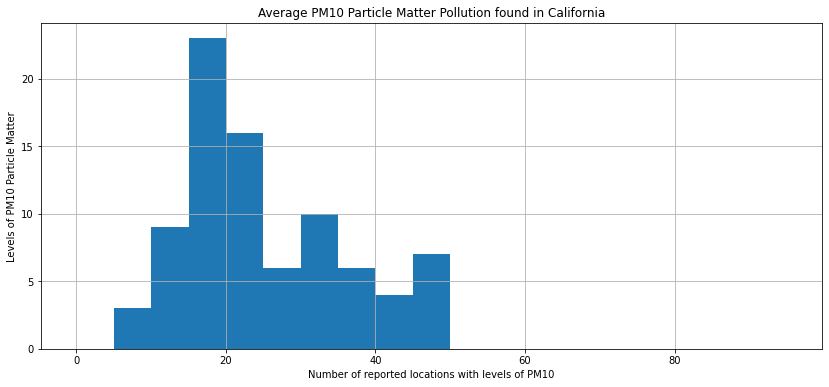

In [333]:
bin_values = np.arange(start=0, stop=100, step=5)
plt.title('Average PM10 Particle Matter Pollution found in California')
plt.xlabel('Number of reported locations with levels of PM10')
plt.ylabel('Levels of PM10 Particle Matter')
CA_pm10_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

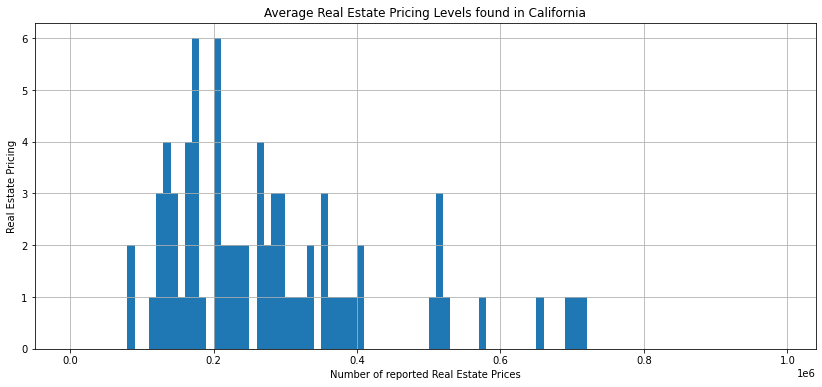

In [334]:
bin_values = np.arange(start=0, stop=1000000, step=10000)
plt.title('Average Real Estate Pricing Levels found in California')
plt.xlabel('Number of reported Real Estate Prices')
plt.ylabel('Real Estate Pricing')
CA_pm10_filter['avg'].hist(bins=bin_values, figsize=[14,6])

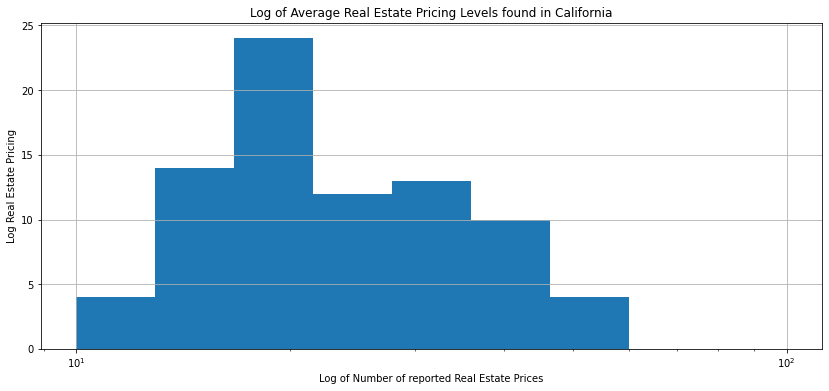

In [490]:
bin_values = np.logspace(np.log10(10), stop=np.log10(100), num=(10))
plt.title('Log of Average Real Estate Pricing Levels found in California')
plt.xlabel('Log of Number of reported Real Estate Prices')
plt.ylabel('Log Real Estate Pricing')
plt.gca().set_xscale("log")
CA_pm10_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

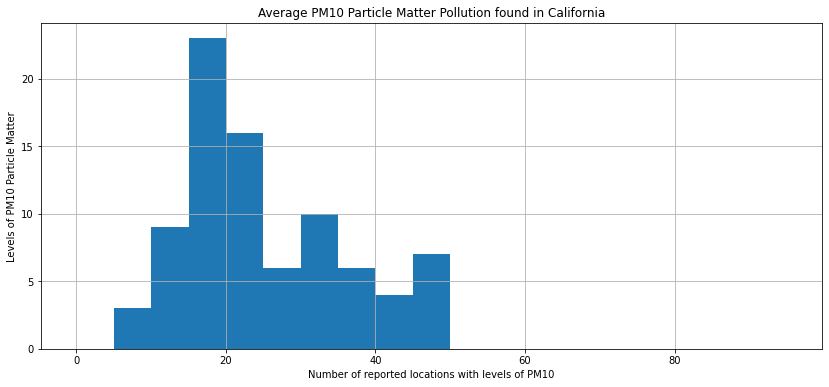

In [335]:
bin_values = np.arange(start=0, stop=100, step=5)
plt.title('Average PM10 Particle Matter Pollution found in California')
plt.xlabel('Number of reported locations with levels of PM10')
plt.ylabel('Levels of PM10 Particle Matter')
CA_pm10_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

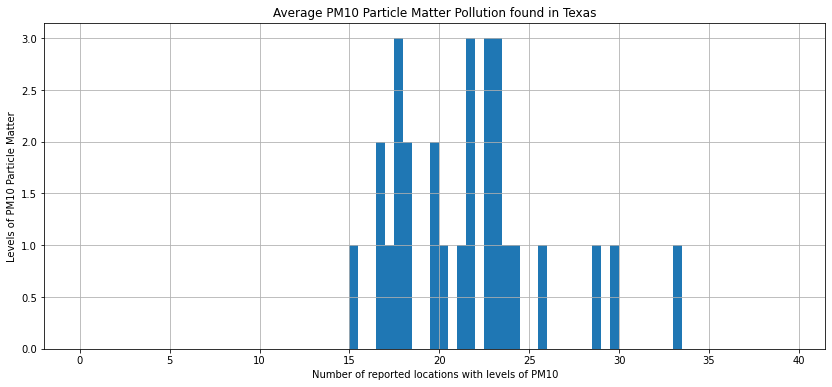

In [425]:
bin_values = np.arange(start=0, stop=40, step=0.5)
plt.title('Average PM10 Particle Matter Pollution found in Texas')
plt.xlabel('Number of reported locations with levels of PM10')
plt.ylabel('Levels of PM10 Particle Matter')
TX_pm10_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

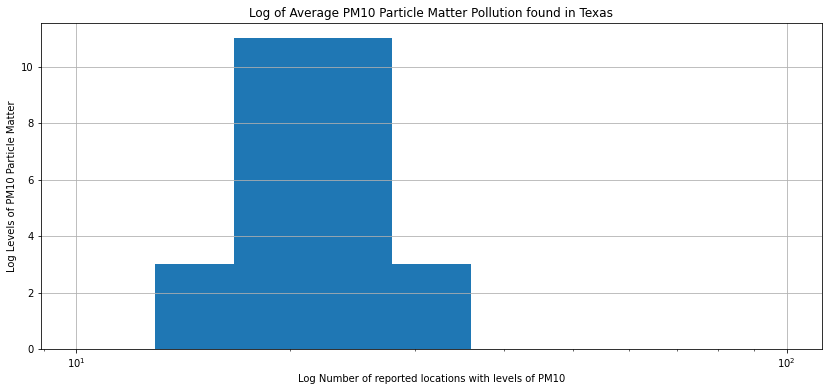

In [489]:
bin_values = np.logspace(np.log10(10), stop=np.log10(100), num=(10))
plt.title('Log of Average PM10 Particle Matter Pollution found in Texas')
plt.xlabel('Log Number of reported locations with levels of PM10')
plt.ylabel('Log Levels of PM10 Particle Matter')
plt.gca().set_xscale("log")
TX_pm10_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

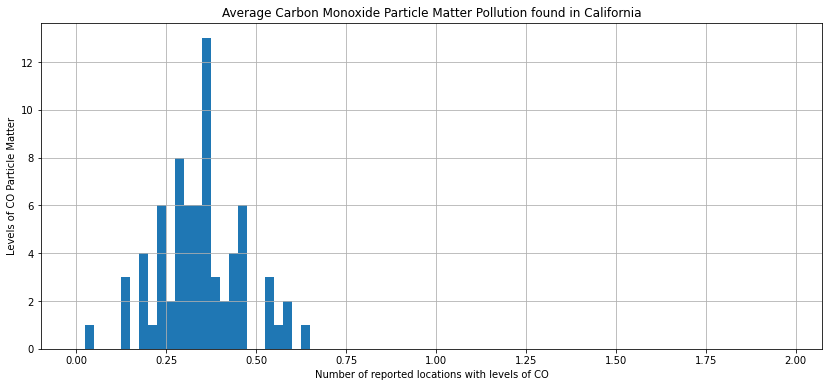

In [428]:
bin_values = np.arange(start=0, stop=2, step=0.025)
plt.title('Average Carbon Monoxide Particle Matter Pollution found in California')
plt.xlabel('Number of reported locations with levels of CO')
plt.ylabel('Levels of CO Particle Matter')
CA_co_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

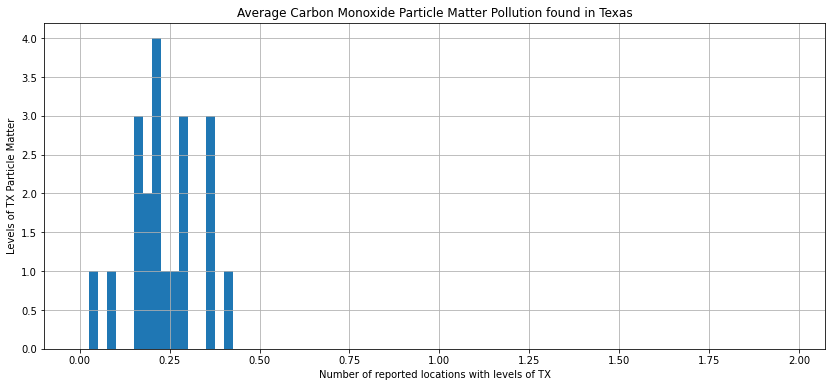

In [429]:
bin_values = np.arange(start=0, stop=2, step=0.025)
plt.title('Average Carbon Monoxide Particle Matter Pollution found in Texas')
plt.xlabel('Number of reported locations with levels of TX')
plt.ylabel('Levels of TX Particle Matter')
TX_co_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

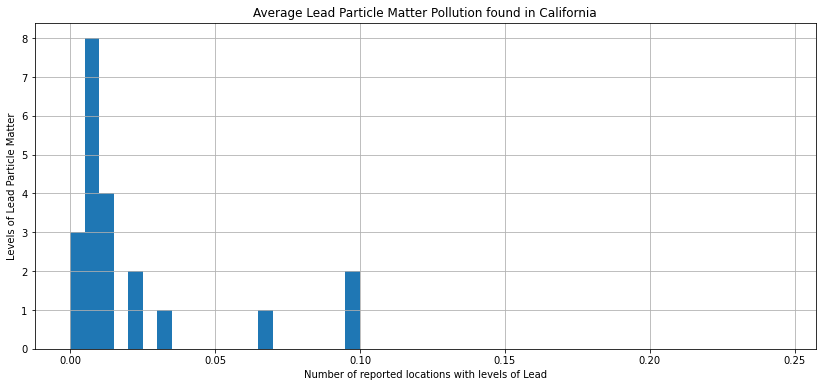

In [431]:
bin_values = np.arange(start=0, stop=0.25, step=0.005)
plt.title('Average Lead Particle Matter Pollution found in California')
plt.xlabel('Number of reported locations with levels of Lead')
plt.ylabel('Levels of Lead Particle Matter')
CA_lead_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

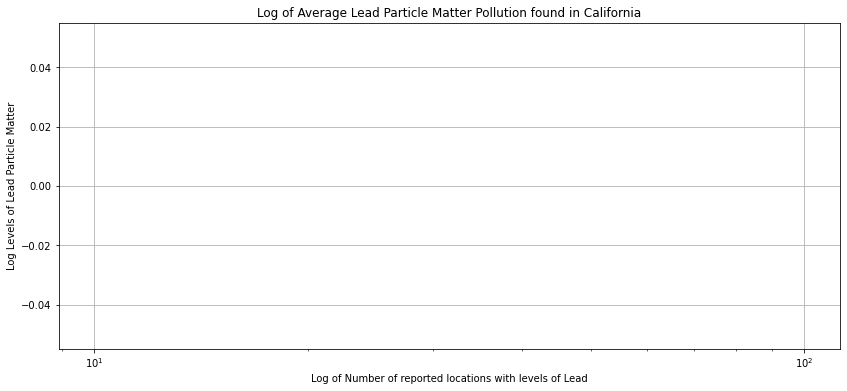

In [491]:
bin_values = np.logspace(np.log10(10), stop=np.log10(100), num=(10))
plt.title('Log of Average Lead Particle Matter Pollution found in California')
plt.xlabel('Log of Number of reported locations with levels of Lead')
plt.ylabel('Log Levels of Lead Particle Matter')
plt.gca().set_xscale("log")
CA_lead_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

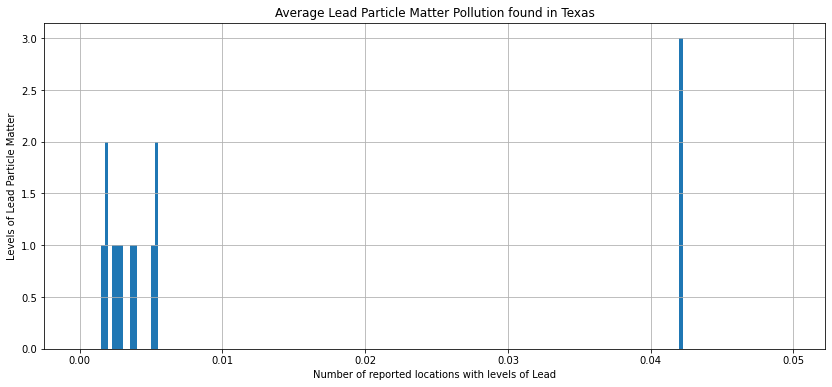

In [435]:
bin_values = np.arange(start=0, stop=0.05, step=0.00025)
plt.title('Average Lead Particle Matter Pollution found in Texas')
plt.xlabel('Number of reported locations with levels of Lead')
plt.ylabel('Levels of Lead Particle Matter')
TX_lead_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

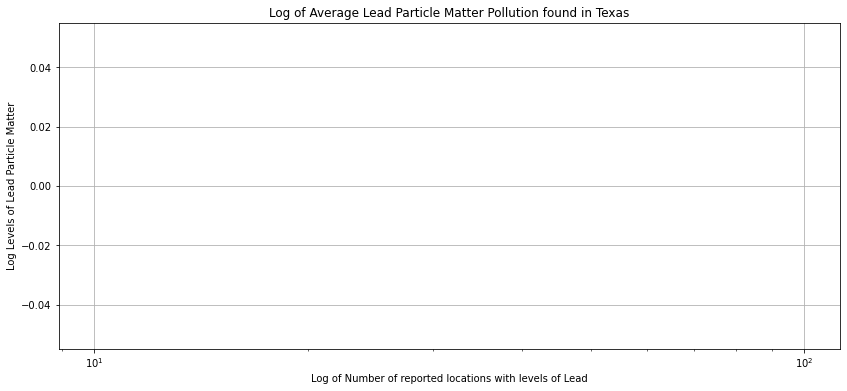

In [492]:
bin_values = np.logspace(np.log10(10), stop=np.log10(100), num=(10))
plt.title('Log of Average Lead Particle Matter Pollution found in Texas')
plt.xlabel('Log of Number of reported locations with levels of Lead')
plt.ylabel('Log Levels of Lead Particle Matter')
plt.gca().set_xscale("log")
TX_lead_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

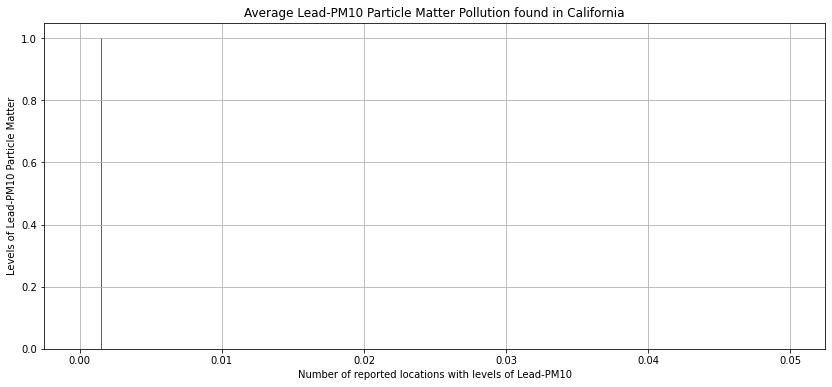

In [443]:
bin_values = np.arange(start=0, stop=0.05, step=0.00005)
plt.title('Average Lead-PM10 Particle Matter Pollution found in California')
plt.xlabel('Number of reported locations with levels of Lead-PM10')
plt.ylabel('Levels of Lead-PM10 Particle Matter')
CA_lead_pm10_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

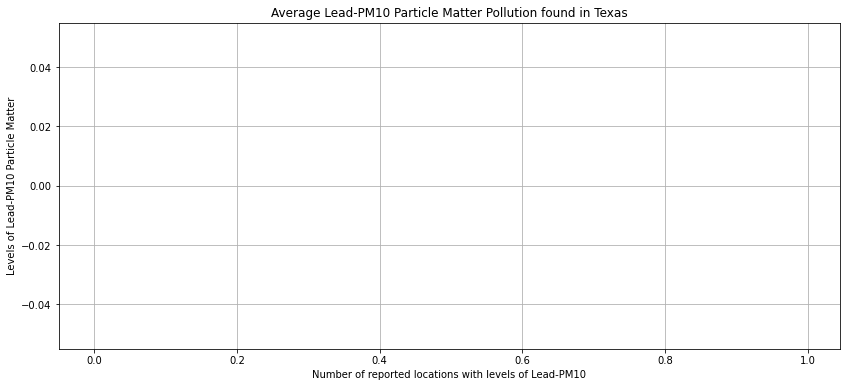

In [444]:
bin_values = np.arange(start=0, stop=1, step=0.005)
plt.title('Average Lead-PM10 Particle Matter Pollution found in Texas')
plt.xlabel('Number of reported locations with levels of Lead-PM10')
plt.ylabel('Levels of Lead-PM10 Particle Matter')
TX_lead_pm10_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

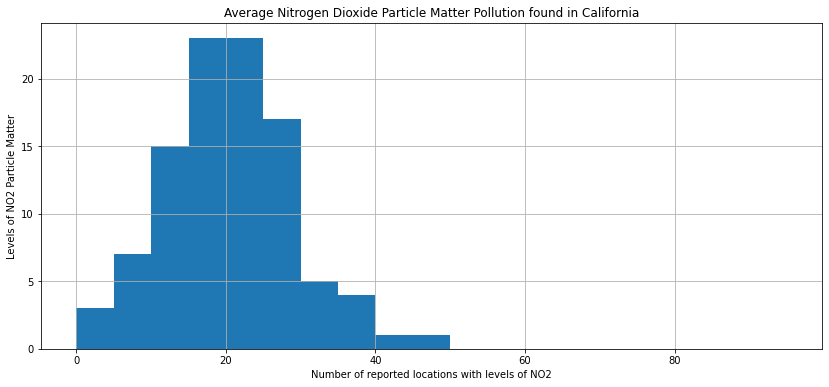

In [343]:
bin_values = np.arange(start=0, stop=100, step=5)
plt.title('Average Nitrogen Dioxide Particle Matter Pollution found in California')
plt.xlabel('Number of reported locations with levels of NO2')
plt.ylabel('Levels of NO2 Particle Matter')
CA_no2_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

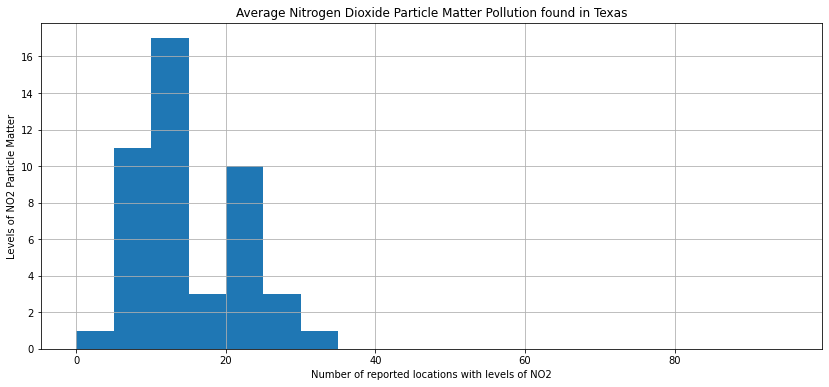

In [344]:
bin_values = np.arange(start=0, stop=100, step=5)
plt.title('Average Nitrogen Dioxide Particle Matter Pollution found in Texas')
plt.xlabel('Number of reported locations with levels of NO2')
plt.ylabel('Levels of NO2 Particle Matter')
TX_no2_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

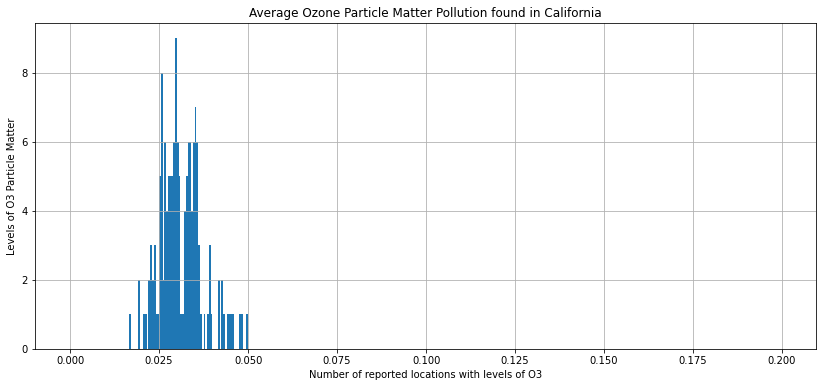

In [447]:
bin_values = np.arange(start=0, stop=0.2, step=0.0005)
plt.title('Average Ozone Particle Matter Pollution found in California')
plt.xlabel('Number of reported locations with levels of O3')
plt.ylabel('Levels of O3 Particle Matter')
CA_o3_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

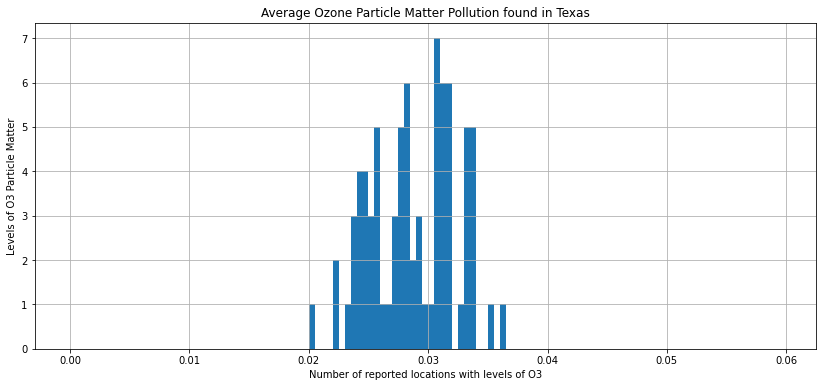

In [451]:
bin_values = np.arange(start=0, stop=0.06, step=0.0005)
plt.title('Average Ozone Particle Matter Pollution found in Texas')
plt.xlabel('Number of reported locations with levels of O3')
plt.ylabel('Levels of O3 Particle Matter')
TX_o3_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

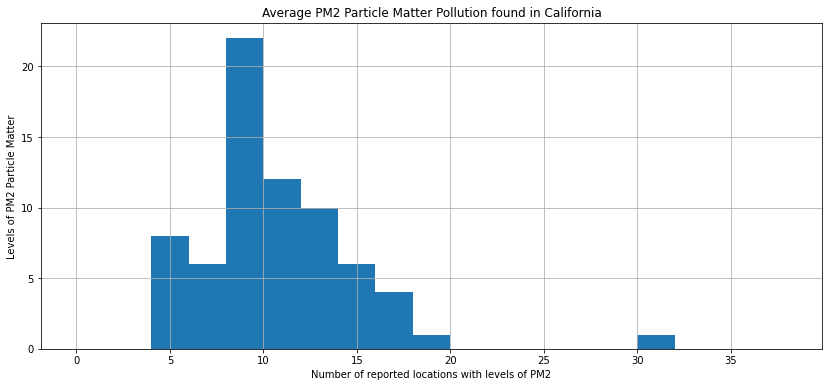

In [452]:
bin_values = np.arange(start=0, stop=40, step=2)
plt.title('Average PM2 Particle Matter Pollution found in California')
plt.xlabel('Number of reported locations with levels of PM2')
plt.ylabel('Levels of PM2 Particle Matter')
CA_pm2_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

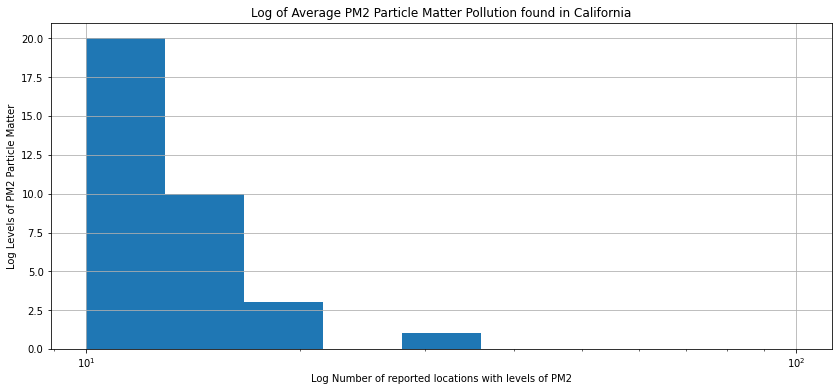

In [493]:
bin_values = np.logspace(np.log10(10), stop=np.log10(100), num=(10))
plt.title('Log of Average PM2 Particle Matter Pollution found in California')
plt.xlabel('Log Number of reported locations with levels of PM2')
plt.ylabel('Log Levels of PM2 Particle Matter')
plt.gca().set_xscale("log")
CA_pm2_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

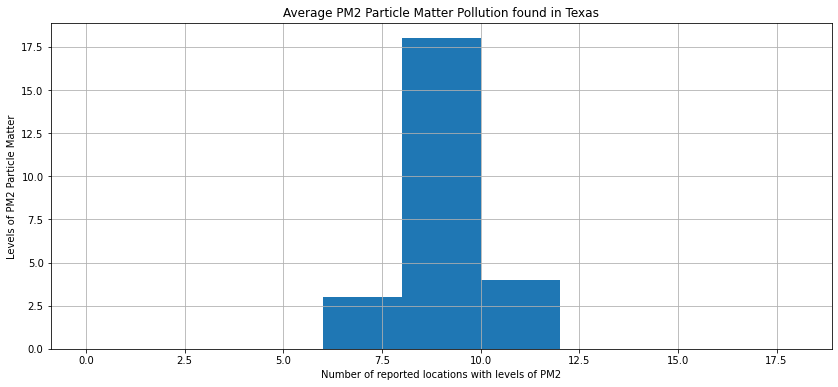

In [453]:
bin_values = np.arange(start=0, stop=20, step=2)
plt.title('Average PM2 Particle Matter Pollution found in Texas')
plt.xlabel('Number of reported locations with levels of PM2')
plt.ylabel('Levels of PM2 Particle Matter')
TX_pm2_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

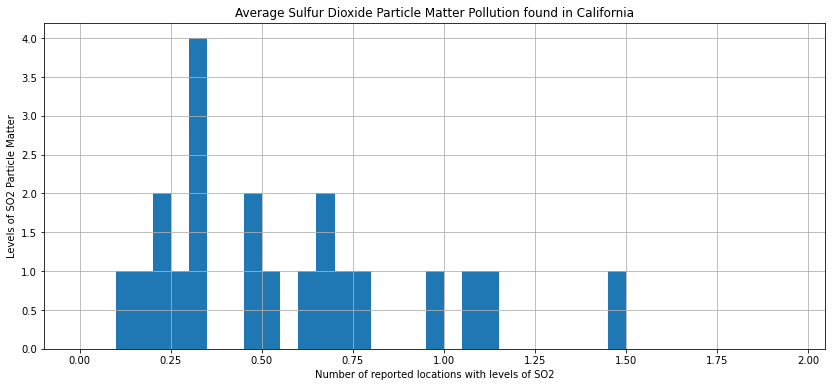

In [454]:
bin_values = np.arange(start=0, stop=2, step=.05)
plt.title('Average Sulfur Dioxide Particle Matter Pollution found in California')
plt.xlabel('Number of reported locations with levels of SO2')
plt.ylabel('Levels of SO2 Particle Matter')
CA_so2_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

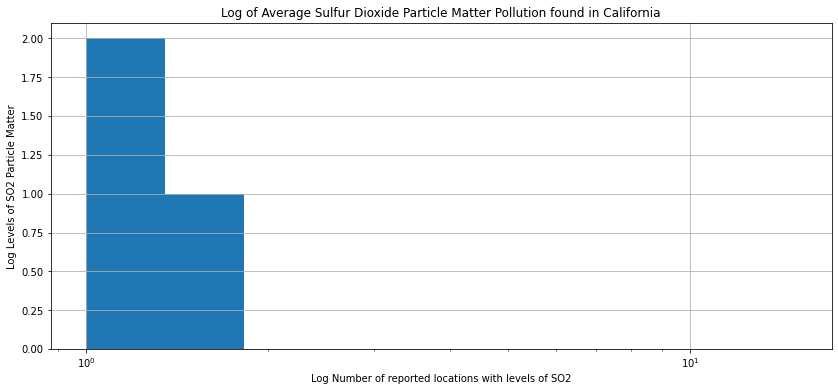

In [494]:
bin_values = np.logspace(np.log10(1), stop=np.log10(15), num=(10))
plt.title('Log of Average Sulfur Dioxide Particle Matter Pollution found in California')
plt.xlabel('Log Number of reported locations with levels of SO2')
plt.ylabel('Log Levels of SO2 Particle Matter')
plt.gca().set_xscale("log")
CA_so2_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])

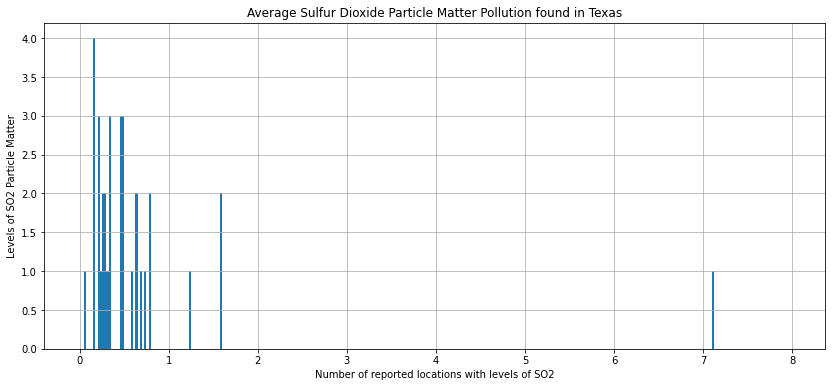

In [457]:
bin_values = np.arange(start=0, stop=8, step=.025)
plt.title('Average Sulfur Dioxide Particle Matter Pollution found in Texas')
plt.xlabel('Number of reported locations with levels of SO2')
plt.ylabel('Levels of SO2 Particle Matter')
TX_so2_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])
#plt.hist(x, bins=np.logspace(start=np.log10(10), stop=np.log10(15), num=10))
#plt.gca().set_xscale("log")

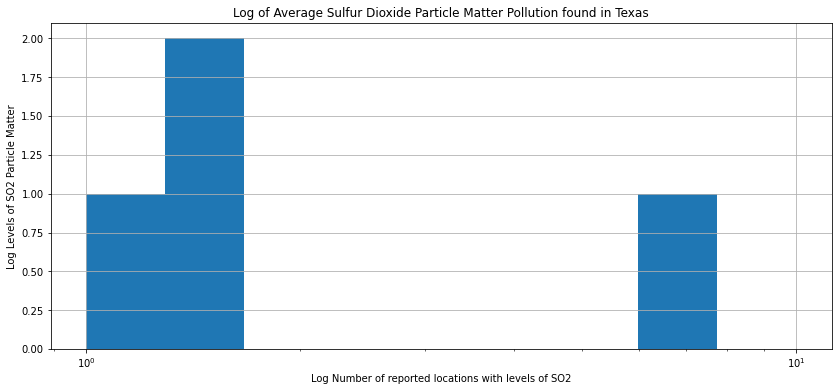

In [495]:
bin_values = np.logspace(np.log10(1), stop=np.log10(10), num=(10))
plt.title('Log of Average Sulfur Dioxide Particle Matter Pollution found in Texas')
plt.xlabel('Log Number of reported locations with levels of SO2')
plt.ylabel('Log Levels of SO2 Particle Matter')
plt.gca().set_xscale("log")
TX_so2_filter['arithmetic_mean'].hist(bins=bin_values, figsize=[14,6])


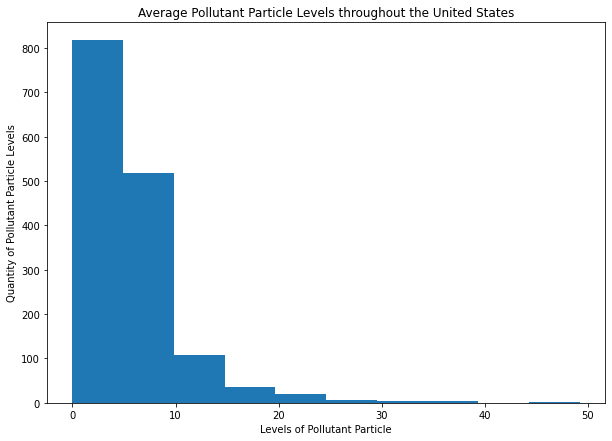

In [351]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(10, 7))

plt.xlabel('Levels of Pollutant Particle')
plt.ylabel('Quantity of Pollutant Particle Levels')
plt.hist(selected['arithmetic_mean'])
 
plt.title("Average Pollutant Particle Levels throughout the United States")
 
# show plot
plt.show() 

In [352]:
pm10 = pd.read_csv('pm10.csv')
co = pd.read_csv('co.csv')
lead = pd.read_csv('lead.csv')
lead_pm10 = pd.read_csv('lead_pm10.csv')
no2 = pd.read_csv('no2.csv')
o3 = pd.read_csv('o3.csv')
pm2 = pd.read_csv('pm2.csv')
so2 = pd.read_csv('so2.csv')

co_avg = co['avg'].mean()
lead_avg = lead['avg'].mean()
lead_pm10_avg = lead_pm10['avg'].mean()
no2_avg = no2['avg'].mean()
o3_avg = o3['avg'].mean()
pm2_avg = pm2['avg'].mean()
pm10_avg = pm10['avg'].mean()
so2_avg = so2['avg'].mean()

avg_df = pd.DataFrame(data=[co_avg, lead_avg, lead_pm10_avg, no2_avg, o3_avg, pm2_avg, pm10_avg, so2_avg]) 



#pm10_filter_NY = pm10[pm10.State == 'NY']
#co_filter_NY = co[co.State == 'NY']
#lead_filter_NY = lead[lead.State == 'NY']
#lead_pm10_filter_NY = lead_pm10[lead_pm10.State == 'NY']
#no2_filter_NY = no2[no2.State == 'NY']
#o3_filter_NY = o3[o3.State == 'NY']
#pm2_filter_NY = pm2[pm2.State == 'NY']
#so2_filter_NY = so2[so2.State == 'NY']


In [353]:
avg_df

0
0  220462.769648
1  154399.607613
2  243567.922386
3  207850.750594
4  164841.622737
5  143300.194771
6  174114.062067
7  137480.026797

In [354]:
df_co_avgs = pd.DataFrame(data=co, columns=['StateName', 'avg', 'arithmetic_mean']).dropna(axis=0, how='any')
df_co_avgs


StateName            avg  arithmetic_mean
0          TX  125003.208333         0.184685
2          AZ  191911.458333         0.382563
3          CA  512890.625000         0.440844
4          CA  512890.625000         0.440844
5          CA  512890.625000         0.440844
..        ...            ...              ...
312        TX   86766.708333         0.151505
313        MT  368158.875000         0.209467
314        CA  360149.833333         0.348335
315        DE  131471.854167         0.238400
316        AR  399372.272727         0.332388

[308 rows x 3 columns]

In [355]:
df_co_avgs_CA = df_co_avgs[df_co_avgs.StateName == 'CA']
df_co_avgs_CA

StateName            avg  arithmetic_mean
3          CA  512890.625000         0.440844
4          CA  512890.625000         0.440844
5          CA  512890.625000         0.440844
6          CA  147674.854167         0.306271
9          CA  697732.750000         0.359900
..        ...            ...              ...
270        CA  522272.479167         0.318200
282        CA  418653.041667         0.316369
293        CA  824964.250000         0.599410
311        CA  244681.520833         0.300000
314        CA  360149.833333         0.348335

[69 rows x 3 columns]

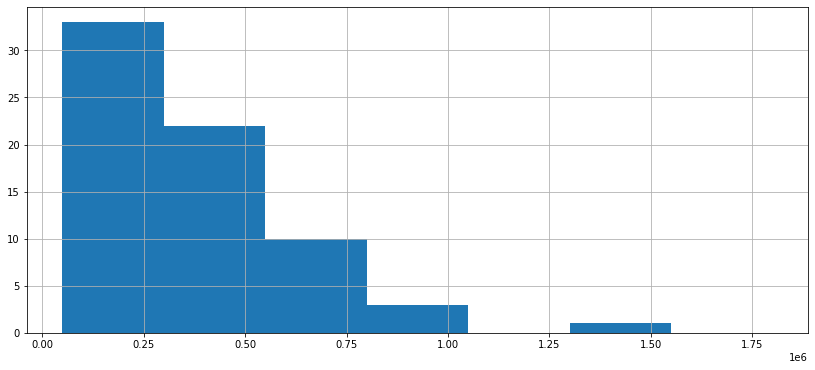

In [356]:
bin_values = np.arange(start=50000, stop=2000000, step=250000)
df_co_avgs_CA['avg'].hist(bins=bin_values, figsize=[14,6])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf537ff490>]],
      dtype=object)

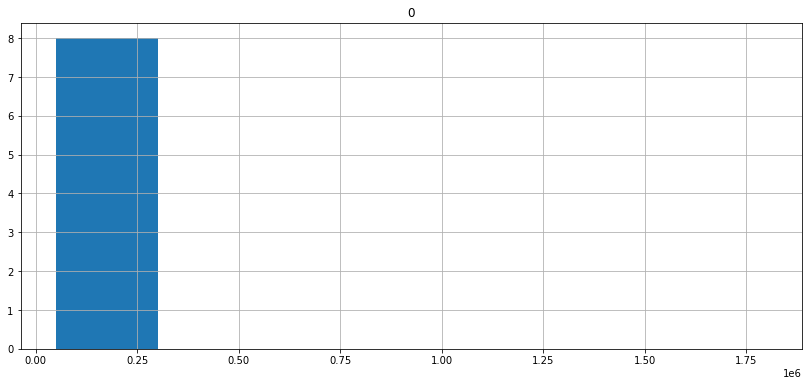

In [357]:
bin_values = np.arange(start=50000, stop=2000000, step=250000)
avg_df.hist(bins=bin_values, figsize=[14,6])

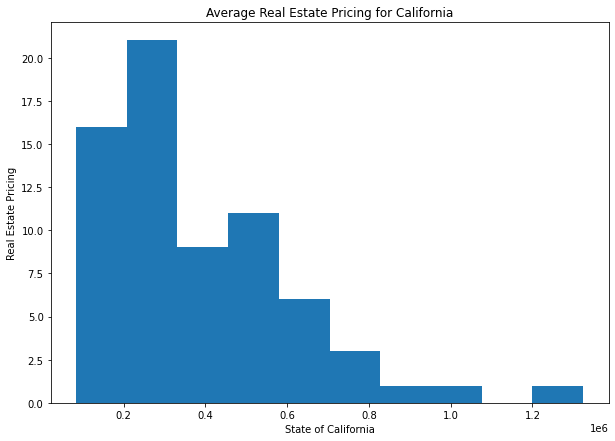

In [358]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(10, 7))

plt.xlabel('State of California')
plt.ylabel('Real Estate Pricing')
plt.hist(df_co_avgs_CA['avg'])
 
plt.title("Average Real Estate Pricing for California")
 
# show plot
plt.show() 

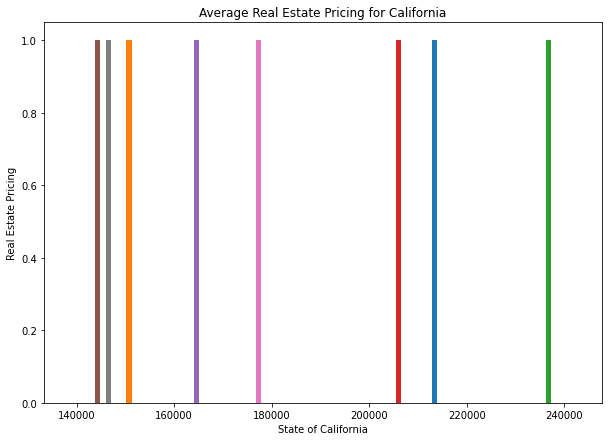

In [359]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(10, 7))

plt.xlabel('State of California')
plt.ylabel('Real Estate Pricing')
plt.hist(avg_df)
 
plt.title("Average Real Estate Pricing for California")
 
# show plot
plt.show() 

In [360]:
df_co_avgs_TX = df_co_avgs[df_co_avgs.StateName == 'TX']
df_co_avgs_TX

StateName            avg  arithmetic_mean
0          TX  125003.208333         0.184685
27         TX   83270.604167         0.046975
28         TX  187074.750000         0.355000
35         TX   73982.041667         0.271512
137        TX   98372.833333         0.285400
..        ...            ...              ...
262        TX   84419.104167         0.293406
264        TX  104746.812500         0.424075
265        TX   82027.666667         0.352869
266        TX   78007.395833         0.227135
312        TX   86766.708333         0.151505

[19 rows x 3 columns]

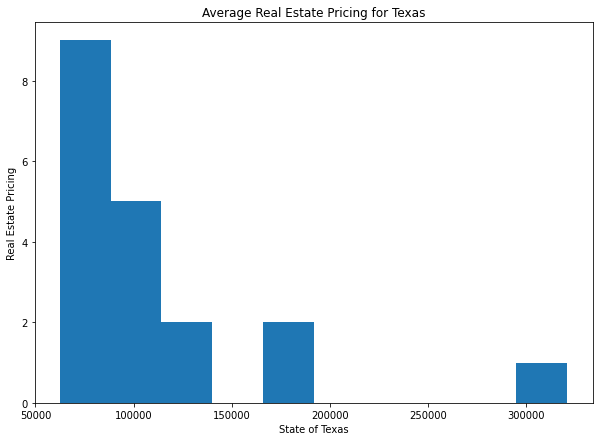

In [361]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(10, 7))

plt.xlabel('State of Texas')
plt.ylabel('Real Estate Pricing')
plt.hist(df_co_avgs_TX['avg'])
 
plt.title("Average Real Estate Pricing for Texas")
 
# show plot
plt.show() 

In [362]:
df_lead_avgs = pd.DataFrame(data=lead, columns=['StateName', 'avg', 'arithmetic_mean']).dropna(axis=0, how='any')
df_lead_avgs

StateName            avg  arithmetic_mean
0          TX  125003.208333         0.002665
1          IL   80588.645833         0.016395
2          KY  106750.478261         0.037971
3          DC  642007.416667         0.003675
4          IL   73356.270833         0.009830
..        ...            ...              ...
175        PA  106648.520833         0.010069
176        PA  106648.520833         0.010069
177        MN  194415.520833         0.001230
179        PA   53679.771429         0.007430
180        PA   53679.771429         0.007430

[178 rows x 3 columns]

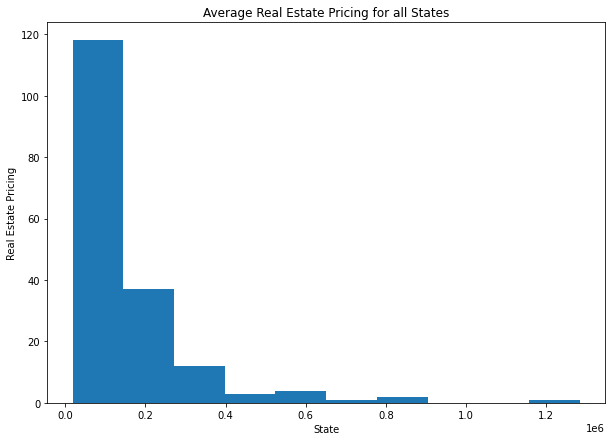

In [363]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(10, 7))

plt.xlabel('State')
plt.ylabel('Real Estate Pricing')
plt.hist(df_lead_avgs['avg'])
 
plt.title("Average Real Estate Pricing for all States")
 
# show plot
plt.show() 

In [364]:
df_lead_pm10_avgs = pd.DataFrame(data=lead_pm10, columns=['StateName', 'avg', 'arithmetic_mean']).dropna(axis=0, how='any')
df_lead_pm10_avgs

StateName            avg  arithmetic_mean
0         NC   86306.479167         0.001540
1         NC   86306.479167         0.001540
2         CA  705877.645833         0.002633
3         OR  330333.145833         0.001726
4         OR  330333.145833         0.001726
..       ...            ...              ...
15        OH  125523.729167         0.003056
16        DE   64764.208333         0.002363
17        MS  119692.916667         0.002610
18        AL   18831.133333         0.013155
19        AR  399372.272727         0.001368

[20 rows x 3 columns]

In [365]:
df_no2_avgs = pd.DataFrame(data=no2, columns=['StateName', 'avg', 'arithmetic_mean']).dropna(axis=0, how='any')
df_no2_avgs

StateName           avg  arithmetic_mean
0          OK  1.043018e+05        13.716856
1          OK  1.043018e+05        13.716856
2          TX  1.606568e+05        10.530550
3          TX  8.717067e+04        19.992084
5          CA  3.787093e+05        40.136913
..        ...           ...              ...
442        FL  1.347562e+06        10.056705
443        KS  1.136296e+05         8.347570
444        KS  1.136296e+05         8.347570
445        KY  4.782877e+04        13.188090
446        KY  4.782877e+04        13.188090

[422 rows x 3 columns]

In [366]:
df_o3_avgs = pd.DataFrame(data=o3, columns=['StateName', 'avg', 'arithmetic_mean']).dropna(axis=0, how='any')
df_o3_avgs

StateName            avg  arithmetic_mean
0           TX   92962.145833         0.031580
1           OK  104301.770833         0.033550
2           OK  104301.770833         0.033550
3           TX  160656.791667         0.025868
4           GA  149045.708333         0.028410
...        ...            ...              ...
1241        KY  102220.191489         0.028000
1242        IN   64025.250000         0.032615
1248        NY  149442.583333         0.027570
1251        KY   47828.770833         0.028010
1252        KY   47828.770833         0.028010

[1169 rows x 3 columns]

In [367]:
df_pm10_avgs = pd.DataFrame(data=pm10, columns=['StateName', 'avg', 'arithmetic_mean']).dropna(axis=0, how='any')
df_pm10_avgs

StateName           avg  arithmetic_mean
0          NY  1.043367e+06        16.120538
1          TX  9.296215e+04        19.853644
2          TX  1.250032e+05        22.678272
3          TX  2.203650e+05        16.515050
4          TX  2.203650e+05        16.515050
..        ...           ...              ...
421        NE  1.294235e+05        18.794256
422        NM  4.709964e+04        16.779750
425        CO  2.997276e+05        14.943082
426        KY  4.782877e+04        20.886208
427        KY  4.782877e+04        20.886208

[403 rows x 3 columns]

In [368]:
df_pm2_avgs = pd.DataFrame(data=pm2, columns=['StateName', 'avg', 'arithmetic_mean']).dropna(axis=0, how='any')
df_pm2_avgs

StateName           avg  arithmetic_mean
0          NY  1.043367e+06         9.485205
1          IL  3.455267e+05        10.569070
2          NY  1.937232e+06        10.001032
3          GA  1.490457e+05         8.595245
4          FL  1.249307e+05         5.379569
..        ...           ...              ...
813        KY  1.022202e+05         8.263222
814        OH  5.485300e+04         7.015361
815        OH  5.485300e+04         7.015361
817        KY  4.782877e+04         8.162700
818        KY  4.782877e+04         8.162700

[782 rows x 3 columns]

In [369]:
df_so2_avgs = pd.DataFrame(data=so2, columns=['StateName', 'avg', 'arithmetic_mean']).dropna(axis=0, how='any')
df_so2_avgs

StateName            avg  arithmetic_mean
1          FL   78722.645833         0.530535
2          DC  642007.416667         0.988195
3          CA  265394.104167         0.303305
4          FL  135197.229167         0.321473
5          VA  102140.375000         0.378820
..        ...            ...              ...
469        OH   43956.125000         1.121006
470        OH   43956.125000         1.121006
471        IL  137970.958333         0.745136
474        KY   47828.770833         0.237405
475        KY   47828.770833         0.237405

[446 rows x 3 columns]

In [370]:
file3 = df_co_avgs.merge(df_lead_avgs, on="avg", how="outer")
file4 = file3.merge(df_lead_pm10_avgs, on="avg", how="outer")
file5 = file4.merge(df_no2_avgs, on="avg", how="outer")
file6 = file5.merge(df_o3_avgs, on="avg", how="outer")
file7 = file6.merge(df_pm10_avgs, on="avg", how="outer")
file8 = file7.merge(df_pm2_avgs, on="avg", how="outer")
file9 = file8.merge(df_so2_avgs, on="avg", how="outer")

file9.to_excel("merged_pollutant_data.xlsx")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'StateName_x', 'arithmetic_mean_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


In [371]:
merged_pollutant_data = pd.read_excel('merged_pollutant_data.xlsx')

In [372]:
merged_pollutant_data.head()

Unnamed: 0 StateName_x            avg  arithmetic_mean_x StateName_y  \
0           0          TX  125003.208333           0.184685          TX   
1           1          AZ  191911.458333           0.382563         NaN   
2           2          CA  512890.625000           0.440844         NaN   
3           3          CA  512890.625000           0.440844         NaN   
4           4          CA  512890.625000           0.440844         NaN   

   arithmetic_mean_y StateName_x.1  arithmetic_mean_x.1 StateName_y.1  \
0           0.002665           NaN                  NaN           NaN   
1                NaN           NaN                  NaN           NaN   
2                NaN           NaN                  NaN            CA   
3                NaN           NaN                  NaN            CA   
4                NaN           NaN                  NaN            CA   

   arithmetic_mean_y.1 StateName_x.2  arithmetic_mean_x.2 StateName_y.2  \
0                  NaN           NaN                  NaN            TX   
1                  NaN            AZ             0.028080           NaN   
2              15.8801            CA             0.022712            CA   
3              15.8801            CA             0.022712            CA   
4              15.8801            CA             0.022712            CA   

   arithmetic_mean_y.2 StateName_x.3  arithmetic_mean_x.3 StateName_y.3  \
0            22.678272           NaN                  NaN           NaN   
1                  NaN           NaN                  NaN           NaN   
2            15.806104           NaN                  NaN           NaN   
3            15.806104           NaN                  NaN           NaN   
4            15.806104           NaN                  NaN           NaN   

   arithmetic_mean_y.3  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

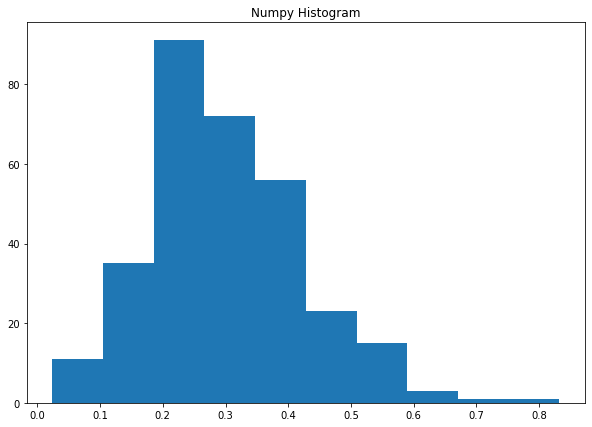

In [373]:
import matplotlib.pyplot as plt
import numpy as np
a = df_co_avgs['arithmetic_mean']
fig = plt.figure(figsize =(10, 7))
plt.xlabel('')
plt.hist(a)
 
plt.title("Numpy Histogram")
 
# show plot
plt.show()
#x = np.histogram(df_co_avgs['avg'])

#plt.hist(x)
plt.show() 

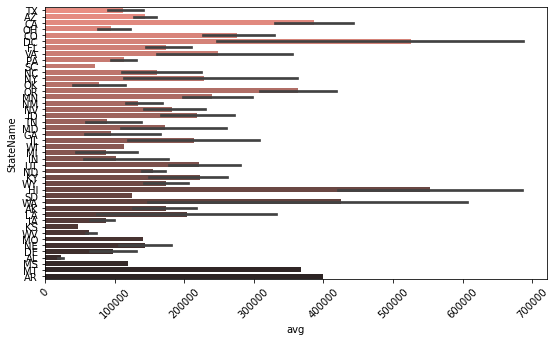

In [374]:
plt.xticks(rotation=45)
sns.barplot(x=df_co_avgs['avg'], y= df_co_avgs['StateName'], data=df_co_avgs, palette='dark:salmon_r')

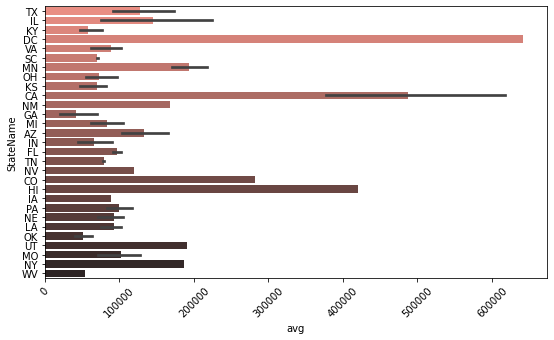

In [375]:
plt.xticks(rotation=45)
sns.barplot(x=df_lead_avgs['avg'], y= df_lead_avgs['StateName'], data=df_lead_avgs, palette='dark:salmon_r')

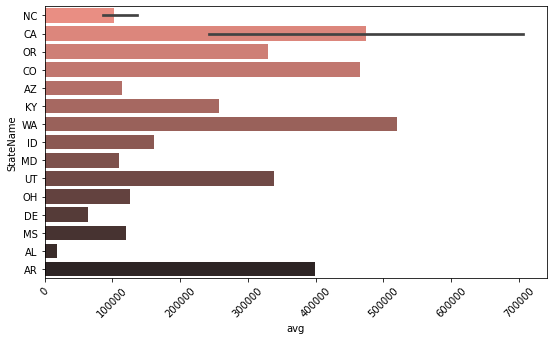

In [376]:
plt.xticks(rotation=45)
sns.barplot(x=df_lead_pm10_avgs['avg'], y= df_lead_pm10_avgs['StateName'], data=df_lead_pm10_avgs, palette='dark:salmon_r')

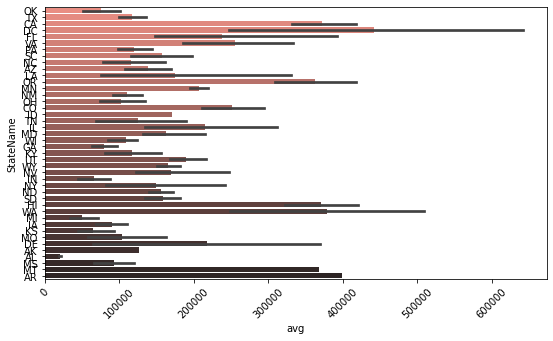

In [377]:
plt.xticks(rotation=45)
sns.barplot(x=df_no2_avgs['avg'], y= df_no2_avgs['StateName'], data=df_no2_avgs, palette='dark:salmon_r')

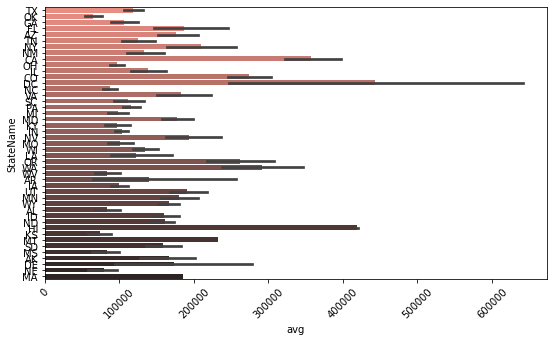

In [378]:
plt.xticks(rotation=45)
sns.barplot(x=df_o3_avgs['avg'], y= df_o3_avgs['StateName'], data=df_o3_avgs, palette='dark:salmon_r')

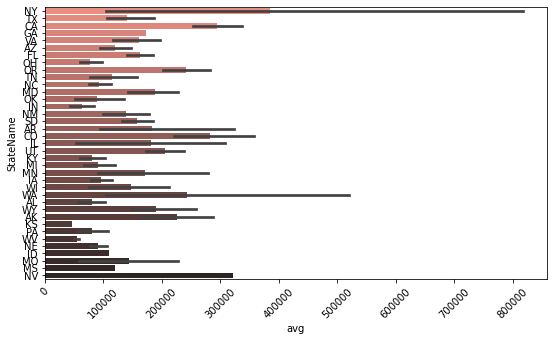

In [379]:
plt.xticks(rotation=45)
sns.barplot(x=df_pm10_avgs['avg'], y= df_pm10_avgs['StateName'], data=df_pm10_avgs, palette='dark:salmon_r')

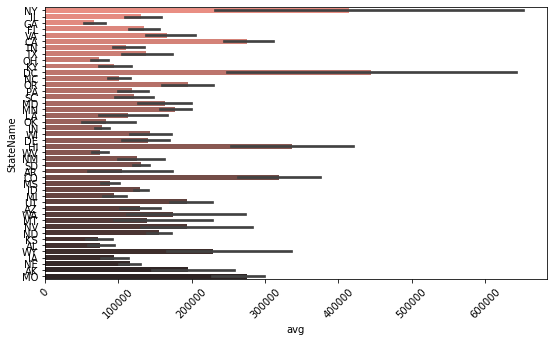

In [380]:
plt.xticks(rotation=45)
sns.barplot(x=df_pm2_avgs['avg'], y= df_pm2_avgs['StateName'], data=df_pm2_avgs, palette='dark:salmon_r')

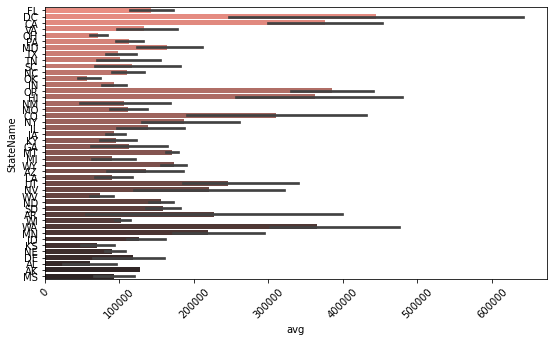

In [381]:
plt.xticks(rotation=45)
sns.barplot(x=df_so2_avgs['avg'], y= df_so2_avgs['StateName'], data=df_so2_avgs, palette='dark:salmon_r')

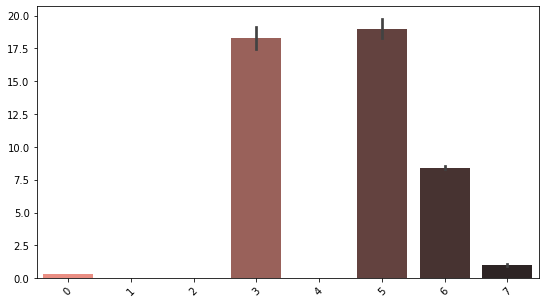

In [382]:
plt.xticks(rotation=45)
sns.barplot(data=[df_co_avgs['arithmetic_mean'], df_lead_avgs['arithmetic_mean'], df_lead_pm10_avgs['arithmetic_mean'], df_no2_avgs['arithmetic_mean'], df_o3_avgs['arithmetic_mean'], df_pm10_avgs['arithmetic_mean'], df_pm2_avgs['arithmetic_mean'], df_so2_avgs['arithmetic_mean']], units=['CO', 'Lead', 'Lead-PM10', 'NO2', 'O3', 'PM10', 'PM2', 'SO2'], palette='dark:salmon_r')

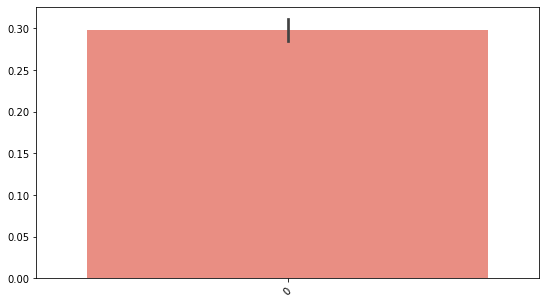

In [383]:
plt.xticks(rotation=45)
sns.barplot(data=df_co_avgs['arithmetic_mean'], palette='dark:salmon_r')

In [384]:
import plotly.express as px
fig = px.choropleth(co,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='arithmetic_mean',
                    color_continuous_scale="algae", 
                    
                    )
fig.update_layout(
      title_text = 'Levels of Pollutant Particle CO in the Atmosphere by State (USA) from years 2015-2018',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [385]:
import plotly.express as px
fig = px.choropleth(lead,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='arithmetic_mean',
                    color_continuous_scale="algae", 
                    
                    )
fig.update_layout(
      title_text = 'Levels of Pollutant Particle Lead in the Atmosphere by State (USA) from years 2015-2018',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [386]:
import plotly.express as px
fig = px.choropleth(lead_pm10,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='arithmetic_mean',
                    color_continuous_scale="algae", 
                    
                    )
fig.update_layout(
      title_text = 'Levels of Pollutant Particle Lead-PM10 in the Atmosphere by State (USA) from years 2015-2018',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [387]:
import plotly.express as px
fig = px.choropleth(no2,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='arithmetic_mean',
                    color_continuous_scale="algae", 
                    
                    )
fig.update_layout(
      title_text = 'Levels of Pollutant Particle NO2 in the Atmosphere by State (USA) from years 2015-2018',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [388]:
import plotly.express as px
fig = px.choropleth(o3,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='arithmetic_mean',
                    color_continuous_scale="algae", 
                    
                    )
fig.update_layout(
      title_text = 'Levels of Pollutant Particle O3 in the Atmosphere by State (USA) from years 2015-2018',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [389]:
import plotly.express as px
fig = px.choropleth(pm10,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='arithmetic_mean',
                    color_continuous_scale="algae", 
                    
                    )
fig.update_layout(
      title_text = 'Levels of Pollutant Particle PM10 in the Atmosphere by State (USA) from years 2015-2018',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [390]:
import plotly.express as px
fig = px.choropleth(pm2,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='arithmetic_mean',
                    color_continuous_scale="algae", 
                    
                    )
fig.update_layout(
      title_text = 'Levels of Pollutant Particle PM2 in the Atmosphere by State (USA) from years 2015-2018',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [391]:
import plotly.express as px
fig = px.choropleth(so2,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='arithmetic_mean',
                    color_continuous_scale="algae", 
                    
                    )
fig.update_layout(
      title_text = 'Levels of Pollutant Particle SO2 in the Atmosphere by State (USA) from years 2015-2018',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [392]:
import altair as alt
from vega_datasets import data

source = nyc_filtered_1

alt.Chart(source).mark_point().encode(
    x='RegionName:N',
    y='2022-03-31:N'
)

alt.Chart(...)

In [393]:
import altair as alt
from vega_datasets import data

source = la_filtered_1

alt.Chart(source).mark_point().encode(
    x='RegionName:N',
    y='2022-03-31:N'
)

alt.Chart(...)

In [394]:
import altair as alt
from vega_datasets import data

source = seattle_filtered_1

alt.Chart(source).mark_point().encode(
    x='RegionName:N',
    y='2022-03-31:N'
)

alt.Chart(...)

In [395]:
la_filtered_1 = pd.DataFrame(la_filtered, columns=['RegionName', '2022-03-31'])
la_filtered_1

RegionName  2022-03-31
43          90046   1206023.0
98          90034   1279533.0
113         90044    600029.0
133         90026   1058360.0
170         90066   1413010.0
...           ...         ...
9945        90077   1548805.0
12008       90010    949425.0
12965       90067   1389014.0
14559       90021    992109.0
15485       90058    501530.0

[100 rows x 2 columns]

In [396]:
nyc_filtered_1 = pd.DataFrame(nyc_filtered, columns=['RegionName', '2022-03-31'])
nyc_filtered_1

RegionName  2022-03-31
0           10025   1251809.0
2           10023   1802823.0
6           10002   1097168.0
10          11226    704115.0
11          10467    283414.0
...           ...         ...
11331       10282   1882024.0
11442       11363    695548.0
11450       10006   1998041.0
12126       10004   1535203.0
12836       10464    505830.0

[165 rows x 2 columns]

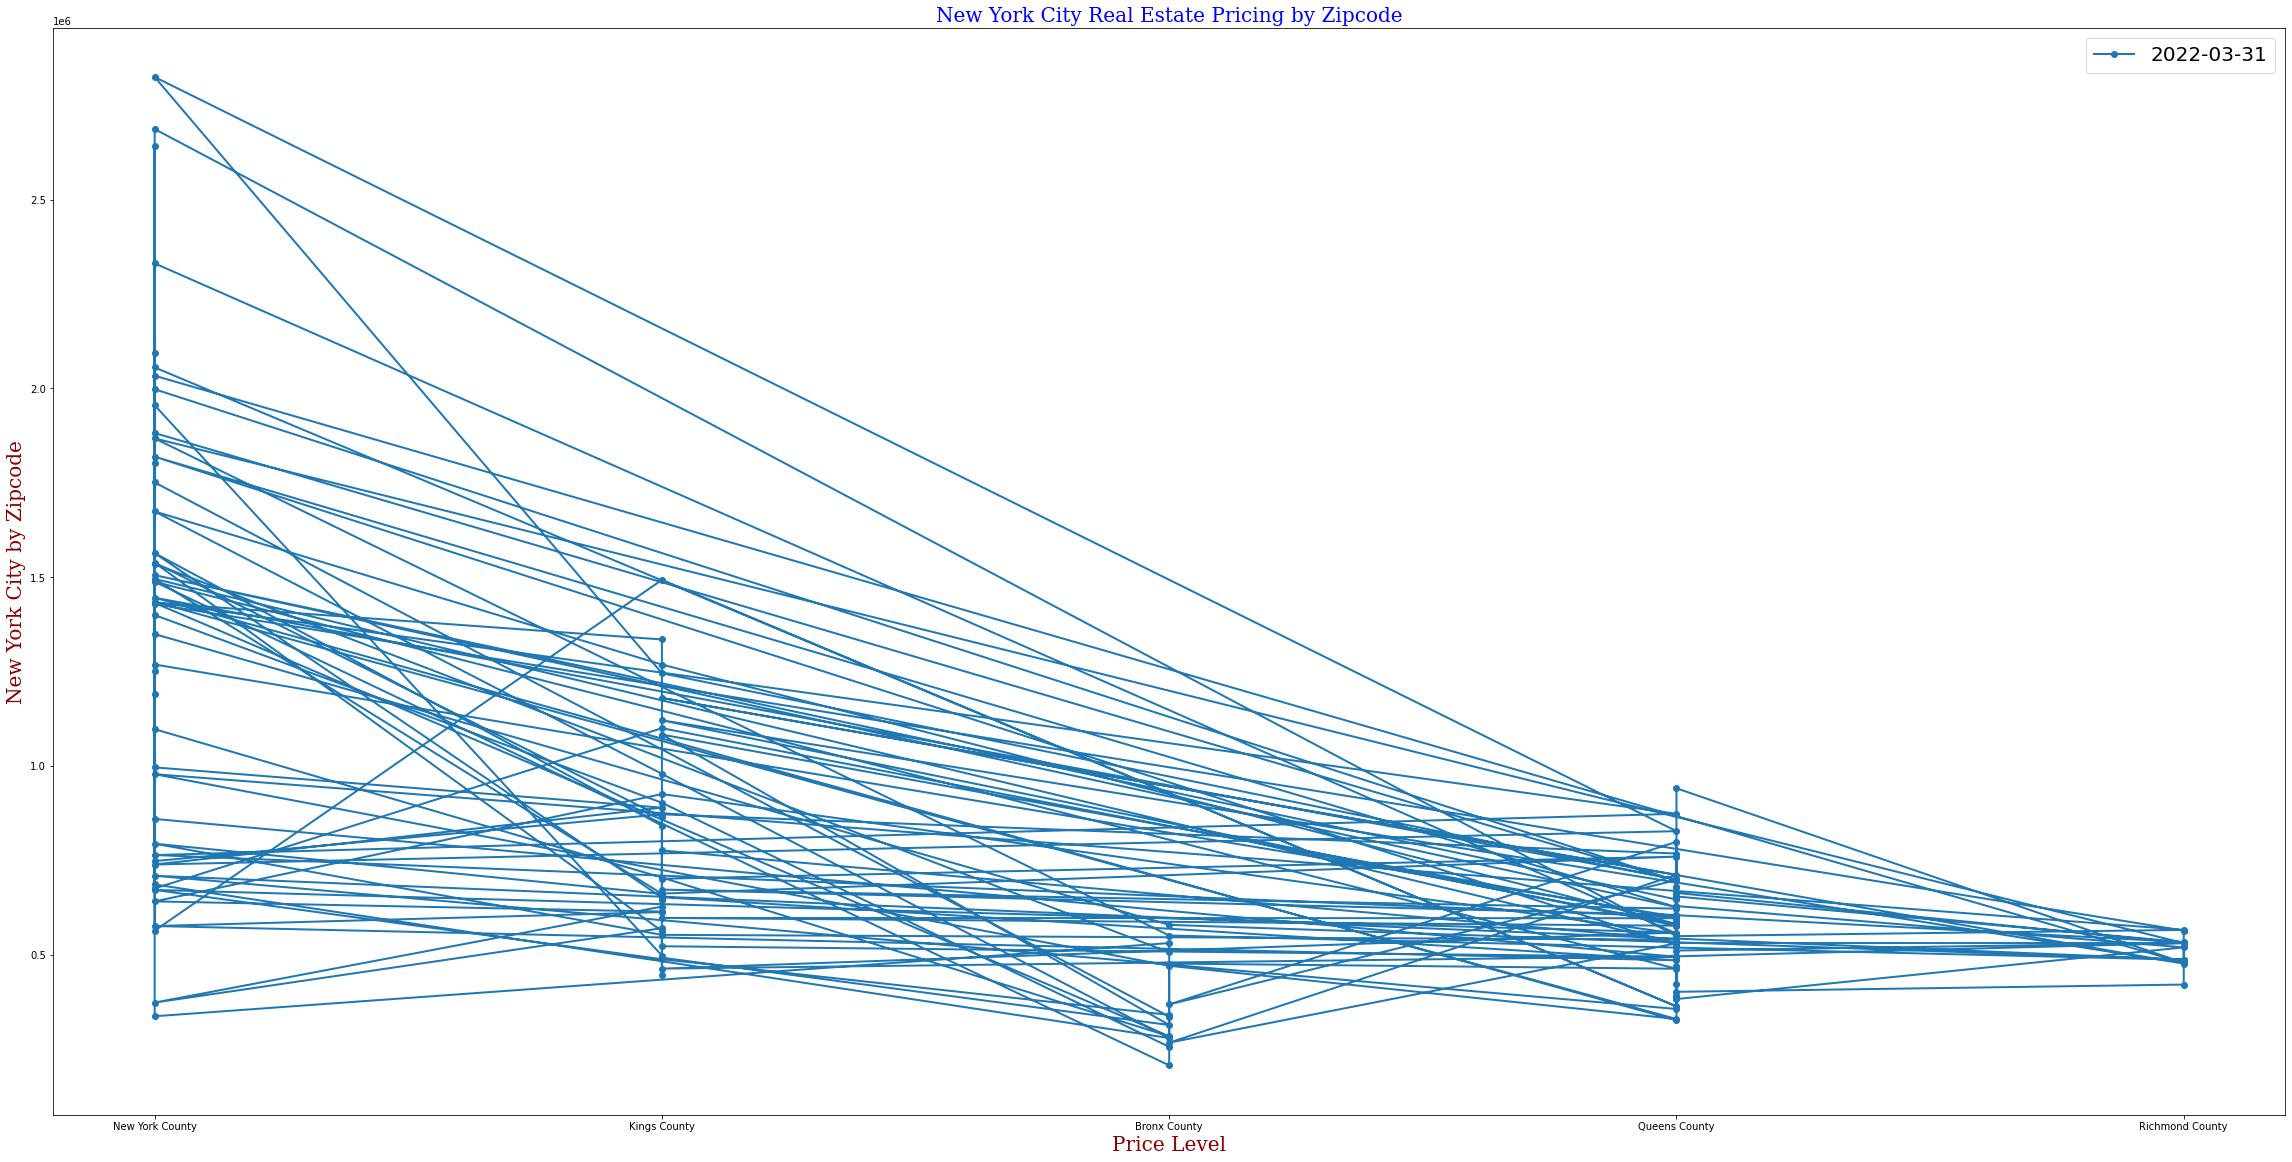

In [397]:
df = nyc_filtered

import matplotlib.pyplot as plt

# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[40, 20])

ax.plot(nyc_filtered['CountyName'],
        nyc_filtered['2022-03-31'],
         marker='o', linewidth=2, label='2022-03-31')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':20}
plt.xticks()
plt.title('New York City Real Estate Pricing by Zipcode', fontdict=font1)
ax.set_xlabel('Price Level', fontdict = font2)
ax.set_ylabel('New York City by Zipcode', fontdict = font2)
plt.legend(fontsize=20)
plt.show()

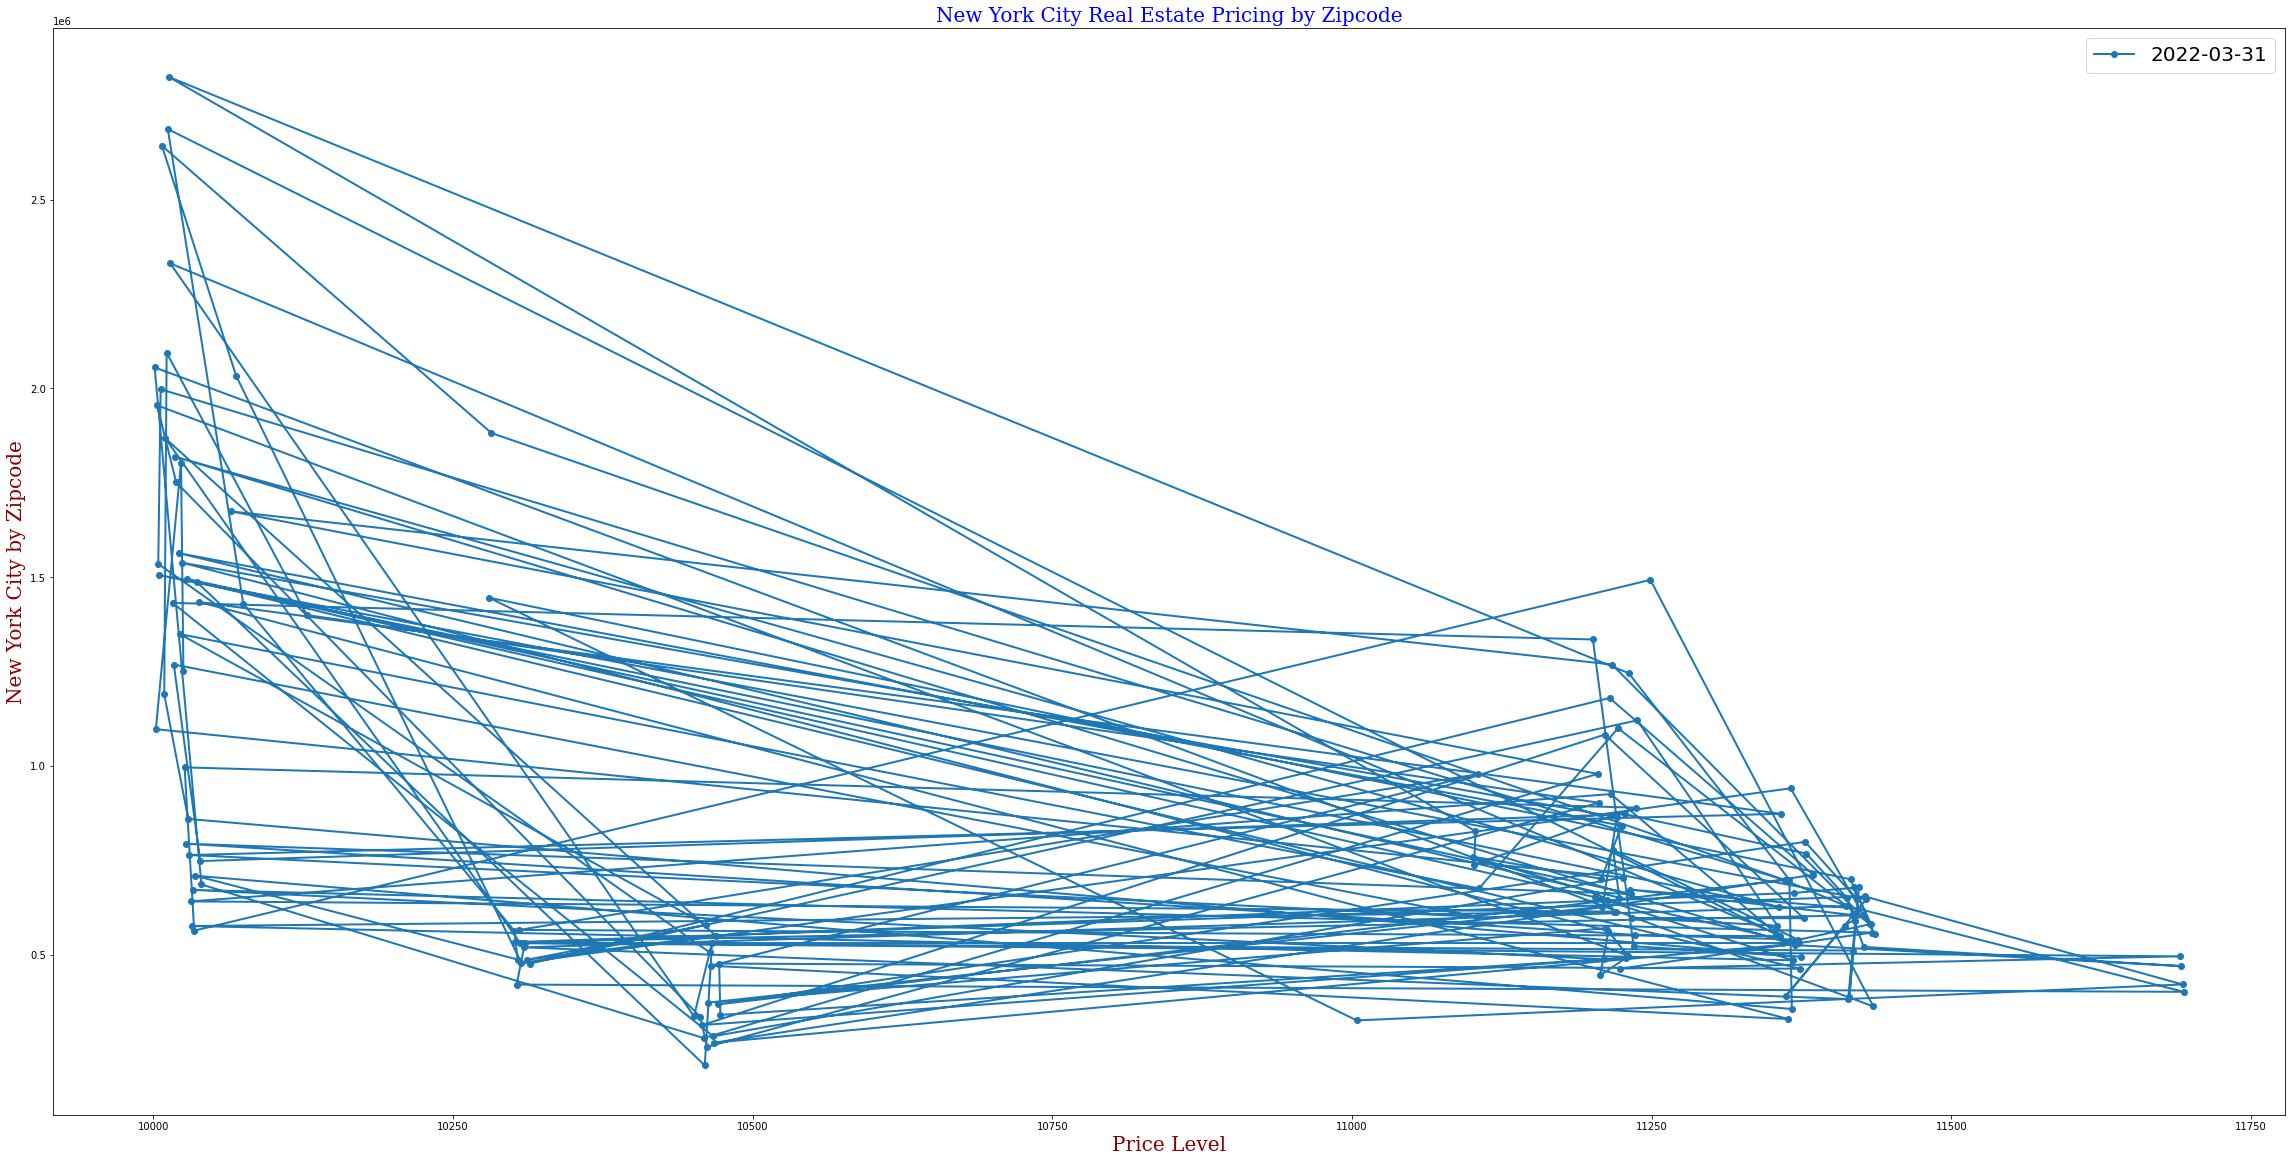

In [398]:
df = nyc_filtered

import matplotlib.pyplot as plt

# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[40, 20])

ax.plot(nyc_filtered['RegionName'],
        nyc_filtered['2022-03-31'],
         marker='o', linewidth=2, label='2022-03-31')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':20}
plt.xticks()
plt.title('New York City Real Estate Pricing by Zipcode', fontdict=font1)
ax.set_xlabel('Price Level', fontdict = font2)
ax.set_ylabel('New York City by Zipcode', fontdict = font2)
plt.legend(fontsize=20)
plt.show()

In [399]:
date_column_list_2000 = [data1['2000-01-31'], data1['2000-02-29'], data1['2000-03-31'], data1['2000-04-30'], data1['2000-05-31'], data1['2000-06-30'], data1['2000-07-31'], data1['2000-08-31'], data1['2000-09-30'], data1['2000-10-31'], data1['2000-11-30'], data1['2000-12-31']]
date_column_list_2001 = [data1['2001-01-31'], data1['2001-02-28'], data1['2001-03-31'], data1['2001-04-30'], data1['2001-05-31'], data1['2001-06-30'], data1['2001-07-31'], data1['2001-08-31'], data1['2001-09-30'], data1['2001-10-31'], data1['2001-11-30'], data1['2001-12-31']]
date_column_list_2002 = [data1['2002-01-31'], data1['2002-02-28'], data1['2002-03-31'], data1['2002-04-30'], data1['2002-05-31'], data1['2002-06-30'], data1['2002-07-31'], data1['2002-08-31'], data1['2002-09-30'], data1['2002-10-31'], data1['2002-11-30'], data1['2002-12-31']]
date_column_list_2003 = [data1['2003-01-31'], data1['2003-02-28'], data1['2003-03-31'], data1['2003-04-30'], data1['2003-05-31'], data1['2003-06-30'], data1['2003-07-31'], data1['2003-08-31'], data1['2003-09-30'], data1['2003-10-31'], data1['2003-11-30'], data1['2003-12-31']]
date_column_list_2004 = [data1['2004-01-31'], data1['2004-02-29'], data1['2004-03-31'], data1['2004-04-30'], data1['2004-05-31'], data1['2004-06-30'], data1['2004-07-31'], data1['2004-08-31'], data1['2004-09-30'], data1['2004-10-31'], data1['2004-11-30'], data1['2004-12-31']]
date_column_list_2005 = [data1['2005-01-31'], data1['2005-02-28'], data1['2005-03-31'], data1['2005-04-30'], data1['2005-05-31'], data1['2005-06-30'], data1['2005-07-31'], data1['2005-08-31'], data1['2005-09-30'], data1['2005-10-31'], data1['2005-11-30'], data1['2005-12-31']]
date_column_list_2006 = [data1['2006-01-31'], data1['2006-02-28'], data1['2006-03-31'], data1['2006-04-30'], data1['2006-05-31'], data1['2006-06-30'], data1['2006-07-31'], data1['2006-08-31'], data1['2006-09-30'], data1['2006-10-31'], data1['2006-11-30'], data1['2006-12-31']]
date_column_list_2007 = [data1['2007-01-31'], data1['2007-02-28'], data1['2007-03-31'], data1['2007-04-30'], data1['2007-05-31'], data1['2007-06-30'], data1['2007-07-31'], data1['2007-08-31'], data1['2007-09-30'], data1['2007-10-31'], data1['2007-11-30'], data1['2007-12-31']]
date_column_list_2008 = [data1['2008-01-31'], data1['2008-02-29'], data1['2008-03-31'], data1['2008-04-30'], data1['2008-05-31'], data1['2008-06-30'], data1['2008-07-31'], data1['2008-08-31'], data1['2008-09-30'], data1['2008-10-31'], data1['2008-11-30'], data1['2008-12-31']]
date_column_list_2009 = [data1['2009-01-31'], data1['2009-02-28'], data1['2009-03-31'], data1['2009-04-30'], data1['2009-05-31'], data1['2009-06-30'], data1['2009-07-31'], data1['2009-08-31'], data1['2009-09-30'], data1['2009-10-31'], data1['2009-11-30'], data1['2009-12-31']]
date_column_list_2010 = [data1['2010-01-31'], data1['2010-02-28'], data1['2010-03-31'], data1['2010-04-30'], data1['2010-05-31'], data1['2010-06-30'], data1['2010-07-31'], data1['2010-08-31'], data1['2010-09-30'], data1['2010-10-31'], data1['2010-11-30'], data1['2010-12-31']]
date_column_list_2011 = [data1['2011-01-31'], data1['2011-02-28'], data1['2011-03-31'], data1['2011-04-30'], data1['2011-05-31'], data1['2011-06-30'], data1['2011-07-31'], data1['2011-08-31'], data1['2011-09-30'], data1['2011-10-31'], data1['2011-11-30'], data1['2011-12-31']]
date_column_list_2012 = [data1['2012-01-31'], data1['2012-02-29'], data1['2012-03-31'], data1['2012-04-30'], data1['2012-05-31'], data1['2012-06-30'], data1['2012-07-31'], data1['2012-08-31'], data1['2012-09-30'], data1['2012-10-31'], data1['2012-11-30'], data1['2012-12-31']]
date_column_list_2013 = [data1['2013-01-31'], data1['2013-02-28'], data1['2013-03-31'], data1['2013-04-30'], data1['2013-05-31'], data1['2013-06-30'], data1['2013-07-31'], data1['2013-08-31'], data1['2013-09-30'], data1['2013-10-31'], data1['2013-11-30'], data1['2013-12-31']]
date_column_list_2014 = [data1['2014-01-31'], data1['2014-02-28'], data1['2014-03-31'], data1['2014-04-30'], data1['2014-05-31'], data1['2014-06-30'], data1['2014-07-31'], data1['2014-08-31'], data1['2014-09-30'], data1['2014-10-31'], data1['2014-11-30'], data1['2014-12-31']]
date_column_list_2015 = [data1['2015-01-31'], data1['2015-02-28'], data1['2015-03-31'], data1['2015-04-30'], data1['2015-05-31'], data1['2015-06-30'], data1['2015-07-31'], data1['2015-08-31'], data1['2015-09-30'], data1['2015-10-31'], data1['2015-11-30'], data1['2015-12-31']]
date_column_list_2016 = [data1['2016-01-31'], data1['2016-02-29'], data1['2016-03-31'], data1['2016-04-30'], data1['2016-05-31'], data1['2016-06-30'], data1['2016-07-31'], data1['2016-08-31'], data1['2016-09-30'], data1['2016-10-31'], data1['2016-11-30'], data1['2016-12-31']]
date_column_list_2017 = [data1['2017-01-31'], data1['2017-02-28'], data1['2017-03-31'], data1['2017-04-30'], data1['2017-05-31'], data1['2017-06-30'], data1['2017-07-31'], data1['2017-08-31'], data1['2017-09-30'], data1['2017-10-31'], data1['2017-11-30'], data1['2017-12-31']]
date_column_list_2018 = [data1['2018-01-31'], data1['2018-02-28'], data1['2018-03-31'], data1['2018-04-30'], data1['2018-05-31'], data1['2018-06-30'], data1['2018-07-31'], data1['2018-08-31'], data1['2018-09-30'], data1['2018-10-31'], data1['2018-11-30'], data1['2018-12-31']]
date_column_list_2019 = [data1['2019-01-31'], data1['2019-02-28'], data1['2019-03-31'], data1['2019-04-30'], data1['2019-05-31'], data1['2019-06-30'], data1['2019-07-31'], data1['2019-08-31'], data1['2019-09-30'], data1['2019-10-31'], data1['2019-11-30'], data1['2019-12-31']]
date_column_list_2020 = [data1['2020-01-31'], data1['2020-02-29'], data1['2020-03-31'], data1['2020-04-30'], data1['2020-05-31'], data1['2020-06-30'], data1['2020-07-31'], data1['2020-08-31'], data1['2020-09-30'], data1['2020-10-31'], data1['2020-11-30'], data1['2020-12-31']]
date_column_list_2021 = [data1['2021-01-31'], data1['2021-02-28'], data1['2021-03-31'], data1['2021-04-30'], data1['2021-05-31'], data1['2021-06-30'], data1['2021-07-31'], data1['2021-08-31'], data1['2021-09-30'], data1['2021-10-31'], data1['2021-11-30'], data1['2021-12-31']]
date_column_list_2022 = [data1['2022-01-31'], data1['2022-02-28'], data1['2022-03-31']]
date_column_lists = [date_column_list_2000, date_column_list_2001, date_column_list_2002, date_column_list_2003, date_column_list_2004, date_column_list_2005, date_column_list_2006, date_column_list_2007, date_column_list_2008, date_column_list_2009, date_column_list_2010, date_column_list_2011, date_column_list_2012, date_column_list_2013, date_column_list_2014, date_column_list_2015, date_column_list_2016, date_column_list_2017, date_column_list_2018, date_column_list_2019, date_column_list_2020, date_column_list_2021, date_column_list_2022]

In [400]:
nyc_filtered_sorted_by_zip = nyc_filtered.sort_values(by='RegionName')
nyc_filtered_sorted_by_zip

RegionID  SizeRank  RegionName RegionType StateName State      City  \
1567      61615      1588       10001        Zip        NY    NY  New York   
6         61616         6       10002        Zip        NY    NY  New York   
54        61617        55       10003        Zip        NY    NY  New York   
12126     61618     12821       10004        Zip        NY    NY  New York   
7550      61619      7711       10005        Zip        NY    NY  New York   
...         ...       ...         ...        ...       ...   ...       ...   
9049      62122      9306       11436        Zip        NY    NY  New York   
935       62179       947       11691        Zip        NY    NY  New York   
6961      62180      7098       11692        Zip        NY    NY  New York   
8591      62181      8812       11693        Zip        NY    NY  New York   
6410      62182      6529       11694        Zip        NY    NY  New York   

                             Metro       CountyName  2000-01-31  ...  \
1567   New York-Newark-Jersey City  New York County    698692.0  ...   
6      New York-Newark-Jersey City  New York County         0.0  ...   
54     New York-Newark-Jersey City  New York County    533140.0  ...   
12126  New York-Newark-Jersey City  New York County         0.0  ...   
7550   New York-Newark-Jersey City  New York County         0.0  ...   
...                            ...              ...         ...  ...   
9049   New York-Newark-Jersey City    Queens County    246774.0  ...   
935    New York-Newark-Jersey City    Queens County         0.0  ...   
6961   New York-Newark-Jersey City    Queens County         0.0  ...   
8591   New York-Newark-Jersey City    Queens County         0.0  ...   
6410   New York-Newark-Jersey City    Queens County         0.0  ...   

       2021-06-30  2021-07-31  2021-08-31  2021-09-30  2021-10-31  2021-11-30  \
1567    1961402.0   1977746.0   1984349.0   2000464.0   2010703.0   2033368.0   
6       1063138.0   1069753.0   1071217.0   1074743.0   1086919.0   1100402.0   
54      1816977.0   1842310.0   1858657.0   1883003.0   1896750.0   1912540.0   
12126   1483649.0   1508171.0   1522957.0   1524508.0   1534555.0   1545560.0   
7550    1417174.0   1417320.0   1425062.0   1435642.0   1448368.0   1456131.0   
...           ...         ...         ...         ...         ...         ...   
9049     524575.0    528452.0    530376.0    534556.0    538131.0    540779.0   
935      477052.0    483150.0    485574.0    485893.0    487354.0    487081.0   
6961     449086.0    452056.0    454241.0    456254.0    461880.0    464385.0   
8591     398311.0    402229.0    404519.0    404667.0    408075.0    408997.0   
6410     386623.0    387971.0    391064.0    388065.0    393648.0    395459.0   

       2021-12-31  2022-01-31  2022-02-28  2022-03-31  
1567    2042054.0   2046769.0   2048194.0   2055918.0  
6       1109992.0   1105654.0   1099981.0   1097168.0  
54      1917569.0   1925125.0   1937729.0   1955491.0  
12126   1544128.0   1533543.0   1531560.0   1535203.0  
7550    1460025.0   1466613.0   1485557.0   1505338.0  
...           ...         ...         ...         ...  
9049     543003.0    546884.0    549171.0    553829.0  
935      487520.0    489690.0    491917.0    495196.0  
6961     465164.0    465614.0    465214.0    469343.0  
8591     410653.0    413470.0    416942.0    420809.0  
6410     397102.0    394378.0    394343.0    401164.0  

[165 rows x 276 columns]

In [401]:
nyc_filtered

RegionID  SizeRank  RegionName RegionType StateName State      City  \
0         61639         0       10025        Zip        NY    NY  New York   
2         61637         2       10023        Zip        NY    NY  New York   
6         61616         6       10002        Zip        NY    NY  New York   
10        62037        10       11226        Zip        NY    NY  New York   
11        61807        11       10467        Zip        NY    NY  New York   
...         ...       ...         ...        ...       ...   ...       ...   
11331     61773     11873       10282        Zip        NY    NY  New York   
11442     62075     12001       11363        Zip        NY    NY  New York   
11450     61620     12012       10006        Zip        NY    NY  New York   
12126     61618     12821       10004        Zip        NY    NY  New York   
12836     61804     13738       10464        Zip        NY    NY  New York   

                             Metro       CountyName  2000-01-31  ...  \
0      New York-Newark-Jersey City  New York County    557519.0  ...   
2      New York-Newark-Jersey City  New York County    868323.0  ...   
6      New York-Newark-Jersey City  New York County         0.0  ...   
10     New York-Newark-Jersey City     Kings County    167668.0  ...   
11     New York-Newark-Jersey City     Bronx County         0.0  ...   
...                            ...              ...         ...  ...   
11331  New York-Newark-Jersey City  New York County         0.0  ...   
11442  New York-Newark-Jersey City    Queens County         0.0  ...   
11450  New York-Newark-Jersey City  New York County         0.0  ...   
12126  New York-Newark-Jersey City  New York County         0.0  ...   
12836  New York-Newark-Jersey City     Bronx County    294677.0  ...   

       2021-06-30  2021-07-31  2021-08-31  2021-09-30  2021-10-31  2021-11-30  \
0       1188144.0   1192695.0   1193278.0   1192467.0   1198325.0   1206126.0   
2       1742624.0   1748114.0   1749300.0   1754585.0   1762779.0   1773963.0   
6       1063138.0   1069753.0   1071217.0   1074743.0   1086919.0   1100402.0   
10       660537.0    665139.0    672906.0    684562.0    691505.0    692911.0   
11       273828.0    275349.0    277021.0    277325.0    278177.0    279771.0   
...           ...         ...         ...         ...         ...         ...   
11331   1789650.0   1840642.0   1864221.0   1883364.0   1881179.0   1890083.0   
11442         0.0         0.0         0.0    676543.0    680095.0    682557.0   
11450         0.0         0.0         0.0         0.0         0.0         0.0   
12126   1483649.0   1508171.0   1522957.0   1524508.0   1534555.0   1545560.0   
12836    504058.0    501025.0    502994.0    503297.0    506627.0    508426.0   

       2021-12-31  2022-01-31  2022-02-28  2022-03-31  
0       1211355.0   1218307.0   1231241.0   1251809.0  
2       1780115.0   1783571.0   1787478.0   1802823.0  
6       1109992.0   1105654.0   1099981.0   1097168.0  
10       690640.0    691717.0    697045.0    704115.0  
11       281634.0    283429.0    284271.0    283414.0  
...           ...         ...         ...         ...  
11331   1883679.0   1883666.0   1884773.0   1882024.0  
11442    682948.0    686777.0    690881.0    695548.0  
11450         0.0         0.0   1993221.0   1998041.0  
12126   1544128.0   1533543.0   1531560.0   1535203.0  
12836    509462.0    508965.0    506170.0    505830.0  

[165 rows x 276 columns]

In [402]:
na_dict = {}
for column in data.columns:
  #print(column)
   a=data[column].isnull().sum()/len(data)
   na_dict[column]=a
print(na_dict)

AttributeError: ignored

In [ ]:
na_dict = {}
for column in data.columns:
  #print(column)
   a=data[column].sum()/len(data)
   na_dict[column]=a
print(na_dict)

# Pollution Data

In [ ]:
email = "zeusgodofthor@gmail.com"
key = "bolekit36"
param_codes = {"Lead": 14129, "CO": 42101, "SO2": 42401, "NO2":42602, "O3":44201, "PM10": 81102, "Lead_PM10":85129, "PM2.5":88101}
logging = False

In [ ]:
def get_state_year(param, bdate, edate, state):
    '''
    Gets the yearly summary of a specific pollutant 
    '''
    url = "https://aqs.epa.gov/data/api/annualData/byState"
    query = {'email':email,'key':key, 'param':param,'bdate':bdate, 'edate':edate,'state':state}
    response = requests.get(url, params=query)
    if logging:
        print(response.request.url)
        print(response.json())
    try:
        df = pd.DataFrame.from_dict(response.json()["Data"])
    except:
        print("None found for " + str(state) + "  On "+ str(bdate))
        df=None
    return df


def get_state_quarterly (param, bdate, edate, state):
    '''
    Gets the quarterly summary of a specific pollutant
    '''
    url = 'https://aqs.epa.gov/data/api/quarterlyData/byState'
    query = {'email':email,'key':key, 'param':param,'bdate':bdate, 'edate':edate,'state':state}
    response = requests.get(url, params=query)
    if logging:
        print(response.request.url)
        print(response.json())
    try:
        df = pd.DataFrame.from_dict(response.json()["Data"])
        df["quarter"] = "0"+df["quarter"].astype(str)
        df["date"] = df["year"].astype(str)+df["quarter"].astype(str)
        df["date"] = pd.to_datetime(df['date'], format='%Y%m')
    except:
        print("None found for " + str(state) + "  On "+ str(bdate))
        df=None
    return df

def get_state_day(param, bdate, edate, state):
    '''
    Gets the daily summary of a state for a specific pollutant
    '''
    url = 'https://aqs.epa.gov/data/api/dailyData/byState'
    query = {'email':email,'key':key, 'param':param,'bdate':bdate, 'edate':edate,'state':state}
    response = requests.get(url, params=query)
    if logging:
        print(response.request.url)
        print(response.json())
    try:
        df = pd.DataFrame.from_dict(response.json()["Data"])
        df["date"] = pd.to_datetime(df['date_local'], format='%Y-%m-%d')
    except:
        print("None found for " + str(state) + "  On "+ str(bdate))
        df=None
    return df

def get_state_range_quarterly(param, bdate, edate, state):
    '''
    Gets the quarterly summary for a specific pollutant between two date ranges 
    '''
    dfs = []
    for i in range(edate - bdate):
        target_date = str(bdate+i) + "0101"
        df = get_state_quarterly(param, target_date, target_date, state)
        if df is not None:
            dfs.append(df)
    try:
        return pd.concat(dfs)
    except:
        return None



def get_state_monitors(param, bdate, edate, state):
    '''
    Returns location of all monitors given a state between two dates
    '''
    url = "https://aqs.epa.gov/data/api/monitors/byState"
    query = {'email':email,'key':key, 'param':param,'bdate':bdate, 'edate':edate,'state':state}
    response = requests.get(url, params=query)
    try:
        #If no monitors exist for that, date/state/code data will not exist 
        df = pd.DataFrame.from_dict(response.json()["Data"])
    except:
        print("None found for " + str(state))
        df = None
    return df
    
def get_all_monitor_locations(param, date):
    '''
    Returns the location of all monitors of a given type on a given day that are acitve 
    '''
    states = get_state_codes()
    dfs = []    
    for state in states.state:
        code = states[states["state"] == state].code.values[0]
        if logging:
            print("State: " +str(state) + " Code: " + str(code))
        df = get_state_monitors(param,date,date,code)
        if df is not None:
            dfs.append(df)
    return pd.concat(dfs)

def get_all_states_date_range(param, bdate, edate):
    '''
    Returns all pollution data for all states between date ranges
    '''
    states = get_state_codes()
    dfs = []
    for state in states.state:
        code = states[states["state"] == state].code.values[0]
        df = get_state_range_quarterly(param, bdate, edate, code)
        if df is not None:
            dfs.append(df)
            print(len(dfs))
    return pd.concat(dfs)
         

def get_state_codes():
    '''
    Get the conversion of state->state code that is used in the rest of the aqs api 
    '''
    url = 'https://aqs.epa.gov/data/api/list/states'
    query = {'email':email,'key':key}
    response = requests.get(url, params=query)
    return pd.DataFrame.from_dict(response.json()["Data"]).rename(columns={"value_represented":"state"})


def convert_state(state):
    '''
    Returns the State code for a full named state
    '''
    df = get_state_codes()
    return df[df["state"] == state].code.values[0]


def get_lat_long_dist(lat1, lon1, lat2, lon2):
    '''
    Returns the distance between 2 points on earths surface accounting for curvature.
    '''
    coords_1 = (lat1, lon1)
    coords_2 = (lat2, lon2)
    return geopy.distance.geodesic(coords_1, coords_2).miles 

lat_lon_converter = {}
def convert_to_zip(lat, lon):
    '''
    Converts lat and long to a zip code
    '''
    geolocator = geopy.Nominatim(user_agent="check_1")
    key = (lat,lon)
    location = geolocator.reverse("{}, {}".format(lat,lon))
    try:
        zip_code = lat_lon_converter[key]
        print("using cached zip")
        return zip_code
    except:
        print("Getting new zip")
    try:
        zip_code = location.raw['address']['postcode']
        lat_lon_converter[key] = zip_code
        return location.raw['address']['postcode']
    except:
        return None




#df = get_state_codes()
#df = get_state_monitors(param_codes["CO"],'19950101','19950101','37')
#df = get_all_monitor_locations(param_codes["CO"], '20000101')
#df = get_state_day(param_codes["CO"], 20080101, 20081201, convert_state('New York'))
#df  = get_state_range_quarterly(param_codes["CO"], 2000, 2020, convert_state('New York'))
#df = get_state_year(param_codes["CO"],'19950101','19950101','37')
#df = get_state_quarterly(param_codes["CO"],'20000101','20000101','37')
#df = get_state_day(param_codes["CO"],'20000101','20001202','37')
#get_lat_long_dist(52.2296756, 21.0122287, 52.406374, 16.9251681)
#convert_to_zip(39.146201 , -84.468843)
#df["zip"] = df.apply(lambda x: convert_to_zip(x["latitude"], x["longitude"]), axis=1)

#df = get_all_states_date_range(param_codes["CO"], 2014, 2019)

In [ ]:
def plot_monitor_locations(params, date):
    fig = go.Figure()
    for param in params:
        df = get_all_monitor_locations(param, date)
        fig.add_trace(go.Scattergeo(
            locationmode='USA-states',
            lat = df["latitude"],
            lon = df["longitude"],
            name = list(param_codes.keys())[list(param_codes.values()).index(param)]
        
        ))
        
    fig.update_layout(
        title_text = 'Monitor Locations',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
    fig.show()
    
    
#plot_monitor_locations(param_codes.values(), "20150101")

In [ ]:
def plot_state_change(param, bdate, edate, state):
    df = get_state_range_quarterly(param_codes[param], bdate, edate, convert_state(state))

    df_final = df[df.sample_duration_code=="1"].copy(deep=True)
    
    df_final = df_final.sort_values(by=["date"])


    fig = go.Figure()
    for site in df.site_number.unique():
        site_df = df_final[df_final.site_number==site]
        try:
            name = site_df.city.unique()[0]
        except:
            name = "None"
        fig.add_trace(
            go.Scatter(
                x = site_df.date, 
                y=site_df.arithmetic_mean,
                name = name
            )
        )
    fig.show()
#plot_state_change("CO", 2000, 2020, "California")

In [ ]:
def plot_state_map(param, date):
    date = str(date) +"0101"
    fig = go.Figure()
    for state_code in get_state_codes().code:
        df = get_state_year(param_codes[param], date, date, state_code)
        if df is not None and len(df) > 0:
            try:
                df = df[df.sample_duration_code=="1"].copy(deep=True)
                
            except:
                print(df)
                None
            df = df.dropna(subset=['arithmetic_mean', 'longitude', 'latitude', 'city'])
            df[df['arithmetic_mean']<0] = 0
            fig.add_trace(go.Scattergeo(
                locationmode='USA-states',
                lat = df["latitude"],
                lon = df["longitude"],
                text=df['city'],
                hovertemplate=
                    "<b>%{text}</b><br><br>" +
                    "Mean Value: %{marker.size:,}" +
                    "<extra></extra>",
                #name = str(df["state"]),
                marker= dict(
                    size = df["arithmetic_mean"]/.001,
                    sizemode = 'area'
                )
        
            ))
        
    fig.update_layout(
        title_text = 'Monitor Locations',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
    fig.show()
#plot_state_map("CO", 2020)

# Generate Data

In [ ]:
def clean_pollution(df, sample_duration_code, pollutant_standard, name, population, housing):
    df = df.merge(lat_long_conversion,left_on=["latitude", "longitude"], right_on=["latitude", "longitude"])

    df = df[df.sample_duration_code == sample_duration_code]
    df = df[df.pollutant_standard == pollutant_standard]
    df.minimum_value = df.minimum_value.fillna(0)
    df.minimum_value = df.minimum_value.astype(float)
    df = df.groupby("zip").agg({'arithmetic_mean':['mean'], 'minimum_value':['min'], 'maximum_value':['max']})
    df.columns = df.columns.get_level_values(0)
    df = df.reset_index()
    df = df.dropna()
    housing.RegionName = housing.RegionName.astype(str)
    df.zip = df.zip.astype(str)
    population.zipcode = population.zipcode.astype(str)
    final = housing.merge(df, left_on="RegionName", right_on="zip")
    final = final.merge(population, left_on="zip", right_on="zipcode")
    
    #filepath = Path("./"+name+".csv")
    #final.to_csv(filepath)
    
    return final

In [ ]:
def generate_data():
  data = pd.read_csv(r'Zip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
  reduced_pm2 = pd.read_csv(r'reduced_pm2.csv')
  lat_long_conversion = pd.read_csv(r"zip_converter.csv")
  population = pd.read_csv(r'population_by_zip_2010.csv')

  population = population.sort_values(by=["zipcode"]).groupby(by=["zipcode"]).agg(np.sum).reset_index()
  population.zipcode = population.zipcode.astype(str)
  data.zipcode = population.zipcode.astype(str)
  data = pd.concat([data.iloc[:,:9],data.iloc[:, 189:237]], axis=1)
  data["avg"] = data.iloc[:,9:].mean(axis=1)


  lead = get_all_states_date_range(param_codes["Lead"], 2014, 2019).sort_values(by=["arithmetic_mean"]).dropna(subset=['arithmetic_mean'])
  co = get_all_states_date_range(param_codes["CO"], 2014, 2019).sort_values(by=["arithmetic_mean"]).dropna(subset=['arithmetic_mean'])
  so2 = get_all_states_date_range(param_codes["SO2"], 2014, 2019).sort_values(by=["arithmetic_mean"]).dropna(subset=['arithmetic_mean'])
  no2 = get_all_states_date_range(param_codes["NO2"], 2014, 2019).sort_values(by=["arithmetic_mean"]).dropna(subset=['arithmetic_mean'])
  o3 = get_all_states_date_range(param_codes["O3"], 2014, 2019).sort_values(by=["arithmetic_mean"]).dropna(subset=['arithmetic_mean'])
  pm10 = get_all_states_date_range(param_codes["PM10"], 2014, 2019).sort_values(by=["arithmetic_mean"]).dropna(subset=['arithmetic_mean'])
  lead_pm10 = get_all_states_date_range(param_codes["Lead_PM10"], 2014, 2019).sort_values(by=["arithmetic_mean"]).dropna(subset=['arithmetic_mean'])
  pm2 = get_all_states_date_range(param_codes["PM2.5"], 2014, 2019).sort_values(by=["arithmetic_mean"]).dropna(subset=['arithmetic_mean'])

  pm2_avg = clean_pollution(pm2,'X',"PM25 24-hour 2012", "pm2", population, data)
  lead_avg = clean_pollution(lead,'7','Lead 3-Month 2009',"lead", population, data)
  co_avg = clean_pollution(co,"Z","CO 8-hour 1971","co", population, data)
  o3_avg = clean_pollution(o3,"W", "Ozone 8-hour 2015", "o3", population, data)
  pm10_avg = clean_pollution(pm10, "X", "PM10 24-hour 2006", "pm10_avg", population, data)
  lead_pm_avg = clean_pollution(lead_pm10,"7","Lead 3-Month PM10 Surrogate 2009", "lead_pm10", population, data)
  so2_avg = clean_pollution(so2,"X","SO2 24-hour 1971","so2", population, data)
  no2_avg = clean_pollution(no2,"1", "NO2 Annual 1971","no2", population, data)






In [ ]:
def load_data():
    pm2_avg = pd.read_csv("pm2.csv")
    lead_avg = pd.read_csv("lead.csv")
    co_avg = pd.read_csv("co.csv")
    o3_avg = pd.read_csv("o3.csv")
    pm10_avg = pd.read_csv("pm10.csv")
    lead_pm_avg = pd.read_csv("lead_pm10.csv")
    so2_avg = pd.read_csv("so2.csv")
    no2_avg = pd.read_csv("no2.csv")
    return (pm2_avg,lead_avg,co_avg,o3_avg,pm10_avg,lead_pm_avg,so2_avg,no2_avg)
pm2_avg,lead_avg,co_avg,o3_avg,pm10_avg,lead_pm_avg,so2_avg,no2_avg = load_data()

In [ ]:
def plot_regression_sub(df, row, col, showlegend=False):
    df = df.copy(deep=True)
    df = df.dropna()
    df["pol_norm"] = df["arithmetic_mean"]/df["arithmetic_mean"].max()
    df["price_norm"]=df["avg"]/1730050.9375
    reg = LinearRegression().fit(df[["price_norm"]], df["pol_norm"])
    
    
    fig.add_annotation(x=.8, y=.8,
            text="Correlation: " + str(reg.coef_),
            showarrow=False, row=row, col=col)
    
    #fig.add_trace(go.Scatter(x=df["price_norm"], y=df["pol_norm"], mode="markers", marker=dict(color=df["population"]), legendgroup='group1'), row=row, col=col)
    fig.add_trace(go.Scatter(
        x=df["price_norm"], 
        y=df["pol_norm"], 
        mode="markers",
        marker=dict(color="#00CC96", opacity=0.5), 
        legendgroup='group1',
        showlegend=showlegend, 
        name="Houses",
        text = df["zip"]), 
    row=row, col=col)
    fig.add_trace(go.Scatter(
        x=df["price_norm"],
        y=reg.predict(df[["price_norm"]]),
        mode='lines',
        legendgroup='group2',
        line_color='red',
        showlegend=showlegend,
        name="Regression"),
    row=row, col=col)

In [ ]:
fig = make_subplots(rows=4, cols=2, 
                    subplot_titles=("pm10_avg", "pm2_avg", 
                                    "co_avg", "o3_avg",
                                    "lead_avg","lead_pm_avg",
                                    "so2_avg","no2_avg"),
                    shared_xaxes=True,
                    horizontal_spacing = 0.02,
                    vertical_spacing = 0.05)
plot_regression_sub(pm10_avg,1,1, True)
plot_regression_sub(pm2_avg,1,2)
plot_regression_sub(co_avg,2,1)
plot_regression_sub(o3_avg,2,2)
plot_regression_sub(lead_avg,3,1)
plot_regression_sub(lead_pm_avg,3,2)
plot_regression_sub(so2_avg,4,1)
plot_regression_sub(no2_avg,4,2)
fig.update_layout(
    autosize=False,
    width=1800,
    height=800,
)
fig.update_xaxes(showgrid=True, zeroline=False, range=(0, 1.1))
fig.update_yaxes(showgrid=True, zeroline=False, range=(0, 1.1))
fig.update_xaxes(title_text="Housing Prices Normed", row=4, col=1)
fig.update_xaxes(title_text="Housing Prices Normed", row=4, col=2)
fig.update_yaxes(title_text="Pollution Normed", row=1, col=1)
fig.update_yaxes(title_text="Pollution Normed", row=3, col=1)


fig.show()